In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())
sys.path.append("/home/finley/phd/code/gecco-2017_2/IscaOpt")

import numpy as np
import matplotlib.pyplot as plt
import wfg

from testsuite.utilities import Pareto_split
from testsuite.optimisers import ParEgo, SmsEgo
from testsuite.surrogates import GP, MultiSurrogate
from multi_surrogate import SMSEGO as Alma_SMSEGO
from optimiser import Optimiser

In [2]:
## set up objective function
kfactor = 2
lfactor = 2
n_obj = 2
n_dims = lfactor * 2 + kfactor

k = kfactor * (n_obj - 1)
l = lfactor * 2
n_dim = k+l
wfg_n = 6
exec("func = wfg.WFG{}".format(int(wfg_n)))

x_limits = np.zeros((2, n_dim))
x_limits[1] = np.array(range(1,n_dim+1))*2

def objective_function(x):
    if x.ndim == 1:
        assert (x.shape[0] == n_dims)
        x = x.reshape(1, -1)
    return np.array([func(xi, k, n_obj) for xi in x])
#/(np.array(range(1, n_obj+1))*2)

In [3]:
print(n_dims)
print(n_obj)

6
2


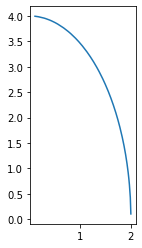

In [4]:
N = 200 
y = np.zeros((N, n_obj))
for n in range(N):
    z = wfg.random_soln(k, l, func.__name__)
    y[n,:] = objective_function(z) 
    
y = y[np.argsort(y[:,0])]

pareto_fig = plt.figure()
pareto_fig_ax = pareto_fig.gca()
pareto_fig_ax.plot(y[:,0], y[:,1])
pareto_fig_ax.set_aspect("equal")

In [5]:
gp_surr_multi = MultiSurrogate(GP, scaled=True)
my_opt = ParEgo(objective_function=objective_function, ei=True, limits=x_limits, n_initial=10, budget=50, seed=None, log_interval=10)

In [6]:
import os
settings = {\
    'sim_dir': os.path.join(rootpath.detect(), "experiments/results/"),\
    'seed': 0,\
    'run': 0,\
    'n_dim': 6,\
    'n_obj': 2,\
    'lb': x_limits[0],\
    'ub': x_limits[1],\
    'ref_vector': [3.5, 5.5],\
    'method_name': 'ParEGO',\
    'budget':50,\
    'n_samples':10,\
    'visualise':False,\
    'multisurrogate':False}
args = (k, n_obj) # number of objectives as argument
res0 = Optimiser.EMO(func, args, settings=settings)

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


Simulation settings. 
{'sim_dir': '/home/finley/phd/code/testsuite/experiments/results/', 'seed': 0, 'run': 0, 'n_dim': 6, 'n_obj': 2, 'lb': array([0., 0., 0., 0., 0., 0.]), 'ub': array([ 2.,  4.,  6.,  8., 10., 12.]), 'ref_vector': [3.5, 5.5], 'method_name': 'ParEGO', 'budget': 50, 'n_samples': 10, 'visualise': False, 'multisurrogate': False}
<class 'mono_surrogate.ParEGO'>   Mat52.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |   (6,)  |      +ve      |        
method used:  ParEGO
Episode:  1
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
new X
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimization restart 1/10, f = 9.273450092647213
Optimization restart 2/10, f = 10.053373043096443
Optimization restart 3/10, f = 25.497705478928733
Optimization restart 4/10, f = 36.355456638374804
Optimization restart 5/10, f = 101.29278910181355
Optimization restart 6/10, f = 10.053373058749063
Optim

(36_w,72)-aCMA-ES (mu_w=19.7,w_1=10%) in dimension 6 (seed=535667, Wed Sep 30 00:35:19 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   8849 -4.423814181712687e-02 1.0e+00 2.81e-01  5e-01  3e+00 0:00.2
    2   8921 -4.685683620967568e-02 1.6e+00 3.23e-01  5e-01  4e+00 0:00.5
    3   8993 -4.617396405885855e-02 2.0e+00 3.23e-01  6e-01  5e+00 0:00.8
   12   9641 -4.677308731071403e-02 5.0e+00 2.53e-01  6e-01  4e+00 0:03.8
   23  10433 -4.794005712219485e-02 8.3e+00 3.00e-01  4e-01  3e+00 0:07.9
   37  11441 -4.828665942727995e-02 1.0e+01 3.54e-01  3e-01  2e+00 0:13.3
   60  13097 -4.840772557723229e-02 3.0e+03 9.27e-02  2e-04  5e-01 0:19.4
   64  13385 -4.840772608414017e-02 7.6e+03 7.70e-02  6e-05  4e-01 0:20.9
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 00:35:40 2020)
final/bestever f-value = -4.840773e-02 -4.840773e-02
incumbent solution: [0.125473819410464, 0.6555188982572463, 4.97728763726729, 4.960306254978289, 1.3093870305759905, 3

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  25115 -6.348927686375920e-06 1.0e+00 2.22e-02  4e-02  3e-01 0:00.2
    2  25207 -1.762554517469792e-05 1.7e+00 4.04e-02  8e-02  5e-01 0:00.5
    3  25299 -9.883619835856712e-05 2.3e+00 5.13e-02  1e-01  7e-01 0:01.2
   12  26127 -4.658562035237241e-02 3.0e+00 2.00e-01  3e-01  2e+00 0:04.6
   29  27691 -4.837218451671572e-02 1.6e+01 2.09e-01  7e-02  2e+00 0:08.9
   43  28979 -4.840772496961378e-02 1.4e+03 1.08e-01  5e-04  6e-01 0:14.0
   47  29347 -4.840772604296984e-02 4.2e+03 9.28e-02  1e-04  6e-01 0:15.6
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 00:36:52 2020)
final/bestever f-value = -4.840773e-02 -4.840773e-02
incumbent solution: [0.6940776589191919, 1.2523411250178262, 4.977301247397105, 4.960310388249139, 1.3093863789132236, 3.301288585878231]
std deviation: [0.06657663948122512, 0.21845019454209647, 0.00037015526523507603, 0.0011174999728467629, 0.00012868641818807074, 0.585196538609175

(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=535685, Wed Sep 30 00:38:20 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  54813 -6.658077099259098e-03 1.0e+00 4.44e-03  9e-03  5e-02 0:00.0
    2  54822 -7.040120444710889e-03 1.3e+00 4.67e-03  9e-03  6e-02 0:00.1
    3  54831 -7.986386342510605e-03 1.5e+00 4.96e-03  9e-03  6e-02 0:00.1
   60  55344 -4.837772690437950e-02 2.4e+01 5.24e-02  5e-02  7e-01 0:03.1
  100  55704 -4.840723883634750e-02 1.2e+02 1.31e-02  2e-03  2e-01 0:05.0
  132  55992 -4.840772588745235e-02 5.0e+02 1.10e-03  6e-05  2e-02 0:05.6
termination on tolfun=1e-07 after 26 restarts (Wed Sep 30 00:38:26 2020)
final/bestever f-value = -4.840773e-02 -4.840773e-02
incumbent solution: [0.2288149966207712, 3.5188507870650225, 4.977076364396195, 4.960395284435512, 1.3093230200804697, 1.421420164825223]
std deviation: [0.0038297924533318927, 0.008460959767365358, 0.00019310993671159843, 0.0004777872189462069, 6.407313328774832e-05,

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  92232 -2.072632292081712e-02 1.0e+00 2.18e-02  4e-02  3e-01 0:00.0
    2  92241 -2.846841209448346e-02 1.3e+00 2.54e-02  5e-02  3e-01 0:00.2
    3  92250 -3.156111493009139e-02 1.6e+00 3.43e-02  7e-02  4e-01 0:00.2
   45  92628 -4.840481348759804e-02 9.2e+00 1.17e-02  1e-02  8e-02 0:03.3
   89  93024 -4.840772620840478e-02 1.0e+02 1.71e-04  2e-05  1e-03 0:06.2
termination on tolfun=1e-07 after 35 restarts (Wed Sep 30 00:40:38 2020)
final/bestever f-value = -4.840773e-02 -4.840773e-02
incumbent solution: [0.19572999911770278, 3.3259072521957935, 4.9772533327620305, 4.960355996434703, 1.3093850074229423, 1.7402779299504387]
std deviation: [0.00023800947983053998, 0.0007556180361740665, 7.819660403803199e-05, 0.00020293094823860337, 2.1295537285802768e-05, 0.0009727580033053948]
(14_w,29)-aCMA-ES (mu_w=8.4,w_1=21%) in dimension 6 (seed=535695, Wed Sep 30 00:40:38 2020)
Iterat #Fevals   function value  axis rati

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  99863 -4.753490452383775e-02 1.0e+00 4.44e-01  8e-01  6e+00 0:02.4
    2 101015 -4.782431806812458e-02 1.6e+00 5.41e-01  1e+00  7e+00 0:06.2
    3 102167 -4.802872691578827e-02 1.7e+00 5.58e-01  1e+00  6e+00 0:09.9
    4 103319 -4.757185164501408e-02 2.4e+00 5.79e-01  1e+00  7e+00 0:14.1
    6 105623 -4.826784464964792e-02 5.8e+00 6.05e-01  1e+00  7e+00 0:21.8
    8 107927 -4.836131105642526e-02 6.6e+00 6.07e-01  1e+00  7e+00 0:28.4
   10 110231 -4.833003959392548e-02 6.1e+00 6.30e-01  1e+00  8e+00 0:36.9
   11 111383 -4.806735844376136e-02 6.5e+00 6.16e-01  1e+00  8e+00 0:50.7
   14 114839 -4.814935686736012e-02 5.8e+00 6.16e-01  9e-01  8e+00 1:02.2
   16 117143 -4.803113801883114e-02 5.7e+00 6.46e-01  1e+00  7e+00 1:13.0
   19 120599 -4.829133491303529e-02 7.4e+00 6.72e-01  1e+00  7e+00 1:24.0


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 45 restarts (Wed Sep 30 00:42:49 2020)
final/bestever f-value = -3.726137e-02 -4.840773e-02
incumbent solution: [0.21340042557353456, 1.222548794229083, 5.999591643739146, 7.934924775595574, 0.8328563529492445, 5.208746497349143]
std deviation: [1.1868062217307567, 2.761652595126366, 1.0831261492855895, 3.030713902709897, 1.0545349249314526, 7.429618316215829]
Time taken (minutes):  8.386925276120504
Best individual:
[0.19573    3.32590725 4.97725333 4.960356   1.30938501 1.74027793]
Best individual fitness:
[[0.04840773]]
Next sampling points:  [[0.19573    3.32590725 4.97725333 4.960356   1.30938501 1.74027793]]
Hypervolume:  6.933556025541556
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  2
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimization resta

 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning:A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
 /home/finley/miniconda3/envs/testsuite/lib/python3.8/site-packages/deap/creator.py:138: RuntimeWarning:A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.


(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=534359, Wed Sep 30 00:42:55 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.164969732986673e-03 1.0e+00 2.23e-01  4e-01  3e+00 0:00.0
    2     18 -9.436006812933339e-03 1.2e+00 2.27e-01  5e-01  3e+00 0:00.1
    3     27 -3.704708925437846e-03 1.4e+00 2.02e-01  4e-01  2e+00 0:00.1
   61    549 -1.548004102502967e-02 4.7e+01 3.32e-02  4e-03  5e-01 0:03.1
  100    900 -1.553328977338544e-02 3.4e+02 2.70e-02  4e-04  2e-01 0:07.0
  135   1215 -1.553334817115468e-02 1.8e+03 6.66e-03  2e-05  9e-02 0:10.6
termination on tolfun=1e-07 (Wed Sep 30 00:43:06 2020)
final/bestever f-value = -1.553335e-02 -1.553335e-02
incumbent solution: [0.7222964466113612, 2.165787533924657, 1.3476176175648116, 6.401846285345748, 1.8372186285814054, 6.773803804829779e-06]
std deviation: [0.009552849763169505, 2.108938185198621e-05, 0.0362818393531956, 0.06832516783084348, 0.08888181850499308, 0.003919939789902585]

   35  10187 -1.553334885052339e-02 1.2e+04 1.62e-01  9e-05  3e+00 0:13.6
NOTE (module=cma, iteration=35):  
condition in coordinate system exceeded 1.6e+08, rescaled to 1.0e+00, 
condition changed from 1.3e+08 to 2.3e+01
   37  10331 -1.553336060613492e-02 4.8e+00 1.64e-01  6e-05  4e+00 0:14.2
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 00:44:23 2020)
final/bestever f-value = -1.553334e-02 -1.553336e-02
incumbent solution: [1.128254144481722, 2.1658006842768525, 0.34693214806606415, 1.8706426804325214, 7.150716563074643, 8.91221789795658e-07]
std deviation: [0.24397494971195502, 5.8018765748028774e-05, 1.5333092839949192, 1.911734306572363, 3.9146525555722786, 0.010084248911205343]
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 6 (seed=534368, Wed Sep 30 00:44:24 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  10343 -1.543147839888154e-02 1.0e+00 3.99e-02  8e-02  5e-01 0:00.0
    2  10354 -1.548344203878752e-02 1.4e+00 4.08e-02  8e-0

(32_w,65)-aCMA-ES (mu_w=17.9,w_1=11%) in dimension 6 (seed=534375, Wed Sep 30 00:46:09 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  26748 -1.546864069481899e-02 1.0e+00 1.59e-01  3e-01  2e+00 0:00.5
    2  26813 -1.518163632613778e-02 1.5e+00 1.93e-01  4e-01  2e+00 0:00.8
    3  26878 -1.544912964747971e-02 1.6e+00 1.78e-01  3e-01  2e+00 0:01.3
   13  27528 -1.549624005712754e-02 2.9e+01 1.02e-01  2e-02  2e+00 0:04.3
   31  28698 -1.553332144628575e-02 1.4e+03 9.98e-02  4e-04  1e+00 0:08.4
NOTE (module=cma, iteration=39):  
condition in coordinate system exceeded 1.8e+08, rescaled to 1.0e+00, 
condition changed from 1.1e+08 to 2.0e+01
   40  29283 -1.553333414580315e-02 4.5e+00 5.84e-02  3e-05  4e-01 0:10.9
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 00:46:20 2020)
final/bestever f-value = -1.553333e-02 -1.553337e-02
incumbent solution: [1.0467273703327202, 2.16579697230433, 0.2105548464792949, 4.121068868818307, 5.424983095100237, 

    8  58170 -1.551751671232505e-02 8.3e+00 3.84e-01  1e-01  4e+00 0:12.9
   11  59898 -1.553036716093293e-02 3.7e+01 4.36e-01  3e-02  4e+00 0:22.0
   16  62778 -1.553335782493727e-02 1.2e+03 4.58e-01  8e-04  4e+00 0:28.9
NOTE (module=cma, iteration=20):  
condition in coordinate system exceeded 2.6e+08, rescaled to 1.0e+00, 
condition changed from 1.3e+08 to 3.3e+00
   21  65658 -1.553335934777434e-02 1.8e+00 4.55e-01  6e-05  3e+00 0:39.2
   24  67386 -1.553336007211666e-02 5.2e+00 4.57e-01  2e-05  2e+00 0:43.7
termination on tolfun=1e-07 after 23 restarts (Wed Sep 30 00:48:37 2020)
final/bestever f-value = -1.553336e-02 -1.553337e-02
incumbent solution: [0.23540250727383677, 2.165789428641018, 3.0321458804404715, 5.216268578223467, 9.999535609402292, 8.77072638268146e-08]
std deviation: [0.4652964966394135, 2.0051842705412398e-05, 1.3552741483234998, 2.474848557956176, 0.8517222643580262, 0.0037847649017381866]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=534383, Wed Sep 

termination on tolfun=1e-07 after 30 restarts (Wed Sep 30 00:50:49 2020)
final/bestever f-value = -4.080120e-03 -1.553337e-02
incumbent solution: [1.0777386646078675, 7.387299252805154e-09, 3.239619626534868, 7.9998900811555185, 7.269783483062805, 2.5475766044000727e-05]
std deviation: [0.003841306918275688, 7.770290477015883e-05, 0.011873794929776735, 0.022479134564942754, 0.029674582344605096, 0.005708249929940437]
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 6 (seed=534390, Wed Sep 30 00:50:49 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 105278 -2.609518304425532e-03 1.0e+00 1.84e-02  4e-02  2e-01 0:00.0
    2 105289 -2.632244226158136e-03 1.3e+00 1.68e-02  3e-02  2e-01 0:00.1
    3 105300 -2.651043942191225e-03 1.4e+00 1.69e-02  3e-02  2e-01 0:00.1
   47 105784 -2.674838147051170e-03 1.5e+02 1.75e-01  1e-02  3e+00 0:03.1
   95 106312 -2.679310991587205e-03 3.3e+03 3.28e-02  1e-04  5e-01 0:04.4
termination on tolfun=1e-07 after 31 restarts 

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 34 restarts (Wed Sep 30 00:51:47 2020)
final/bestever f-value = -4.185156e-03 -1.553337e-02
incumbent solution: [0.02808748568306168, 9.87482896410603e-13, 0.46800588422600986, 4.463587537626439, 0.05560624975312478, 11.999999599832003]
std deviation: [0.42620025202261846, 0.00027299504678451934, 1.5918175890624597, 2.0962821970612904, 1.1586844838156873, 0.02932400542633722]
Time taken (minutes):  8.875862614313762
Best individual:
[1.44139956e+00 2.16578999e+00 5.99706720e+00 1.64431424e+00
 1.12149837e-05 1.09639523e-08]
Best individual fitness:
[[0.01553337]]
Next sampling points:  [[1.44139956e+00 2.16578999e+00 5.99706720e+00 1.64431424e+00
  1.12149837e-05 1.09639523e-08]]
Hypervolume:  6.933556025541556
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  3
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors: 

   88   7625 -9.452022063606999e-02 1.8e+02 2.74e-04  2e-05  3e-03 0:04.6
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 00:52:34 2020)
final/bestever f-value = -9.452022e-02 -3.857043e-01
incumbent solution: [1.9999999999286886, 6.092448936649139e-11, 2.0992021278878132, 3.3062635111215664, 1.192507701994921e-11, 11.999999999024778]
std deviation: [2.4086336467841107e-05, 1.76738462776325e-05, 0.003261052449864678, 0.0022591728870223586, 2.986840952715221e-05, 0.0003713393108978978]
(36_w,72)-aCMA-ES (mu_w=19.7,w_1=10%) in dimension 6 (seed=523416, Wed Sep 30 00:52:34 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   7698 -1.208673284841210e-02 1.0e+00 3.02e-01  6e-01  3e+00 0:00.4
    2   7770 -4.523549465299151e-02 1.6e+00 3.62e-01  7e-01  4e+00 0:00.9
    3   7842 -1.482630512203746e-01 2.4e+00 3.51e-01  8e-01  4e+00 0:01.3
   13   8562 -3.459787394836593e-01 4.2e+00 3.44e-01  4e-01  4e+00 0:04.5
   26   9498 -3.855902796214032e-01 4.6e

    1  20596 -9.870144694343868e-18 1.0e+00 2.03e-02  4e-02  2e-01 0:00.0
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 00:53:31 2020)
final/bestever f-value = -3.078695e-18 -3.857043e-01
incumbent solution: [1.476215167040409, 3.0318094299452567, 4.324568584178407, 4.590350746395922, 6.955414720098324, 4.190596813228166]
std deviation: [0.04064735002821729, 0.0776175489470294, 0.11820881440070383, 0.15353578036248852, 0.2061077105098878, 0.24996726141529582]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=523425, Wed Sep 30 00:53:31 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  20606 -3.367632218561483e-02 1.0e+00 4.79e-02  9e-02  5e-01 0:00.1
    2  20615 -4.561699148837372e-02 1.3e+00 5.49e-02  1e-01  6e-01 0:00.1
    3  20624 -6.055505117483718e-02 1.6e+00 5.90e-02  1e-01  7e-01 0:00.3
   57  21110 -3.851320951695859e-01 1.2e+01 4.95e-02  2e-02  6e-01 0:03.3
  100  21497 -3.857040853256194e-01 5.9e+01 5.41e-03  7e-04  8e-02

    1  35267 -5.146762936319839e-33 1.0e+00 2.16e-02  4e-02  3e-01 0:00.1
termination on tolfun=1e-07 after 26 restarts (Wed Sep 30 00:54:23 2020)
final/bestever f-value = -1.094798e-38 -3.857043e-01
incumbent solution: [0.722372539779068, 2.304621869166297, 2.9842018013131684, 3.3921418588382743, 3.152392810615224, 7.312671379466879]
std deviation: [0.04138263985646741, 0.10667211243962749, 0.12000667615280916, 0.19061950840034944, 0.257736143586715, 0.24897880278500634]
(82_w,164)-aCMA-ES (mu_w=43.4,w_1=5%) in dimension 6 (seed=523435, Wed Sep 30 00:54:23 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  35432 -2.645115908881537e-04 1.0e+00 2.44e-02  5e-02  3e-01 0:00.1
    2  35596 -1.102100988796455e-02 1.7e+00 4.51e-02  1e-01  5e-01 0:00.3
    3  35760 -5.232269691453928e-02 2.6e+00 8.02e-02  2e-01  9e-01 0:00.4
   22  38876 -3.857042601063208e-01 9.6e+02 1.90e-01  5e-04  8e-01 0:03.5
NOTE (module=cma, iteration=28):  
condition in coordinate sys

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  62543 -1.897786003229372e-12 1.0e+00 8.25e-02  2e-01  1e+00 0:00.1
termination on tolfun=1e-07 after 36 restarts (Wed Sep 30 00:54:51 2020)
final/bestever f-value = -4.008640e-16 -3.857043e-01
incumbent solution: [0.7133259991372587, 0.6823506871016054, 5.916166808453965, 6.714143441503542, 5.7673567503845415, 9.922456076896985]
std deviation: [0.15208369167324826, 0.369399450306803, 0.4755645666717756, 0.5482608028298762, 0.834420064255179, 1.0444522287371982]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=523445, Wed Sep 30 00:54:51 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  62554 -5.305105190189388e-08 1.0e+00 1.83e-01  3e-01  2e+00 0:00.0
termination on tolfun=1e-07 after 37 restarts (Wed Sep 30 00:54:51 2020)
final/bestever f-value = -6.548957e-10 -3.857043e-01
incumbent solution: [1.6231597992490145, 0.7770901424025372, 0.9941697883315685, 3.480195582

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 45 restarts (Wed Sep 30 00:55:46 2020)
final/bestever f-value = -9.451981e-02 -3.857043e-01
incumbent solution: [1.9999999738360263, 2.9635327616502827e-06, 4.756642769090137, 0.566359733146038, 3.3422645265304913e-06, 11.999996277471576]
std deviation: [0.003918381013448224, 0.002437624432158889, 0.23969185949924882, 0.2299986539360592, 0.004824005264570114, 0.12379943980110548]
Time taken (minutes):  3.8947895328203836
Best individual:
[5.49852471e-15 4.00000000e+00 1.50558181e+00 7.99485523e+00
 1.10309880e-11 1.20000000e+01]
Best individual fitness:
[[0.38570429]]
Next sampling points:  [[5.49852471e-15 4.00000000e+00 1.50558181e+00 7.99485523e+00
  1.10309880e-11 1.20000000e+01]]
Hypervolume:  6.933556025541556
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  4
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vect

    1  12730 -6.228338811161231e-03 1.0e+00 5.85e-03  1e-02  7e-02 0:00.0
    2  12750 -7.138478878335653e-03 1.4e+00 6.84e-03  2e-02  8e-02 0:00.0
    3  12770 -8.306000005743181e-03 1.5e+00 1.04e-02  2e-02  1e-01 0:00.1
   80  14310 -7.797643643435408e-02 1.7e+02 6.80e-04  2e-05  1e-02 0:01.6
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 00:56:04 2020)
final/bestever f-value = -7.797644e-02 -7.797644e-02
incumbent solution: [0.3850643285944676, 0.8582338464477318, 0.05799668172296962, 1.3168906292998233, 9.153408040508996, 6.663979680936041]
std deviation: [2.2332665857566647e-05, 4.8456029517332234e-05, 0.00013751934743182561, 0.00014448515796934076, 0.010246803215635843, 0.009897872642043682]
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 6 (seed=551454, Wed Sep 30 00:56:04 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  14322 -7.498057955037101e-03 1.0e+00 4.49e-03  9e-03  5e-02 0:00.0
    2  14333 -7.905280209318419e-03 1.3e+00 5.

   50  48916 -7.797520840891384e-02 5.1e+01 5.71e-01  5e-03  7e-01 0:49.2
   60  51796 -7.797637665781981e-02 1.7e+02 4.47e-01  1e-03  4e-01 0:59.2
   72  55252 -7.797642372549367e-02 3.0e+02 5.71e-01  6e-04  3e-01 1:10.9
   79  57268 -7.797643710660218e-02 1.0e+03 5.79e-01  1e-04  3e-01 1:15.0
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 00:58:03 2020)
final/bestever f-value = -7.797644e-02 -7.797644e-02
incumbent solution: [0.38508213118604306, 0.8582642823078181, 0.057951629872478705, 1.3166584471330918, 7.901545383052629, 2.3401898053805987]
std deviation: [0.00010970301309476741, 0.00024839332498873695, 0.0009973842600369887, 0.0007576208450760007, 0.2894751101970359, 0.2434019676117709]
(65_w,131)-aCMA-ES (mu_w=34.9,w_1=6%) in dimension 6 (seed=551462, Wed Sep 30 00:58:03 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  57400 -7.723126302039384e-09 1.0e+00 5.01e-02  1e-01  6e-01 0:00.3
termination on tolfun=1e-07 after 17 restarts 

   10  86780 -7.770642741272013e-02 6.7e+00 5.86e-01  3e-01  6e+00 0:20.2
   12  87932 -7.733055100518468e-02 6.4e+00 5.89e-01  4e-01  7e+00 0:27.1
   16  90236 -7.733209781066815e-02 1.0e+01 6.56e-01  3e-01  9e+00 0:34.3
   21  93116 -7.790477795309718e-02 1.5e+01 7.84e-01  3e-01  8e+00 0:44.1
   25  95420 -7.796495642498966e-02 5.7e+01 7.81e-01  4e-02  8e+00 0:53.3
   31  98876 -7.797121086634232e-02 2.0e+02 8.36e-01  1e-02  1e+01 1:07.7
   37 102332 -7.797620689012388e-02 8.6e+02 9.00e-01  3e-03  1e+01 1:21.5
   42 105212 -7.797640621645875e-02 2.6e+03 1.01e+00  1e-03  1e+01 1:33.9
NOTE (module=cma, iteration=46):  
condition in coordinate system exceeded 1.1e+08, rescaled to 1.0e+00, 
condition changed from 2.0e+08 to 1.5e+01
   49 109244 -7.797643719180870e-02 8.5e+00 9.15e-01  4e-05  1e+01 1:47.7
   50 109820 -7.797643724855605e-02 1.3e+01 8.86e-01  3e-05  1e+01 1:49.7
termination on tolfun=1e-07 after 24 restarts (Wed Sep 30 01:01:36 2020)
final/bestever f-value = -7.797644e-02 

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 27 restarts (Wed Sep 30 01:02:18 2020)
final/bestever f-value = -2.664484e-03 -7.797644e-02
incumbent solution: [1.996573557708, 3.9985274018099233, 0.04102476505711513, 0.0073070234632914306, 1.71268247114032, 4.379510080843715]
std deviation: [0.03909708532748326, 0.06778265689680939, 0.1232760030700636, 0.05408705016062951, 0.5042426577080743, 0.5056862875089057]
Time taken (minutes):  6.5153597036997475
Best individual:
[0.38507172 0.8582345  0.05803882 1.31693273 7.39671987 0.92294842]
Best individual fitness:
[[0.07797644]]
Next sampling points:  [[0.38507172 0.8582345  0.05803882 1.31693273 7.39671987 0.92294842]]
Hypervolume:  7.60004940481978
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  5
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimization

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   7814 -5.546387859423348e-03 1.0e+00 3.00e-01  6e-01  4e+00 0:00.1
    2   7886 -1.028062010863266e-02 1.5e+00 5.42e-01  1e+00  6e+00 0:00.4
    3   7958 -9.803851658187503e-03 2.2e+00 5.57e-01  9e-01  7e+00 0:00.8
   15   8822 -1.078537434858534e-02 1.4e+01 4.45e-01  1e-01  8e+00 0:04.2
   25   9542 -1.088220518510290e-02 1.7e+01 3.40e-01  7e-02  5e+00 0:08.2
   43  10838 -1.095017435031462e-02 4.3e+02 2.51e-01  2e-03  4e+00 0:13.5
   52  11486 -1.095020217432324e-02 3.1e+03 1.65e-01  1e-04  3e+00 0:16.1
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:03:28 2020)
final/bestever f-value = -1.095020e-02 -2.338293e-02
incumbent solution: [0.11620032377952985, 0.6341198017918842, 5.470126654093363, 6.720150089328577e-11, 6.729281534009278, 1.6026079910462108]
std deviation: [0.00014702521581763035, 0.0003549073193842777, 0.0015077341494995147, 0.00059083829645793, 1.257949835517326, 3.02442015652588

termination on tolfun=1e-07 after 15 restarts (Wed Sep 30 01:04:44 2020)
final/bestever f-value = -1.095020e-02 -2.338293e-02
incumbent solution: [0.1162272460579894, 0.6341731870250863, 5.46981081505276, 1.3068922643635187e-07, 3.4945963933137474, 2.6885145361470335]
std deviation: [0.00010500815271989262, 0.00019656026586744414, 0.0010110299883591754, 0.0003088028719591245, 0.2782768114104184, 0.13471693064478327]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=538165, Wed Sep 30 01:04:44 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  25640 -4.954741213063602e-04 1.0e+00 4.17e-03  8e-03  5e-02 0:00.0
    2  25649 -5.136227335691959e-04 1.3e+00 4.79e-03  1e-02  6e-02 0:00.1
    3  25658 -5.411241875449028e-04 1.7e+00 5.60e-03  1e-02  8e-02 0:00.1
   34  25937 -2.170372273886090e-02 4.7e+00 1.02e-01  8e-02  2e+00 0:03.1
   85  26396 -2.338292294426839e-02 5.1e+01 1.29e-03  2e-04  3e-02 0:07.2
  100  26531 -2.338292662276201e-02 8.7e+01 4.12

    1  71279 -1.980612592014711e-09 1.0e+00 1.33e-02  3e-02  2e-01 0:00.1
termination on tolfun=1e-07 after 22 restarts (Wed Sep 30 01:07:50 2020)
final/bestever f-value = -1.175353e-09 -2.338293e-02
incumbent solution: [0.18267092821503259, 3.6826127315620583, 0.8419641571856127, 3.762441547969008, 9.444721580094997, 7.448262176863428]
std deviation: [0.0268306600197039, 0.05942544272890311, 0.0809422929822793, 0.11113773903780652, 0.13289141062476015, 0.15541364133525457]
(23_w,47)-aCMA-ES (mu_w=13.2,w_1=14%) in dimension 6 (seed=538172, Wed Sep 30 01:07:51 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  71327 -1.690928497552225e-04 1.0e+00 4.36e-02  8e-02  6e-01 0:00.2
    2  71374 -6.430884740699861e-04 1.5e+00 6.36e-02  1e-01  7e-01 0:00.4
    3  71421 -2.495929176345963e-03 2.1e+00 1.11e-01  2e-01  1e+00 0:00.8
   19  72173 -1.081400635738423e-02 4.7e+00 2.51e-01  1e-01  3e+00 0:04.0
   40  73160 -1.094980390866661e-02 4.9e+01 7.86e-02  3e-03 

    2  88987 -2.069436643642676e-03 1.5e+00 2.83e-01  6e-01  3e+00 0:00.1
    3  89007 -7.827490167363773e-03 1.6e+00 3.93e-01  8e-01  5e+00 0:00.1
   35  89647 -1.078534201301342e-02 1.3e+01 2.21e-01  7e-02  4e+00 0:03.1
   64  90227 -1.095017106325127e-02 9.3e+01 2.36e-02  1e-03  5e-01 0:07.2
   81  90567 -1.095020233226530e-02 3.0e+02 5.84e-03  1e-04  1e-01 0:09.3
termination on tolfun=1e-07 after 30 restarts (Wed Sep 30 01:09:23 2020)
final/bestever f-value = -1.095020e-02 -2.338293e-02
incumbent solution: [0.11618861395901953, 0.6341498971529312, 5.470092357398749, 6.172676789901624e-10, 4.5605244488819086, 0.5184521077321076]
std deviation: [9.650855367208315e-05, 0.00021238868519021998, 0.0008748192315776076, 0.00030306835480674137, 0.113386603436692, 0.0836704109400416]
(576_w,1152)-aCMA-ES (mu_w=292.8,w_1=1%) in dimension 6 (seed=538180, Wed Sep 30 01:09:24 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  91720 -1.508773061950867e-02 1.0e+00

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 31 restarts (Wed Sep 30 01:11:36 2020)
final/bestever f-value = -2.331519e-02 -2.338293e-02
incumbent solution: [0.9387792497454309, 1.9464416708160663, 0.03087337047413683, 1.1306078171738449e-05, 8.048890598888226, 6.677982733752506]
std deviation: [0.003239925954916168, 0.007026630513743016, 0.23075200796544088, 0.01680355303435501, 8.359483779802947, 9.300716799254632]
Time taken (minutes):  9.204807909329732
Best individual:
[9.38270493e-01 1.94700317e+00 2.05779009e-01 2.09417174e-10
 5.71140221e+00 9.90662176e-01]
Best individual fitness:
[[0.02338293]]
Next sampling points:  [[9.38270493e-01 1.94700317e+00 2.05779009e-01 2.09417174e-10
  5.71140221e+00 9.90662176e-01]]
Hypervolume:  7.62901995153975
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  6
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16


    1  11270 -3.627464957152810e-06 1.0e+00 2.45e-02  5e-02  3e-01 0:00.0
    2  11279 -3.526880069859978e-06 1.4e+00 2.38e-02  5e-02  3e-01 0:00.0
    3  11288 -9.888261479156709e-06 1.5e+00 2.59e-02  5e-02  3e-01 0:00.1
  100  12161 -1.696697432873168e-02 3.4e+01 1.98e-04  3e-05  2e-03 0:01.1
  102  12179 -1.696697438273599e-02 3.6e+01 1.84e-04  2e-05  2e-03 0:01.2
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:12:57 2020)
final/bestever f-value = -1.696697e-02 -1.696697e-02
incumbent solution: [0.7965190620040588, 1.7874793430800033, 1.4878704482104503, 3.176416650763697, 6.861203470349009, 4.108051043546249]
std deviation: [2.2700496393257793e-05, 4.0386539245317056e-05, 0.00012768902297799408, 0.00014699632570498958, 0.0023348558301637744, 0.0020242909305470463]
(14_w,28)-aCMA-ES (mu_w=8.1,w_1=21%) in dimension 6 (seed=463965, Wed Sep 30 01:12:57 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  12208 -4.890960499383699e-04 1.0e+00 1

   16  29924 -1.596345228770231e-02 4.1e+01 1.98e+00  3e-01  2e+01 0:03.9
NOTE (module=cma, iteration=28):  
condition in coordinate system exceeded 1.2e+08, rescaled to 1.0e+00, 
condition changed from 1.0e+08 to 6.4e+00
   30  33956 -1.696697380617556e-02 4.0e+00 3.32e+00  1e-04  2e+01 0:08.0
   35  35396 -1.696697460016310e-02 3.9e+01 3.14e+00  1e-05  1e+01 0:10.1
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 01:13:24 2020)
final/bestever f-value = -1.696697e-02 -1.696697e-02
incumbent solution: [0.7965087084003502, 1.787474043411135, 1.4878162972136597, 3.176449919458738, 0.8909463282823353, 11.155169047182206]
std deviation: [9.835807450019563e-06, 1.6618154152186607e-05, 6.401591592049905e-05, 5.579762226993273e-05, 2.898288995030666, 14.363215821135924]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=463974, Wed Sep 30 01:13:24 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  35406 -1.122427333966684e-03 1.0e+00 9.73e-03  2

    1  77156 -4.024977563143198e-04 1.0e+00 1.19e-02  2e-02  1e-01 0:00.0
    2  77235 -7.496873767960249e-04 1.6e+00 2.04e-02  4e-02  2e-01 0:00.1
    3  77314 -1.331161486683346e-03 2.2e+00 3.25e-02  7e-02  4e-01 0:00.2
   45  80632 -1.696688501345314e-02 1.0e+02 5.74e-02  1e-03  5e-01 0:03.3
   56  81501 -1.696697457682530e-02 7.7e+02 3.11e-02  7e-05  2e-01 0:04.1
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 01:14:05 2020)
final/bestever f-value = -1.696697e-02 -1.696697e-02
incumbent solution: [0.7964951545959369, 1.787474257128363, 1.4879122384301122, 3.17641708026218, 3.5793169938109477, 5.26676514250579]
std deviation: [6.53871635178659e-05, 0.00011531015163845324, 0.0003670213268716397, 0.00035243071645731875, 0.10933982199223181, 0.21140095824301164]
(6_w,13)-aCMA-ES (mu_w=4.0,w_1=38%) in dimension 6 (seed=463983, Wed Sep 30 01:14:05 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  81515 -4.943300886741699e-04 1.0e+00 1.83e-02  

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 28 restarts (Wed Sep 30 01:14:39 2020)
final/bestever f-value = -1.641899e-02 -1.696697e-02
incumbent solution: [0.7141308651382738, 1.7270553894228893, 1.926534354778867, 3.2594912392682382, 9.883717136499083, 10.447409040282215]
std deviation: [0.17115283316603866, 0.2301076002060242, 0.7259586856519806, 0.6511672134088715, 48.01005914838291, 49.434658390949615]
Time taken (minutes):  2.890786290168762
Best individual:
[0.79650374 1.787467   1.48782063 3.17643777 3.265738   8.16357952]
Best individual fitness:
[[0.01696697]]
Next sampling points:  [[0.79650374 1.787467   1.48782063 3.17643777 3.265738   8.16357952]]
Hypervolume:  7.62901995153975
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  7
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimization re

    1  12232 -2.998978074002820e-03 1.0e+00 7.18e-03  1e-02  9e-02 0:00.0
    2  12241 -3.059838580773324e-03 1.3e+00 8.08e-03  2e-02  1e-01 0:00.0
    3  12250 -3.368853254666443e-03 1.5e+00 9.75e-03  2e-02  1e-01 0:00.1
  100  13123 -3.779661612056988e-02 4.0e+01 2.21e-04  2e-05  3e-03 0:01.5
  102  13141 -3.779661616383174e-02 3.9e+01 2.22e-04  2e-05  3e-03 0:01.5
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:14:57 2020)
final/bestever f-value = -3.779662e-02 -3.779662e-02
incumbent solution: [0.24408869646646253, 0.8051726640410526, 3.7352637281735688, 2.794996124361834, 9.384551499962777, 11.470259670457486]
std deviation: [1.6515065838667516e-05, 4.130661018301717e-05, 0.00012925207626607194, 0.00012432656938243005, 0.0024220392441166977, 0.0034587023379641594]
(18_w,37)-aCMA-ES (mu_w=10.5,w_1=17%) in dimension 6 (seed=551488, Wed Sep 30 01:14:57 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13179 -1.207199708975157e-03 1.0e+00

   14  38572 -3.765981895939972e-02 1.3e+01 7.98e-01  1e-01  6e+00 0:04.0
NOTE (module=cma, iteration=28):  
condition in coordinate system exceeded 1.4e+08, rescaled to 1.0e+00, 
condition changed from 7.9e+07 to 6.7e+00
   30  43180 -3.779661607608024e-02 3.2e+00 9.56e-01  4e-05  5e+00 0:08.0
   32  43756 -3.779661623513877e-02 4.6e+00 9.86e-01  1e-05  3e+00 0:08.6
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 01:15:27 2020)
final/bestever f-value = -3.779662e-02 -3.779662e-02
incumbent solution: [0.24408823374281932, 0.805159151188602, 3.7352361276399817, 2.795031443288853, 9.972439700210682, 1.0007133469093488]
std deviation: [1.4090717150014656e-05, 3.0635990912222285e-05, 0.00010580082177842392, 9.546780199214183e-05, 1.9474806327375287, 2.83729273887413]
(115_w,231)-aCMA-ES (mu_w=60.5,w_1=4%) in dimension 6 (seed=551497, Wed Sep 30 01:15:27 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  43988 -1.578832695444547e-02 1.0e+00 6.76e-

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 23 restarts (Wed Sep 30 01:18:36 2020)
final/bestever f-value = -3.779650e-02 -3.779662e-02
incumbent solution: [0.24319506767960453, 0.8054915109931486, 3.735314105224835, 2.793209329659586, 3.6711211394588714, 6.951909017925498]
std deviation: [0.004538766942203281, 0.011134922575739087, 0.037737658661924134, 0.03432467486663089, 0.7067887815363149, 1.1857309248238472]
Time taken (minutes):  3.92607132991155
Best individual:
[0.24408823 0.80515915 3.73523613 2.79503144 9.9724397  1.00071335]
Best individual fitness:
[[0.03779662]]
Next sampling points:  [[0.24408823 0.80515915 3.73523613 2.79503144 9.9724397  1.00071335]]
Hypervolume:  7.62901995153975
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  8
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimizat

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   7342 -7.666709922987773e-03 1.0e+00 3.54e-01  8e-01  5e+00 0:00.1
    2   7414 -1.144897789907336e-02 1.5e+00 4.57e-01  1e+00  5e+00 0:00.2
    3   7486 -1.099566359745789e-02 1.7e+00 4.97e-01  1e+00  5e+00 0:00.4
   44  10438 -1.259480726919440e-02 1.0e+03 9.88e-02  3e-04  4e-01 0:03.4
   47  10654 -1.259480753611998e-02 2.0e+03 1.18e-01  2e-04  5e-01 0:03.6
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:18:50 2020)
final/bestever f-value = -1.259481e-02 -1.259481e-02
incumbent solution: [1.675366400619289, 2.644282605415099, 2.2762415758690913, 2.048480998987768, 3.313446997988822, 4.102924235138799]
std deviation: [0.16457430051590827, 0.00020264992118084016, 0.0004929387821035967, 0.4840941618387718, 0.4237995524614272, 0.0009777855699689333]
(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 6 (seed=546818, Wed Sep 30 01:18:50 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max

    1  29993 -5.613652686713506e-04 1.0e+00 5.26e-03  1e-02  6e-02 0:00.0
    2  30019 -5.815277001450799e-04 1.4e+00 7.40e-03  1e-02  8e-02 0:00.0
    3  30045 -6.330828765035427e-04 1.5e+00 1.15e-02  2e-02  1e-01 0:00.1
   72  31839 -1.259480593517207e-02 7.2e+02 7.30e-03  8e-05  1e-01 0:01.8
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 01:19:10 2020)
final/bestever f-value = -1.259481e-02 -1.259481e-02
incumbent solution: [1.0144166637612275, 2.6442373018658807, 2.276212684272248, 0.776449551460077, 9.158616931077848, 4.10305819931457]
std deviation: [0.01061115711143137, 8.202116891931524e-05, 0.00021614527366870372, 0.05218962023371898, 0.14150272745135448, 0.00043580277633001107]
(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 6 (seed=546827, Wed Sep 30 01:19:10 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  31870 -2.318579871358126e-03 1.0e+00 1.15e-01  2e-01  1e+00 0:00.0
    2  31900 -1.160440627032353e-02 1.4e+00 1.85e-01  

    2  52111 -5.580483703185510e-03 1.3e+00 5.46e-02  1e-01  6e-01 0:00.0
    3  52121 -7.011665132469492e-03 1.4e+00 6.02e-02  1e-01  6e-01 0:00.0
   78  52871 -1.259480640591384e-02 8.1e+01 6.45e-04  1e-04  8e-03 0:00.8
termination on tolfun=1e-07 after 26 restarts (Wed Sep 30 01:19:30 2020)
final/bestever f-value = -1.259481e-02 -1.259481e-02
incumbent solution: [1.1568214859587582, 2.644259979251738, 2.276285578130346, 4.14367526064569, 4.190625895209827, 4.102987897764434]
std deviation: [0.0015750964023719713, 0.0001091483571390674, 0.0002323883635655903, 0.008168428584223014, 0.007016353548833359, 0.0004940212538228541]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=546836, Wed Sep 30 01:19:30 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  52881 -3.264467210572851e-05 1.0e+00 3.11e-03  6e-03  4e-02 0:00.0
    2  52890 -3.451022454410532e-05 1.3e+00 3.55e-03  7e-03  5e-02 0:00.0
    3  52899 -3.971078457446401e-05 1.6e+00 4.20e-03  8

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 30 restarts (Wed Sep 30 01:20:38 2020)
final/bestever f-value = -3.135080e-03 -1.259481e-02
incumbent solution: [1.9916783203235868, 3.9078872345448556, 2.1512032041289877, 1.935237484656955, 0.20800049764980555, 0.6849975040262388]
std deviation: [0.7295841123673142, 1.4494939649738054, 0.5201698350116275, 2.929314964881418, 3.4696947278626378, 3.83080179592267]
Time taken (minutes):  2.0267408013343813
Best individual:
[1.99999148 2.64423854 2.27628477 7.76691211 6.66326865 4.10310699]
Best individual fitness:
[[0.01259481]]
Next sampling points:  [[1.99999148 2.64423854 2.27628477 7.76691211 6.66326865 4.10310699]]
Hypervolume:  7.62901995153975
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  9
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimization re

    3  11539 -1.233629027132005e-02 1.4e+00 6.04e-02  1e-01  7e-01 0:00.1
   97  12385 -1.510114369773467e-02 2.2e+02 5.96e-04  2e-05  1e-02 0:01.1
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:20:57 2020)
final/bestever f-value = -1.510114e-02 -1.510115e-02
incumbent solution: [1.001038421129757, 1.568046190791162, 1.8124021587779828, 2.0329829869666503, 0.7625104792355345, 3.1135913526950216]
std deviation: [1.9267283067377024e-05, 0.00012360854883027228, 0.00010592191203902143, 0.013837419071748111, 0.005446462585736465, 0.007713905409656905]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=458249, Wed Sep 30 01:20:57 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  12396 -1.486601816095351e-03 1.0e+00 2.12e-02  4e-02  2e-01 0:00.0
    2  12406 -1.652035701679734e-03 1.2e+00 2.20e-02  4e-02  3e-01 0:00.0
    3  12416 -1.854930421456722e-03 1.5e+00 2.47e-02  4e-02  3e-01 0:00.0
  100  13386 -1.019858074100325e-02 2.2e+02 1.83e

termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 01:21:11 2020)
final/bestever f-value = -1.279326e-03 -1.510115e-02
incumbent solution: [1.9999998497431688, 3.9999999972462033, 5.9999999966586435, 7.980188267165812, 9.64876436452287, 0.295135378402409]
std deviation: [0.0006110489574537497, 0.0005297251449784444, 0.0005996247237658492, 0.22704730086795644, 0.3277864541441972, 0.340065725407268]
(50_w,100)-aCMA-ES (mu_w=27.0,w_1=8%) in dimension 6 (seed=458258, Wed Sep 30 01:21:11 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  25692 -1.124440206147087e-02 1.0e+00 4.33e-03  1e-02  5e-02 0:00.1
    2  25792 -1.169574537185200e-02 1.8e+00 7.97e-03  2e-02  9e-02 0:00.2
    3  25892 -1.271908643298133e-02 2.5e+00 1.42e-02  4e-02  2e-01 0:00.3
   31  28692 -1.510114480407911e-02 2.8e+03 4.88e-02  4e-05  6e-01 0:02.8
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 01:21:14 2020)
final/bestever f-value = -1.510114e-02 -1.510115e-02
incum

    1  69097 -1.530557749950717e-35 1.0e+00 1.81e-02  3e-02  2e-01 0:00.0
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 01:21:51 2020)
final/bestever f-value = -2.786444e-42 -1.510115e-02
incumbent solution: [1.984219465593012, 2.937982468579756, 2.5061751957103207, 0.6169190682538641, 4.5332823790034364, 9.237127566126006]
std deviation: [0.03467612980234318, 0.06719227560927178, 0.1304369937360668, 0.14247675020076533, 0.18431766236571256, 0.21081690885239893]
(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 6 (seed=458267, Wed Sep 30 01:21:51 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  69113 -3.942895751113568e-04 1.0e+00 4.01e-03  9e-03  5e-02 0:00.0
    2  69128 -4.324061427254840e-04 1.3e+00 4.84e-03  1e-02  5e-02 0:00.0
    3  69143 -5.502585262343436e-04 1.7e+00 6.46e-03  2e-02  8e-02 0:00.1
   79  70283 -1.510114407082680e-02 3.4e+02 2.91e-03  5e-05  9e-02 0:01.1
termination on tolfun=1e-07 after 26 restarts (Wed Sep 30 01:2

    7 102327 -1.470579715823120e-02 5.1e+00 6.06e-01  5e-01  6e+00 0:05.3
   11 106935 -1.325031681504979e-02 7.1e+00 6.27e-01  4e-01  7e+00 0:11.4
   18 114999 -1.292870987170433e-02 1.4e+01 6.55e-01  2e-01  8e+00 0:16.8
   22 119607 -1.308263636976205e-02 1.6e+01 7.48e-01  2e-01  1e+01 0:23.2
   23 120759 -1.302727282926414e-02 1.7e+01 7.77e-01  2e-01  1e+01 0:23.9


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 34 restarts (Wed Sep 30 01:22:39 2020)
final/bestever f-value = -1.121503e-02 -1.510115e-02
incumbent solution: [0.7657907593680024, 0.03925038802189714, 0.04308968014667705, 3.858975688288992, 1.9364699490597523, 0.11938229133491163]
std deviation: [0.15569069113040584, 0.21516765556207698, 1.0702186934498203, 7.121965924621422, 5.140247267709294, 12.15268905510264]
Time taken (minutes):  1.9828975598017375
Best individual:
[ 1.00103031  1.56799842  1.81251535  7.9552274   7.31947493 11.9562767 ]
Best individual fitness:
[[0.01510115]]
Next sampling points:  [[ 1.00103031  1.56799842  1.81251535  7.9552274   7.31947493 11.9562767 ]]
Hypervolume:  7.62901995153975
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  10
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfg

termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:22:57 2020)
final/bestever f-value = -3.351634e-02 -3.351634e-02
incumbent solution: [0.5929772784505428, 0.5365883686833057, 1.1198011753455919, 3.3828370104516203, 6.364810847753892, 7.0266103750013045]
std deviation: [4.6719589120170715e-05, 0.00016101975361534944, 0.0005224319315147284, 0.00037146406457079, 0.31115085042059404, 0.3848465210121774]
(18_w,37)-aCMA-ES (mu_w=10.5,w_1=17%) in dimension 6 (seed=538607, Wed Sep 30 01:22:57 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  14151 -2.829567368854977e-04 1.0e+00 1.13e-01  2e-01  1e+00 0:00.0
    2  14188 -5.583536210777369e-04 1.4e+00 1.61e-01  3e-01  2e+00 0:00.1
    3  14225 -5.710429985736508e-04 1.6e+00 1.97e-01  4e-01  2e+00 0:00.1
   43  15705 -6.983122005317284e-04 2.0e+02 1.19e-02  4e-04  2e-01 0:01.5
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:22:58 2020)
final/bestever f-value = -6.983123e-04 -3.351634e-02


    1  56162 -3.827783733405558e-03 1.0e+00 1.13e-01  2e-01  1e+00 0:00.0
    2  56174 -4.909381331417920e-03 1.3e+00 1.27e-01  2e-01  2e+00 0:00.0
    3  56186 -4.748195101076729e-03 1.8e+00 1.28e-01  2e-01  1e+00 0:00.0
   86  57182 -3.351634293383277e-02 5.8e+01 4.16e-04  2e-05  6e-03 0:01.1
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 01:23:38 2020)
final/bestever f-value = -3.351634e-02 -3.351634e-02
incumbent solution: [0.5929774287849195, 0.5366640334976115, 1.1197826577859467, 3.3829244983492748, 6.242791961946908, 5.369363792497619]
std deviation: [2.179837583519134e-05, 5.762799916166226e-05, 0.0002288898383396394, 0.00015037266733102943, 0.003965337902027328, 0.00557081199131531]
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 6 (seed=538616, Wed Sep 30 01:23:38 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  57195 -2.620109913758745e-02 1.0e+00 1.37e-01  3e-01  2e+00 0:00.0
    2  57207 -2.313435678475979e-02 1.3e+00 1.22e-

    1 102490 -7.167936222447017e-06 1.0e+00 6.91e-03  1e-02  8e-02 0:00.0
    2 102499 -7.529825289974485e-06 1.3e+00 6.70e-03  1e-02  8e-02 0:00.0
    3 102508 -7.715774490221222e-06 1.4e+00 6.82e-03  2e-02  8e-02 0:00.0
  100 103381 -2.456914966401682e-02 2.0e+01 3.10e-03  7e-04  3e-02 0:00.9
  121 103570 -2.456915493501368e-02 5.4e+01 1.93e-03  2e-04  2e-02 0:01.1
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 01:24:21 2020)
final/bestever f-value = -2.456916e-02 -3.351634e-02
incumbent solution: [0.19743351310400148, 0.13500692792212077, 5.987559623055991, 6.33441333710274, 9.54020066598976, 3.7728783648176965]
std deviation: [0.0002261417479051964, 0.00020409802118414154, 0.003101244175733884, 0.000918727637002415, 0.02389844231097656, 0.023693164823940786]
(21_w,43)-aCMA-ES (mu_w=12.1,w_1=15%) in dimension 6 (seed=538625, Wed Sep 30 01:24:21 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 103614 -2.286684466827565e-06 1.0e+00 3.16e-0

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 27 restarts (Wed Sep 30 01:24:36 2020)
final/bestever f-value = -3.351634e-02 -3.351634e-02
incumbent solution: [0.592976073368317, 0.5366105108087547, 1.1195773945132732, 3.3829460820569888, 6.366783353584387, 0.7248097706245489]
std deviation: [3.25411304495865e-05, 9.4438957802433e-05, 0.0003656908494046993, 0.00021525606669948926, 4.109205010065816, 3.2927431256366058]
Time taken (minutes):  1.9212719400723774
Best individual:
[0.59297703 0.53660775 1.11963128 3.38293826 9.94849908 6.21043792]
Best individual fitness:
[[0.03351634]]
Next sampling points:  [[0.59297703 0.53660775 1.11963128 3.38293826 9.94849908 6.21043792]]
Hypervolume:  7.62901995153975
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  11
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Opti

    1  10900 -4.367789068211174e-16 1.0e+00 1.93e-02  4e-02  2e-01 0:00.0
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:24:51 2020)
final/bestever f-value = -3.464912e-18 -3.911430e-02
incumbent solution: [1.0097365575805466, 2.453758821527197, 5.4020213655388885, 0.27694121217363826, 1.8489708035665438, 10.62006364404133]
std deviation: [0.044098091134530636, 0.08273688966449486, 0.10807016440912799, 0.15135191170206158, 0.19118512205244473, 0.20924003664881993]
(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 6 (seed=541852, Wed Sep 30 01:24:51 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  10916 -1.091338881080525e-05 1.0e+00 5.87e-02  1e-01  7e-01 0:00.0
    2  10931 -1.168012925306809e-03 1.3e+00 8.42e-02  2e-01  1e+00 0:00.0
    3  10946 -5.239231015557089e-03 1.3e+00 1.23e-01  2e-01  1e+00 0:00.1
   87  12206 -3.911429619271954e-02 9.2e+01 4.13e-04  1e-05  4e-03 0:01.3
termination on tolfun=1e-07 after 9 restarts (Wed Sep 30 01

NOTE (module=cma, iteration=21):  
condition in coordinate system exceeded 1.8e+08, rescaled to 1.0e+00, 
condition changed from 9.7e+07 to 2.5e+00
   25  30205 -9.155933016985944e-03 4.9e+00 4.62e-01  1e-05  1e+00 0:06.3
termination on tolfun=1e-07 after 18 restarts (Wed Sep 30 01:25:10 2020)
final/bestever f-value = -9.155933e-03 -3.911430e-02
incumbent solution: [1.9999999999999485, 1.5957155176368763e-14, 3.0588654374893465, 0.6023138631245019, 2.8599869785792553e-10, 11.999999999359929]
std deviation: [1.1134486773349036e-05, 9.76519820868573e-06, 0.7814616664328651, 1.4407623403055183, 3.899652012534512e-05, 0.00019454900804869688]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=541862, Wed Sep 30 01:25:10 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  30215 -3.164615370542313e-09 1.0e+00 1.75e-02  3e-02  2e-01 0:00.0
termination on tolfun=1e-07 after 19 restarts (Wed Sep 30 01:25:10 2020)
final/bestever f-value = -2.287561e-09 -3.911

    2  77659 -1.391451614400312e-04 1.7e+00 2.82e-01  7e-01  4e+00 0:00.1
    3  77736 -2.558713396609813e-02 2.0e+00 3.58e-01  1e+00  5e+00 0:00.2
   48  81201 -3.911309654091015e-02 1.5e+02 2.43e-01  2e-03  1e+00 0:03.3
   64  82433 -3.911429585429776e-02 4.8e+03 1.19e-01  4e-05  5e-01 0:04.7
termination on tolfun=1e-07 after 28 restarts (Wed Sep 30 01:25:57 2020)
final/bestever f-value = -3.911430e-02 -3.911430e-02
incumbent solution: [0.36897932107145553, 3.9999999999978666, 1.234183485779033, 4.0563805969988405, 3.060744092087055e-10, 11.99999994853008]
std deviation: [4.058208299582448e-05, 0.00010014931009030369, 0.45146760987490986, 0.4230207096380848, 0.0001421645372039206, 0.001218198476618314]
(266_w,533)-aCMA-ES (mu_w=137.0,w_1=2%) in dimension 6 (seed=541872, Wed Sep 30 01:25:57 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  82967 -9.501720264957505e-21 1.0e+00 1.30e-02  3e-02  2e-01 0:00.4
termination on tolfun=1e-07 after 29 restarts

termination on tolfun=1e-07 after 39 restarts (Wed Sep 30 01:26:06 2020)
final/bestever f-value = -5.540636e-08 -3.911430e-02
incumbent solution: [1.3550031612870599, 0.6490475709300744, 2.139198185894599, 2.1895773390599294, 2.50704891947488, 11.229839054130123]
std deviation: [0.02420622457730379, 0.06602104163336447, 0.08350101546045326, 0.08960966564437596, 0.14183014361439353, 0.1500439491129053]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=541883, Wed Sep 30 01:26:06 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  90064 -3.108396203661109e-28 1.0e+00 7.12e-03  1e-02  8e-02 0:00.0
termination on tolfun=1e-07 after 40 restarts (Wed Sep 30 01:26:06 2020)
final/bestever f-value = -1.975378e-28 -3.911430e-02
incumbent solution: [1.3702351426031263, 2.603732880626804, 5.278607636585413, 4.435270482439421, 3.6205090910068995, 1.848517637148003]
std deviation: [0.013913497745983338, 0.030710424352597587, 0.040539889683666556, 0.056932524069

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  98005 -4.437564710496095e-20 1.0e+00 3.55e-03  8e-03  4e-02 0:00.0
termination on tolfun=1e-07 after 50 restarts (Wed Sep 30 01:26:14 2020)
final/bestever f-value = -3.934642e-20 -3.911430e-02
incumbent solution: [1.5004090961216576, 2.539142634034541, 0.9946707362019515, 5.717043758910115, 5.447326461531398, 3.611372066763976]
std deviation: [0.007993450979529422, 0.014887546378949993, 0.021075265036811952, 0.031124684674759134, 0.034031887615894006, 0.044843380133081895]
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 6 (seed=541894, Wed Sep 30 01:26:14 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  98017 -2.104211670835849e-17 1.0e+00 9.63e-03  2e-02  1e-01 0:00.0
termination on tolfun=1e-07 after 51 restarts (Wed Sep 30 01:26:14 2020)
final/bestever f-value = -4.718153e-18 -3.911430e-02
incumbent solution: [0.5041282031615856, 1.6883531751960885, 5.352439958151628, 

    1 107762 -6.758441773782120e-06 1.0e+00 2.18e-02  4e-02  3e-01 0:00.0
    2 107777 -4.400398250573315e-05 1.5e+00 2.74e-02  6e-02  3e-01 0:00.0
    3 107792 -8.305848529096047e-05 1.6e+00 3.33e-02  7e-02  4e-01 0:00.1
   84 109007 -9.155932879368686e-03 1.5e+02 9.96e-04  4e-05  1e-02 0:01.2
termination on tolfun=1e-07 after 61 restarts (Wed Sep 30 01:26:25 2020)
final/bestever f-value = -9.155933e-03 -3.911430e-02
incumbent solution: [1.99999999915672, 4.2657677648655957e-10, 1.425075953019609, 1.6233517684587038, 4.434740058859291e-09, 11.99999996321355]
std deviation: [5.7571706576825845e-05, 4.084928760471698e-05, 0.008814479677591476, 0.009541586685972972, 0.00017234776630388105, 0.0008773365569092864]
(12_w,25)-aCMA-ES (mu_w=7.3,w_1=23%) in dimension 6 (seed=541905, Wed Sep 30 01:26:25 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 109033 -1.177551437756245e-19 1.0e+00 4.48e-03  9e-03  5e-02 0:00.0
termination on tolfun=1e-07 after 62 resta

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 67 restarts (Wed Sep 30 01:26:35 2020)
final/bestever f-value = -2.814327e-03 -3.911430e-02
incumbent solution: [0.002705713332579422, 3.9999925620711934, 4.447678727642494, 3.8434875364089067, 0.19673017790944458, 11.958039533690776]
std deviation: [0.3724011397055355, 0.10445942929870072, 3.6714708506367915, 4.966164949257804, 3.184106512625954, 3.4955538533200388]
Time taken (minutes):  1.961887808640798
Best individual:
[3.68984259e-01 4.00000000e+00 5.99962448e+00 2.19016265e-02
 1.27221886e-08 1.20000000e+01]
Best individual fitness:
[[0.0391143]]
Next sampling points:  [[3.68984259e-01 4.00000000e+00 5.99962448e+00 2.19016265e-02
  1.27221886e-08 1.20000000e+01]]
Hypervolume:  7.62901995153975
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  12
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creati

   31  14961 -5.888727455012550e-03 1.7e+00 3.03e-01  2e-05  1e+00 0:04.2
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:26:52 2020)
final/bestever f-value = -5.888727e-03 -2.817302e-02
incumbent solution: [1.9999999999964104, 3.773253821174465e-11, 2.746853748852155, 2.034812128068525, 1.7306880047512182e-10, 11.99999999933447]
std deviation: [3.911626161785128e-05, 2.3029160932168314e-05, 0.8719053386405848, 0.9715947021459418, 0.00010710585893784878, 0.000628667665728705]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=527036, Wed Sep 30 01:26:52 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  14972 -1.168847061877347e-05 1.0e+00 3.93e-02  8e-02  5e-01 0:00.0
    2  14982 -1.683763797072731e-04 1.4e+00 4.49e-02  1e-01  5e-01 0:00.0
    3  14992 -3.524908992602021e-04 1.8e+00 5.00e-02  1e-01  6e-01 0:00.0
  100  15962 -5.888724882668642e-03 8.8e+01 2.88e-03  3e-04  4e-02 0:01.0
  114  16102 -5.888727207115934e-03 1.3e+02 7.72

    1  36490 -1.801090575829184e-04 1.0e+00 1.47e-01  3e-01  2e+00 0:00.0
    2  36503 -2.611387179227886e-03 1.3e+00 1.83e-01  4e-01  2e+00 0:00.0
    3  36516 -2.544305835839001e-03 1.5e+00 2.03e-01  4e-01  2e+00 0:00.1
   93  37686 -5.888727139468327e-03 2.6e+02 1.79e-03  7e-05  2e-02 0:01.2
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 01:27:14 2020)
final/bestever f-value = -5.888727e-03 -2.817302e-02
incumbent solution: [1.999999998369663, 1.3508680305526265e-12, 1.2107449380215403, 2.5177248277595203, 2.5613010511486124e-12, 11.999999500011793]
std deviation: [7.811543206661425e-05, 6.568103966010002e-05, 0.019136780137354665, 0.023240461236589443, 0.000267639131800425, 0.001672686660327619]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=527046, Wed Sep 30 01:27:14 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  37696 -3.588813830792556e-142 1.0e+00 3.15e-03  6e-03  4e-02 0:00.0
termination on tolfun=1e-07 after 18 restar

   24  92177 -2.816664225325063e-02 8.5e+01 4.65e-01  1e-02  1e+00 0:03.5
NOTE (module=cma, iteration=40):  
condition in coordinate system exceeded 2.2e+08, rescaled to 1.0e+00, 
condition changed from 1.0e+08 to 4.7e+01
   41  94693 -2.817301583328854e-02 6.8e+00 4.28e-01  5e-05  2e+00 0:05.8
termination on tolfun=1e-07 after 26 restarts (Wed Sep 30 01:28:04 2020)
final/bestever f-value = -2.817302e-02 -2.817302e-02
incumbent solution: [0.07560396782736364, 3.999999999997475, 4.660333643175944, 1.086535446508952, 6.046090987753629, 11.999999991972775]
std deviation: [4.758663372864574e-05, 5.716758071297145e-05, 1.605951578634108, 1.55968180142178, 0.0006381161668048575, 0.0009596016410386479]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=527055, Wed Sep 30 01:28:04 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  94704 -4.053964556200090e-04 1.0e+00 2.09e-02  5e-02  2e-01 0:00.0
    2  94714 -5.842582569277042e-04 1.4e+00 2.11e-02  5e-0

    1  98974 -5.319810942131285e-03 1.0e+00 7.96e-02  1e-01  1e+00 0:00.0
    2  99023 -1.226983374383978e-02 1.5e+00 1.17e-01  2e-01  1e+00 0:00.1
    3  99072 -2.557059808166701e-02 1.7e+00 1.79e-01  4e-01  2e+00 0:00.1
   47 101228 -2.817301512164765e-02 8.7e+02 1.30e-02  5e-05  1e-01 0:02.0
termination on tolfun=1e-07 after 38 restarts (Wed Sep 30 01:28:11 2020)
final/bestever f-value = -2.817302e-02 -2.817302e-02
incumbent solution: [0.0756008289431133, 3.9999999999669984, 5.6024149117260995, 7.624021448240936, 6.046261660322076, 11.999999999919401]
std deviation: [5.403658973593158e-05, 5.879688052489677e-05, 0.054161520996418355, 0.10807326125698186, 0.0007205721719033314, 0.001031373553634609]
(128_w,256)-aCMA-ES (mu_w=66.9,w_1=3%) in dimension 6 (seed=527067, Wed Sep 30 01:28:11 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 101485 -1.981205571671235e-05 1.0e+00 1.39e-02  3e-02  2e-01 0:00.2
    2 101741 -2.949402912572746e-04 1.9e+00 2.76e

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 40 restarts (Wed Sep 30 01:28:27 2020)
final/bestever f-value = -5.888727e-03 -2.817302e-02
incumbent solution: [1.9999999891927709, 9.894683427615083e-09, 5.324959106500978, 2.8998412490928613, 4.725348575562104e-07, 11.999999578907056]
std deviation: [0.0014442243690402838, 0.0009941274216462154, 1.983197796484359, 2.6571151158871937, 0.005132875118254786, 0.023720553001905006]
Time taken (minutes):  1.861411722501119
Best individual:
[ 0.07559036  4.          5.55631313  0.03812062  6.04634114 12.        ]
Best individual fitness:
[[0.02817302]]
Next sampling points:  [[ 0.07559036  4.          5.55631313  0.03812062  6.04634114 12.        ]]
Hypervolume:  7.944870424233354
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  13
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimise

   31  11194 -1.299831801056969e-03 3.8e+02 4.03e-02  2e-04  4e-01 0:02.0
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:28:40 2020)
final/bestever f-value = -1.299832e-03 -6.456875e-02
incumbent solution: [1.3821901989426224, 3.9999999999997673, 5.99999991215626, 7.62241518667982, 0.2604852213072554, 11.999999936494483]
std deviation: [0.00020175059712248817, 0.0003547629633204111, 0.0022558477092966245, 0.24617390123234187, 0.4035642521887186, 0.0013908861025920375]
(12_w,24)-aCMA-ES (mu_w=7.0,w_1=24%) in dimension 6 (seed=554793, Wed Sep 30 01:28:40 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  11219 -2.378980953123617e-02 1.0e+00 2.19e-01  4e-01  3e+00 0:00.0
    2  11243 -3.584307637365332e-02 1.4e+00 2.42e-01  4e-01  3e+00 0:00.0
    3  11267 -2.604130418372424e-02 1.6e+00 2.46e-01  4e-01  4e+00 0:00.1
   66  12779 -6.456874635222844e-02 7.8e+02 2.61e-03  3e-05  9e-02 0:01.4
termination on tolfun=1e-07 after 8 restarts (Wed Sep 

    1  43019 -8.243180040444448e-10 1.0e+00 1.07e-02  2e-02  1e-01 0:00.0
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 01:29:10 2020)
final/bestever f-value = -6.576171e-10 -6.456875e-02
incumbent solution: [0.46218073941538834, 3.220532142631927, 4.639655751357957, 6.755595222823227, 4.556571342235318, 9.744279072208895]
std deviation: [0.0215580549994795, 0.04165768499402865, 0.0624339662996405, 0.0817993315662775, 0.10064892458295607, 0.13315533286315234]
(117_w,235)-aCMA-ES (mu_w=61.5,w_1=4%) in dimension 6 (seed=554802, Wed Sep 30 01:29:10 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  43255 -1.648671786456735e-03 1.0e+00 2.44e-01  5e-01  3e+00 0:00.2
    2  43490 -1.330210299218589e-02 2.6e+00 3.23e-01  5e-01  4e+00 0:00.4
    3  43725 -1.567203169230380e-02 5.2e+00 4.29e-01  5e-01  5e+00 0:00.6
   18  47250 -6.442284879421216e-02 1.0e+02 7.42e-01  1e-02  9e+00 0:03.8
NOTE (module=cma, iteration=33):  
condition in coordinate sys

    1  95330 -2.243235584135810e-04 1.0e+00 1.79e-01  4e-01  2e+00 0:00.0
    2  95363 -9.891595294822491e-04 1.4e+00 2.27e-01  5e-01  3e+00 0:00.1
    3  95396 -3.525710015338756e-03 1.7e+00 2.63e-01  8e-01  3e+00 0:00.1
   76  97805 -6.456874666964384e-02 1.0e+03 7.63e-03  5e-05  2e-01 0:02.6
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 01:30:01 2020)
final/bestever f-value = -6.456875e-02 -6.456875e-02
incumbent solution: [0.36034675357104906, 0.10511345891042978, 9.46662707677046e-10, 3.0281874824876436, 0.011160693050861134, 0.549519650961757]
std deviation: [4.626535621300251e-05, 0.00010060739948630189, 0.00012972564710484515, 0.09184894209707804, 0.18564731469636028, 0.00041525011824025064]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=554811, Wed Sep 30 01:30:01 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  97816 -1.606190291893847e-07 1.0e+00 7.83e-03  2e-02  9e-02 0:00.0
    2  97826 -3.217691706540323e-07 1.3e+0

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 28 restarts (Wed Sep 30 01:30:20 2020)
final/bestever f-value = -6.456874e-02 -6.456875e-02
incumbent solution: [0.3603400634835746, 0.10508854251947342, 6.516281418775808e-11, 7.979056976416428, 4.739759610055185, 0.5492078781679846]
std deviation: [0.00036622781907734843, 0.0013836587934059356, 0.0015111213964971275, 1.7491589822443803, 3.594026840364118, 0.00397315067284551]
Time taken (minutes):  1.855894684791565
Best individual:
[3.60356031e-01 1.05096988e-01 2.42490786e-12 3.80101564e+00
 2.07607589e+00 5.49470880e-01]
Best individual fitness:
[[0.06456875]]
Next sampling points:  [[3.60356031e-01 1.05096988e-01 2.42490786e-12 3.80101564e+00
  2.07607589e+00 5.49470880e-01]]
Hypervolume:  7.944870424233354
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  14
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vector

termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:30:35 2020)
final/bestever f-value = -1.990750e-02 -1.990750e-02
incumbent solution: [0.9788254021479132, 3.2123647705508005, 0.09871173858171907, 3.419181527156474, 6.491958745433547e-09, 11.975579708954408]
std deviation: [0.0001875788543248823, 0.00021889739631703416, 0.1141495645663157, 0.001126921059849741, 0.000408609864594241, 0.031098318615795154]
(24_w,48)-aCMA-ES (mu_w=13.4,w_1=14%) in dimension 6 (seed=579613, Wed Sep 30 01:30:35 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13625 -8.348507078486313e-03 1.0e+00 8.44e-03  2e-02  1e-01 0:00.0
    2  13673 -8.571512867952215e-03 1.5e+00 1.47e-02  4e-02  2e-01 0:00.1
    3  13721 -8.922107846911180e-03 1.9e+00 2.54e-02  6e-02  4e-01 0:00.1
   47  15833 -1.990749668081906e-02 3.0e+02 1.23e-02  2e-04  8e-02 0:02.1
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:30:37 2020)
final/bestever f-value = -1.990750e-02 -1.990750e

    1  55232 -9.670490765186796e-04 1.0e+00 1.73e-02  3e-02  2e-01 0:00.0
    2  55241 -1.152775011606838e-03 1.3e+00 1.92e-02  4e-02  2e-01 0:00.0
    3  55250 -1.400560885948646e-03 1.6e+00 2.46e-02  5e-02  3e-01 0:00.0
  100  56123 -1.990704192710651e-02 2.8e+01 7.93e-03  2e-03  1e-01 0:00.9
  137  56456 -1.990749939308664e-02 6.2e+01 3.96e-04  4e-05  4e-03 0:01.2
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 01:31:16 2020)
final/bestever f-value = -1.990750e-02 -1.990750e-02
incumbent solution: [0.9788025940837671, 3.2123976233853564, 2.592774204469315, 3.4181468107202804, 4.8270473456475354e-09, 11.973310067811433]
std deviation: [3.632040159242564e-05, 3.7536856527858054e-05, 0.0024907690473278212, 0.00021187558501375138, 0.00010049397775005911, 0.004352483893939991]
(124_w,248)-aCMA-ES (mu_w=64.8,w_1=3%) in dimension 6 (seed=579622, Wed Sep 30 01:31:16 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  56705 -1.019047950063742e-04 1.

    1 105480 -1.279337806048206e-16 1.0e+00 2.79e-02  6e-02  3e-01 0:00.0
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 01:31:59 2020)
final/bestever f-value = -1.311759e-19 -1.990750e-02
incumbent solution: [0.3353499057308986, 0.3252133266827609, 0.13928634325261233, 2.348588234605774, 7.635715812997267, 1.5048930485618832]
std deviation: [0.05593882521348165, 0.11295319588940368, 0.15686046017539754, 0.23601057854235336, 0.3054438072911126, 0.33192132186095974]
(18_w,36)-aCMA-ES (mu_w=10.2,w_1=18%) in dimension 6 (seed=579631, Wed Sep 30 01:31:59 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 105517 -8.603483024451590e-04 1.0e+00 1.73e-01  3e-01  2e+00 0:00.0
    2 105553 -2.933257388659607e-03 1.5e+00 2.47e-01  4e-01  3e+00 0:00.1
    3 105589 -6.181064695600715e-03 1.9e+00 3.20e-01  5e-01  4e+00 0:00.1
   59 107605 -1.990749893847672e-02 9.0e+02 1.16e-02  2e-04  2e-01 0:02.3
termination on tolfun=1e-07 after 26 restarts (Wed Sep 30 

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 33 restarts (Wed Sep 30 01:32:14 2020)
final/bestever f-value = -1.990750e-02 -1.990750e-02
incumbent solution: [0.9788812654712057, 3.2124331808012743, 2.166251700708506, 3.418246793585278, 1.4083784806914887e-07, 11.983830397238982]
std deviation: [0.00038868726268691603, 0.0004167081096929923, 0.28554687973412274, 0.002732528580289784, 0.0007948255601548834, 0.11684811770250285]
Time taken (minutes):  1.8918018738428752
Best individual:
[9.78803408e-01 3.21238018e+00 5.68172794e+00 3.41836263e+00
 7.60226518e-09 1.19739247e+01]
Best individual fitness:
[[0.0199075]]
Next sampling points:  [[9.78803408e-01 3.21238018e+00 5.68172794e+00 3.41836263e+00
  7.60226518e-09 1.19739247e+01]]
Hypervolume:  7.944870424233354
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  15
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising ve

(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 6 (seed=482161, Wed Sep 30 01:32:21 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   5876 -3.617056594127979e-15 1.0e+00 3.56e-03  7e-03  4e-02 0:00.0
termination on tolfun=1e-07 after 9 restarts (Wed Sep 30 01:32:21 2020)
final/bestever f-value = -6.483796e-16 -4.563431e-02
incumbent solution: [1.9498225528863002, 3.448238607829217, 3.4352609510844063, 7.570305653890835, 0.60229242305597, 3.5745892817735108]
std deviation: [0.006729752398327431, 0.017341544097748778, 0.021090915944093156, 0.027954421783842907, 0.03473847661950125, 0.04149203237889881]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=482162, Wed Sep 30 01:32:21 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   5886 -4.531554054717084e-04 1.0e+00 5.78e-02  1e-01  7e-01 0:00.0
    2   5895 -4.962434023023885e-04 1.2e+00 6.07e-02  1e-01  7e-01 0:00.0
    3   5904 -5.138624498158063e-04 1.2e+00 6

(7_w,15)-aCMA-ES (mu_w=4.5,w_1=34%) in dimension 6 (seed=482172, Wed Sep 30 01:32:30 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13345 -2.815656997163318e-63 1.0e+00 8.96e-03  2e-02  1e-01 0:00.0
termination on tolfun=1e-07 after 20 restarts (Wed Sep 30 01:32:30 2020)
final/bestever f-value = -8.350784e-64 -4.563431e-02
incumbent solution: [0.24526086761082005, 0.7223931091478674, 5.5141914958353055, 2.1412094534413417, 2.197429132527734, 8.597505103238555]
std deviation: [0.01674414217002185, 0.03453600500751966, 0.054218696518916476, 0.08036749037348988, 0.09454717397395196, 0.11662284895106168]
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 6 (seed=482173, Wed Sep 30 01:32:30 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13358 -2.831775518926803e-11 1.0e+00 1.49e-01  3e-01  2e+00 0:00.0
termination on tolfun=1e-07 after 21 restarts (Wed Sep 30 01:32:30 2020)
final/bestever f-value = -8.937509e-18 -4.56

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  27805 -9.822382798342578e-06 1.0e+00 6.07e-02  1e-01  8e-01 0:00.0
    2  27833 -4.683907517473036e-04 1.4e+00 1.11e-01  2e-01  1e+00 0:00.1
    3  27861 -5.518098163319857e-04 1.8e+00 1.49e-01  3e-01  2e+00 0:00.1
   71  29765 -4.563431329053881e-02 1.9e+02 3.47e-03  7e-05  4e-02 0:01.9
termination on tolfun=1e-07 after 31 restarts (Wed Sep 30 01:32:47 2020)
final/bestever f-value = -4.563431e-02 -4.563431e-02
incumbent solution: [0.11647181443662047, 3.9999999995061013, 2.053706769336787e-06, 2.5770537916137974, 3.610076448130973e-08, 1.3815904689670364e-07]
std deviation: [6.939162679032818e-05, 9.35209677006633e-05, 0.001679870459716098, 0.03805804645799942, 0.00037988197593088075, 0.0004183505527849651]
(144_w,288)-aCMA-ES (mu_w=75.0,w_1=3%) in dimension 6 (seed=482184, Wed Sep 30 01:32:47 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  30054 -4.005101627626061e-02 1

    1  50233 -3.242942261658030e-06 1.0e+00 1.24e-02  2e-02  1e-01 0:00.0
    2  50244 -3.008170337297047e-06 1.3e+00 1.28e-02  2e-02  2e-01 0:00.0
    3  50255 -3.361383866711865e-06 1.5e+00 1.17e-02  2e-02  1e-01 0:00.1
   37  50629 -3.968445384516917e-06 1.3e+01 2.91e-03  7e-04  4e-02 0:00.4
termination on tolfun=1e-07 after 42 restarts (Wed Sep 30 01:33:07 2020)
final/bestever f-value = -3.968226e-06 -4.563431e-02
incumbent solution: [1.6613446827676848e-09, 2.9339080735450334, 1.570116469611839, 1.6467251996977368, 5.622405308239951, 9.864897088108541e-06]
std deviation: [0.0007005642119008302, 0.0022197044318530926, 0.02304992970697209, 0.023528353455537002, 0.0386088195285499, 0.011048398546946829]
(21_w,43)-aCMA-ES (mu_w=12.1,w_1=15%) in dimension 6 (seed=482195, Wed Sep 30 01:33:07 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  50673 -4.497091590664984e-04 1.0e+00 2.03e-01  4e-01  3e+00 0:00.0
    2  50716 -2.994576368789410e-02 1.4e+00 2.

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 106525 -8.608399933121981e-04 1.0e+00 2.87e-02  7e-02  3e-01 0:00.0
    2 106566 -2.468621615442800e-03 1.6e+00 4.40e-02  1e-01  4e-01 0:00.1
    3 106607 -4.564604960866326e-03 1.8e+00 7.60e-02  2e-01  8e-01 0:00.1
   51 108575 -4.779501336036347e-03 5.4e+02 2.01e-02  1e-04  1e-01 0:02.2
termination on tolfun=1e-07 after 51 restarts (Wed Sep 30 01:33:59 2020)
final/bestever f-value = -4.779501e-03 -4.563431e-02
incumbent solution: [1.999999999999313, 5.281021972156881e-09, 9.08450964798638e-05, 1.8120945790826641, 9.999997282622983, 11.999999522095633]
std deviation: [0.00010505714512625034, 0.00010876272707102482, 0.02012732878857836, 0.13227030360510297, 0.014310539999913389, 0.0030367192536883423]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=482204, Wed Sep 30 01:33:59 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 108585 -2.320349980946733e-19 1.0e+00 3.60e

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 59 restarts (Wed Sep 30 01:34:10 2020)
final/bestever f-value = -4.763727e-03 -4.563431e-02
incumbent solution: [1.9999938615315143, 1.1588764618632534e-07, 3.557649171100136, 7.977758328789709, 4.212245890109883, 11.977841765946682]
std deviation: [0.02802931188398998, 0.05160481017559049, 0.8893183524866223, 1.9895761776244834, 2.5852134057042826, 1.1557063102599274]
Time taken (minutes):  1.9260930061340331
Best individual:
[1.16498465e-01 4.00000000e+00 7.29360343e-10 7.73743489e+00
 1.60355560e-10 3.18905447e-10]
Best individual fitness:
[[0.04563431]]
Next sampling points:  [[1.16498465e-01 4.00000000e+00 7.29360343e-10 7.73743489e+00
  1.60355560e-10 3.18905447e-10]]
Hypervolume:  7.944870424233354
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  16
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
C

    1  11524 -1.971097640953641e-03 1.0e+00 3.12e-02  6e-02  4e-01 0:00.0
    2  11543 -2.773620762339933e-03 1.4e+00 3.99e-02  8e-02  5e-01 0:00.1
    3  11562 -2.975501158400846e-03 1.7e+00 5.10e-02  1e-01  6e-01 0:00.1
   58  12607 -8.596689760561819e-03 4.0e+02 2.42e-03  3e-05  5e-02 0:01.0
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:34:24 2020)
final/bestever f-value = -8.596690e-03 -8.596690e-03
incumbent solution: [0.9825561693377449, 1.8199512653688834, 5.546025959480731, 7.9993284462566585, 2.0281902765392883, 5.708677397346509]
std deviation: [3.1486957218289865e-05, 0.00010070062477350742, 0.022660376044463748, 0.049360005659867284, 0.03167096040974612, 0.000464801639350842]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=604696, Wed Sep 30 01:34:24 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  12617 -8.094528307726693e-04 1.0e+00 1.35e-01  3e-01  2e+00 0:00.0
    2  12626 -1.572803407622275e-03 1.2e+00 1.29e-01 

    1  32732 -2.078510366397189e-06 1.0e+00 4.14e-03  8e-03  5e-02 0:00.0
    2  32744 -2.099660019944870e-06 1.4e+00 4.04e-03  8e-03  4e-02 0:00.0
    3  32756 -2.219930162385897e-06 1.5e+00 4.90e-03  1e-02  6e-02 0:00.0
   89  33788 -8.596689881395862e-03 2.4e+02 4.04e-04  1e-05  1e-02 0:01.1
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 01:34:45 2020)
final/bestever f-value = -8.596690e-03 -8.596690e-03
incumbent solution: [0.9825558468447739, 1.819949168581447, 3.1951539205041697, 6.361138739965214, 9.930603903224679, 5.708708358921004]
std deviation: [1.0765964328569853e-05, 3.318438775234594e-05, 0.0025570510739869757, 0.002325949742744632, 0.010908788802494995, 0.00016126275943191133]
(64_w,128)-aCMA-ES (mu_w=34.2,w_1=6%) in dimension 6 (seed=604705, Wed Sep 30 01:34:45 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  33917 -1.461646088034655e-04 1.0e+00 3.12e-02  7e-02  4e-01 0:00.1
    2  34045 -2.919100449062683e-04 1.8e+00 6.08

    1  59355 -9.599769033221602e-04 1.0e+00 1.88e-01  4e-01  2e+00 0:00.0
    2  59364 -2.618332409471746e-03 1.4e+00 1.98e-01  4e-01  2e+00 0:00.0
    3  59373 -1.077127893457735e-03 1.6e+00 1.95e-01  4e-01  2e+00 0:00.0
   87  60129 -8.596689952908309e-03 1.4e+02 2.97e-04  1e-05  6e-03 0:00.8
termination on tolfun=1e-07 after 26 restarts (Wed Sep 30 01:35:09 2020)
final/bestever f-value = -8.596690e-03 -8.596690e-03
incumbent solution: [0.9825509948777751, 1.8199615630555146, 0.02256404360172871, 5.289337139200692, 9.984898750977909, 5.7086887220631475]
std deviation: [1.034006020429851e-05, 3.339218860945659e-05, 0.0019365421527209787, 0.00365524695637385, 0.006161534867038511, 0.00014841245188414298]
(92_w,184)-aCMA-ES (mu_w=48.5,w_1=5%) in dimension 6 (seed=604714, Wed Sep 30 01:35:09 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  60314 -3.876308355665970e-04 1.0e+00 1.27e-02  4e-02  2e-01 0:00.2
    2  60498 -5.876501037079021e-04 2.2e+00 2.2

    3 110691 -1.353669437516212e-03 4.3e+00 1.54e-01  2e-01  3e+00 0:00.9
   13 114751 -8.201945590701021e-03 1.5e+01 5.52e-01  3e-01  7e+00 0:04.2
   25 119623 -8.596681577351951e-03 2.9e+03 7.68e-01  4e-04  8e+00 0:08.5
   26 120029 -8.596685842701129e-03 4.8e+03 7.91e-01  2e-04  8e+00 0:08.8


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 34 restarts (Wed Sep 30 01:36:02 2020)
final/bestever f-value = -8.596690e-03 -8.596690e-03
incumbent solution: [0.9825450338016924, 1.819949484045426, 4.196541211405245, 0.2851324806562787, 7.752065010710014, 5.708558071470918]
std deviation: [0.00023552195819698563, 0.0008203860295436956, 3.68696546798932, 2.9971463597136556, 7.758385515504277, 0.002614988979120021]
Time taken (minutes):  1.8422078688939412
Best individual:
[0.98255099 1.81996156 0.02256404 5.28933714 9.98489875 5.70868872]
Best individual fitness:
[[0.00859669]]
Next sampling points:  [[0.98255099 1.81996156 0.02256404 5.28933714 9.98489875 5.70868872]]
Hypervolume:  8.182623540751855
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  17
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimiza

   72  18230 -5.536698301416536e-02 1.6e+03 7.67e-02  2e-04  1e+00 0:03.2
   79  18559 -5.536699874400532e-02 2.5e+03 5.36e-02  6e-05  6e-01 0:03.5
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:36:22 2020)
final/bestever f-value = -5.536700e-02 -5.536700e-02
incumbent solution: [0.10452393650953301, 0.6448524961647674, 0.6728286706421068, 2.703526496032527, 5.664670533069939, 1.1908519359203886]
std deviation: [5.9297247751410965e-05, 0.00015344697721769113, 0.0003154740874589991, 0.0008441303428237388, 0.6321977780236888, 0.010576132646786494]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=528495, Wed Sep 30 01:36:22 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  18569 -3.547293435735446e-02 1.0e+00 2.00e-01  4e-01  2e+00 0:00.0
    2  18578 -2.912102868492861e-02 1.3e+00 2.20e-01  5e-01  3e+00 0:00.0
    3  18587 -3.455470675159023e-02 1.6e+00 2.24e-01  5e-01  3e+00 0:00.0
  100  19460 -5.536699233899964e-02 4.1e+01 2.66e-0

    1  52945 -4.934250801413536e-03 1.0e+00 2.53e-01  5e-01  3e+00 0:00.0
    2  53016 -2.299471638235069e-02 1.4e+00 3.52e-01  7e-01  4e+00 0:00.1
    3  53087 -4.402390006027853e-02 2.2e+00 4.28e-01  9e-01  5e+00 0:00.2
   46  56140 -5.536615280401246e-02 2.1e+02 1.87e-01  1e-03  1e+00 0:03.3
   62  57276 -5.536699780502581e-02 3.2e+03 1.76e-01  9e-05  1e+00 0:04.4
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 01:37:01 2020)
final/bestever f-value = -5.536700e-02 -5.536700e-02
incumbent solution: [0.1045201998034635, 0.6448581720229949, 0.672816602444701, 2.703462851213307, 5.139914851443415, 1.1848031817802804]
std deviation: [8.97238399272386e-05, 0.00021684167515748163, 0.0005035448431975693, 0.0014020379886679954, 1.3891070015826064, 0.014384229084634879]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=528504, Wed Sep 30 01:37:01 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  57286 -1.003250747524244e-03 1.0e+00 4.93e-03  

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 22 restarts (Wed Sep 30 01:37:56 2020)
final/bestever f-value = -5.451025e-02 -5.536700e-02
incumbent solution: [0.055152041693368514, 0.6400570569384565, 0.6753366700431591, 2.7280257155278416, 5.007805125338145, 0.8980719120003264]
std deviation: [0.10792914302981804, 0.004896693313549113, 0.007356013711088421, 0.03665610761273029, 2.9766187776145117, 0.48297138054064387]
Time taken (minutes):  1.8823532899220785
Best individual:
[0.104538   0.64488277 0.67281203 2.70365061 5.18324678 1.18611687]
Best individual fitness:
[[0.055367]]
Next sampling points:  [[0.104538   0.64488277 0.67281203 2.70365061 5.18324678 1.18611687]]
Hypervolume:  8.182623540751855
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  18
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Opti

    1   7983 -3.912623894611001e-04 1.0e+00 3.15e-01  8e-01  4e+00 0:00.1
    2   8055 -2.566011894327544e-02 1.6e+00 3.44e-01  9e-01  4e+00 0:00.1
    3   8127 -4.591914818699661e-03 2.3e+00 4.45e-01  1e+00  5e+00 0:00.2
   48  11367 -4.996373924193791e-02 2.9e+01 3.71e-01  6e-02  2e+00 0:03.2
   81  13743 -5.020077309706037e-02 3.5e+03 5.87e-02  3e-05  3e-01 0:05.5
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:38:11 2020)
final/bestever f-value = -5.020077e-02 -5.020077e-02
incumbent solution: [0.49101597972381966, 3.8870681551961406, 5.540765658780918, 7.08489953719307, 0.7806453333000093, 2.1678547192292638e-14]
std deviation: [3.3640008533738084e-05, 5.181850781435029e-05, 0.19899459544015277, 0.32066646822937006, 0.0007401167098930859, 0.0004786210250947367]
(28_w,57)-aCMA-ES (mu_w=15.8,w_1=12%) in dimension 6 (seed=529125, Wed Sep 30 01:38:11 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13801 -4.123012245898680e-32 1.0e+00 2.

    3  23238 -4.416914162866192e-02 3.3e+00 3.83e-01  2e+00  5e+00 0:00.4
   26  26550 -5.014120923832146e-02 9.7e+00 5.88e-01  4e-02  1e+00 0:03.4
NOTE (module=cma, iteration=51):  
condition in coordinate system exceeded 1.1e+08, rescaled to 1.0e+00, 
condition changed from 7.3e+07 to 2.7e+00
   52  30294 -5.020077339298234e-02 1.6e+00 2.41e-01  1e-05  4e-01 0:06.8
termination on tolfun=1e-07 after 18 restarts (Wed Sep 30 01:38:28 2020)
final/bestever f-value = -5.020077e-02 -5.020077e-02
incumbent solution: [0.49101455764952734, 3.8870740438735742, 3.6253673609616577, 6.2024000259126115, 0.7806830568574659, 6.256625034726869e-11]
std deviation: [1.1058297871765255e-05, 1.617153493538199e-05, 0.3902784799644345, 0.21463416686450593, 0.00023240613217170988, 0.00014567356904988165]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=529135, Wed Sep 30 01:38:28 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  30304 -1.163454820450447e-02 1.0e+00 3

    1  43814 -2.710380795005759e-03 1.0e+00 9.73e-03  2e-02  1e-01 0:00.0
    2  43823 -2.918061883112485e-03 1.3e+00 1.10e-02  3e-02  1e-01 0:00.0
    3  43832 -3.252314788966076e-03 1.4e+00 1.26e-02  3e-02  2e-01 0:00.0
   92  44633 -7.305944772078923e-03 5.5e+01 9.95e-04  1e-04  2e-02 0:00.9
termination on tolfun=1e-07 after 28 restarts (Wed Sep 30 01:38:43 2020)
final/bestever f-value = -7.305945e-03 -5.020077e-02
incumbent solution: [1.9999999905844328, 0.13209616090779402, 5.98920853736955, 1.5269083211174355, 1.1318187006790343e-06, 11.99999993829502]
std deviation: [0.00012695768934587785, 0.00017585289004574554, 0.006782743109388158, 0.01619155625261507, 0.0007484573123743879, 0.003100446981362467]
(6_w,13)-aCMA-ES (mu_w=4.0,w_1=38%) in dimension 6 (seed=529145, Wed Sep 30 01:38:43 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  44647 -5.360407237075660e-06 1.0e+00 3.64e-03  8e-03  4e-02 0:00.0
    2  44660 -5.910750693951996e-06 1.4e+00 5.

    1 118208 -7.716987677551091e-04 1.0e+00 3.17e-02  9e-02  4e-01 0:00.1
    2 118326 -2.608458409039833e-03 1.8e+00 5.73e-02  2e-01  7e-01 0:00.2
    3 118444 -5.690497843880847e-03 2.5e+00 9.61e-02  4e-01  1e+00 0:00.3
   17 120096 -7.290910031241584e-03 2.8e+01 4.92e-01  3e-02  4e+00 0:01.9


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 37 restarts (Wed Sep 30 01:39:56 2020)
final/bestever f-value = -7.198300e-03 -5.020077e-02
incumbent solution: [1.9998540851760542, 0.03283260730518582, 5.520264309018786, 0.5610832156649581, 0.013806721113282565, 11.9964274076243]
std deviation: [0.030120775886845547, 0.12627567225310268, 2.367588010517044, 3.6697329440396538, 0.703580075630854, 2.154193746241299]
Time taken (minutes):  1.9873005668322246
Best individual:
[4.91014276e-01 3.88707480e+00 4.45604185e+00 6.85955429e+00
 7.80672954e-01 7.60386536e-11]
Best individual fitness:
[[0.05020077]]
Next sampling points:  [[4.91014276e-01 3.88707480e+00 4.45604185e+00 6.85955429e+00
  7.80672954e-01 7.60386536e-11]]
Hypervolume:  8.182623540751855
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  19
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Crea

    2  12570 -7.523352629627962e-04 1.4e+00 6.42e-03  1e-02  8e-02 0:00.0
    3  12579 -7.774566755900325e-04 1.3e+00 7.58e-03  1e-02  1e-01 0:00.1
  100  13452 -1.775612028517221e-02 6.9e+00 1.04e-03  2e-04  5e-03 0:01.0
  122  13650 -1.775612989375569e-02 4.6e+00 1.73e-04  2e-05  4e-04 0:01.2
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:40:12 2020)
final/bestever f-value = -1.775613e-02 -1.775613e-02
incumbent solution: [1.027435995970607, 2.0789103609670114, 0.6136194384708916, 8.475558421711616e-09, 1.877923924246605, 6.840595058273905]
std deviation: [2.1436382387074698e-05, 5.4794219503057655e-05, 0.00017212808474261314, 0.0001344813816272642, 0.0004103462208833024, 0.0002963939819011886]
(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 6 (seed=559607, Wed Sep 30 01:40:12 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13672 -3.398251228027039e-03 1.0e+00 2.06e-01  4e-01  2e+00 0:00.0
    2  13693 -4.816035422256987e-03 1.3e+00

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  51754 -1.667634669357322e-04 1.0e+00 2.79e-02  6e-02  4e-01 0:00.0
    2  51778 -3.510584601885395e-04 1.4e+00 4.24e-02  9e-02  6e-01 0:00.1
    3  51802 -6.105675230361731e-04 1.5e+00 6.47e-02  1e-01  9e-01 0:00.1
   84  53746 -1.427845214921407e-02 9.3e+00 2.59e-03  7e-05  2e-03 0:02.0
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 01:40:54 2020)
final/bestever f-value = -1.427845e-02 -1.775613e-02
incumbent solution: [0.294833999009329, 0.6947816339611655, 3.959699635780253, 0.250259371842172, 2.8567030466970733, 11.446807000327176]
std deviation: [6.686179300369199e-05, 0.0001812191399275358, 0.0007012973470898606, 0.0017507658684457082, 0.0014882341100872836, 0.0015152741481126292]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=559616, Wed Sep 30 01:40:54 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  53756 -1.057643319995518e-04 1.0e+00 4.45e-02

    2 107169 -3.549372972218824e-03 2.1e+00 5.62e-02  2e-01  7e-01 0:00.4
    3 107414 -4.210133724424432e-03 3.2e+00 8.00e-02  2e-01  1e+00 0:00.6
   17 110844 -1.416692714512872e-02 1.0e+01 6.32e-01  3e-01  2e+00 0:03.7
   33 114764 -1.427839658200317e-02 5.6e+01 1.16e+00  1e-03  2e-01 0:07.8
   44 117459 -1.427845265744205e-02 1.1e+01 1.00e+00  3e-05  9e-04 0:10.3
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 01:41:56 2020)
final/bestever f-value = -1.427845e-02 -1.775613e-02
incumbent solution: [0.2948116083875454, 0.6946402349259593, 3.9599333920415827, 0.25154497351794547, 2.857071143918283, 11.44712163538287]
std deviation: [3.102049454326115e-05, 7.572303343436394e-05, 0.0003097923557385423, 0.0008806594598896709, 0.0007186639111007773, 0.000760964597982355]
(8_w,16)-aCMA-ES (mu_w=4.8,w_1=32%) in dimension 6 (seed=559625, Wed Sep 30 01:41:56 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 117476 -5.768275125166854e-03 1.0e+00 1.02

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimization restart 1/10, f = 28.856447336539258
Optimization restart 2/10, f = 270.5669081344371
Optimization restart 3/10, f = 273.7386712975102
Optimization restart 4/10, f = 41.14921746293551
Optimization restart 5/10, f = 272.34812582461313
Optimization restart 6/10, f = 293.74908839525926
Optimization restart 7/10, f = 6153.754672057815
Optimization restart 8/10, f = 273.7504960326061
Optimization restart 9/10, f = 273.9901194970289
Optimization restart 10/10, f = 280.5189446605786
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=553710, Wed Sep 30 01:42:00 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.227984046244086e-03 1.0e+00 2.36e-01  5e-01  3e+00 0:00.0
    2     18 -2.619615888853725e-03 1.3e+00 2.40e-01  5e-01  3e+00 0:00.0
    3     27 -1.044197606155267e-02 1.4e+00 2.57e-01  6e-01  3e+00 0:00.1
  100    900 -1.528347456095058e-02 5.6e+0

   75  16995 -1.528347561616303e-02 6.3e+02 8.40e-03  2e-04  3e-02 0:02.5
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:42:19 2020)
final/bestever f-value = -1.528348e-02 -1.528348e-02
incumbent solution: [0.287178705656491, 3.9999999955095444, 5.739896329975592, 1.5596880731493238e-08, 1.4857867650564587, 6.189491883122987]
std deviation: [0.033914575356823906, 0.00023651415668000546, 0.0006844074436577805, 0.00020736258956980053, 0.00036697265706517096, 0.0010029736524291336]
(72_w,144)-aCMA-ES (mu_w=38.3,w_1=6%) in dimension 6 (seed=553719, Wed Sep 30 01:42:19 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  17140 -7.809435398595714e-03 1.0e+00 3.02e-01  5e-01  4e+00 0:00.1
    2  17284 -9.639761082078452e-03 1.9e+00 4.03e-01  8e-01  5e+00 0:00.3
    3  17428 -1.258233867996550e-02 2.3e+00 4.65e-01  9e-01  5e+00 0:00.4
   24  20452 -1.527790851921567e-02 2.2e+02 5.98e-01  2e-02  1e+00 0:03.4
NOTE (module=cma, iteration=39):  
conditi

    1  44722 -4.209814346425599e-07 1.0e+00 4.83e-03  1e-02  6e-02 0:00.1
    2  44784 -7.080520417446520e-07 1.4e+00 7.34e-03  1e-02  1e-01 0:00.1
    3  44846 -4.407329424115358e-06 1.6e+00 1.22e-02  3e-02  2e-01 0:00.2
   47  47574 -1.252757579348078e-02 1.3e+02 2.06e-02  4e-04  1e-02 0:02.6
termination on tolfun=1e-07 after 18 restarts (Wed Sep 30 01:42:50 2020)
final/bestever f-value = -1.252758e-02 -1.528348e-02
incumbent solution: [0.30305755536763324, 3.938519875375265, 2.974755517170781e-08, 5.9151014925277945, 2.457057473774186, 2.2173030985823337]
std deviation: [0.013743400430148245, 0.00044342783526432394, 0.0014734527514031562, 0.0013395012203150972, 0.0006471592056707716, 0.0014166674799763706]
(47_w,94)-aCMA-ES (mu_w=25.4,w_1=8%) in dimension 6 (seed=553729, Wed Sep 30 01:42:50 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  47669 -4.024611480680673e-03 1.0e+00 6.54e-02  1e-01  8e-01 0:00.1
    2  47763 -7.544987876662936e-03 1.5e+00

    1  92104 -3.758461237408572e-05 1.0e+00 9.24e-02  2e-01  1e+00 0:00.0
    2  92113 -1.078108039969580e-04 1.2e+00 9.58e-02  2e-01  1e+00 0:00.0
    3  92122 -9.553405911698812e-04 1.3e+00 1.08e-01  2e-01  1e+00 0:00.0
   87  92878 -1.252757565869228e-02 1.4e+01 3.24e-04  2e-04  6e-04 0:00.9
termination on tolfun=1e-07 after 27 restarts (Wed Sep 30 01:43:33 2020)
final/bestever f-value = -1.252758e-02 -1.528348e-02
incumbent solution: [0.7154257591766455, 3.938541493229496, 1.199414751763993e-06, 5.914680432937656, 2.4569179416822022, 2.217574396656082]
std deviation: [0.0004313019217732417, 0.0001509291339098213, 0.0006070151900803083, 0.0005139391704137037, 0.00023949399770236372, 0.0005509178156414654]
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 6 (seed=553738, Wed Sep 30 01:43:33 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  92891 -1.336271382874960e-05 1.0e+00 4.13e-02  8e-02  5e-01 0:00.0
    2  92903 -2.068277083298777e-05 1.2e+00 5

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 30 restarts (Wed Sep 30 01:44:00 2020)
final/bestever f-value = -7.176843e-03 -1.528348e-02
incumbent solution: [0.4510650451200705, 3.9997220236134075, 5.998204553456539, 0.00020062103996036737, 0.03326717217263939, 0.7272001912462832]
std deviation: [1.7915056653880568, 0.1567304365289513, 0.7463129538756637, 0.2838377236714482, 1.5092787721113832, 5.75184908693461]
Time taken (minutes):  1.9914475798606872
Best individual:
[1.50020278e-01 4.00000000e+00 5.74002715e+00 5.34998598e-09
 1.48576660e+00 6.18966212e+00]
Best individual fitness:
[[0.01528348]]
Next sampling points:  [[1.50020278e-01 4.00000000e+00 5.74002715e+00 5.34998598e-09
  1.48576660e+00 6.18966212e+00]]
Hypervolume:  8.182623540751855
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  21
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Cr

    1   8966 -7.288174510900881e-03 1.0e+00 3.40e-01  7e-01  4e+00 0:00.1
    2   9038 -8.347135788729769e-02 1.6e+00 3.82e-01  8e-01  4e+00 0:00.1
    3   9110 -9.526697776477205e-02 2.0e+00 3.86e-01  8e-01  4e+00 0:00.2
   48  12350 -1.316738521392277e-01 5.3e+02 4.19e-02  7e-05  2e-01 0:03.2
   53  12710 -1.316738539497883e-01 1.3e+03 2.66e-02  2e-05  1e-01 0:03.6
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:44:14 2020)
final/bestever f-value = -1.316739e-01 -1.316739e-01
incumbent solution: [0.4525580923534138, 3.999999999993488, 5.664899143880271e-10, 3.490098041723385, 0.5300682411091148, 5.015894421473981]
std deviation: [1.8986423010382362e-05, 3.0888253035527996e-05, 9.202224028086513e-05, 9.258775341995285e-05, 0.11485903579134633, 0.0012954837327634726]
(11_w,22)-aCMA-ES (mu_w=6.5,w_1=26%) in dimension 6 (seed=520075, Wed Sep 30 01:44:15 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  12733 -2.417239480728414e-04 1.0e+00 4.

    1  43655 -5.196539220500795e-12 1.0e+00 1.38e-01  3e-01  2e+00 0:00.0
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 01:44:46 2020)
final/bestever f-value = -8.919315e-19 -1.316739e-01
incumbent solution: [1.2732667942900746, 2.810059933509234, 1.5442043084318087, 3.3013986275760403, 4.383328014926814, 8.453588611589359]
std deviation: [0.2884261077787812, 0.6340114434945964, 0.7831179864242386, 1.0364384538345137, 1.362746078614162, 1.575134865516035]
(10_w,20)-aCMA-ES (mu_w=5.9,w_1=27%) in dimension 6 (seed=520084, Wed Sep 30 01:44:46 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  43676 -2.231496394052158e-04 1.0e+00 1.17e-01  2e-01  1e+00 0:00.0
    2  43696 -1.067808163137427e-03 1.4e+00 1.52e-01  3e-01  2e+00 0:00.0
    3  43716 -2.110416665123553e-03 1.6e+00 1.48e-01  3e-01  2e+00 0:00.1
   76  45176 -1.316738536829203e-01 8.3e+01 9.12e-04  3e-05  1e-02 0:01.5
termination on tolfun=1e-07 after 18 restarts (Wed Sep 30 01:44:48 2

    1  92102 -2.005087240806684e-03 1.0e+00 4.54e-03  9e-03  6e-02 0:00.0
    2  92113 -2.048751601784128e-03 1.4e+00 4.88e-03  9e-03  7e-02 0:00.0
    3  92124 -2.337687742544889e-03 1.6e+00 5.93e-03  1e-02  8e-02 0:00.0
  100  93191 -2.167472159293257e-02 1.4e+02 8.24e-04  7e-05  3e-02 0:01.3
  103  93224 -2.167472192585935e-02 1.7e+02 6.83e-04  5e-05  2e-02 0:01.3
termination on tolfun=1e-07 after 27 restarts (Wed Sep 30 01:45:31 2020)
final/bestever f-value = -2.167472e-02 -1.316739e-01
incumbent solution: [1.9999999995701971, 1.861466181926154e-09, 5.126477396127636e-07, 1.3480969319653033, 2.3561328479169563, 2.900459176944801e-07]
std deviation: [4.8983985773471324e-05, 6.669568134276186e-05, 0.000469672259905278, 0.00044227725982893184, 0.024411085802231912, 0.0008888314899678974]
(13_w,27)-aCMA-ES (mu_w=7.8,w_1=22%) in dimension 6 (seed=520094, Wed Sep 30 01:45:31 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  93252 -1.356097990055284e-17 

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 107180 -4.373141281414948e-04 1.0e+00 1.50e-02  4e-02  2e-01 0:00.3
    2 107674 -1.187371705278277e-03 1.9e+00 2.92e-02  1e-01  4e-01 0:00.7
    3 108168 -3.610397836270808e-03 3.1e+00 5.78e-02  3e-01  8e-01 0:01.0
   11 112120 -2.138099209745874e-02 3.2e+01 6.22e-01  5e-02  6e+00 0:04.4
   21 117060 -2.166676418185167e-02 2.1e+02 5.75e-01  8e-03  6e+00 0:09.1
   27 120024 -2.166966505236210e-02 2.9e+02 5.58e-01  5e-03  4e+00 0:11.3


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 38 restarts (Wed Sep 30 01:45:56 2020)
final/bestever f-value = -2.081741e-02 -1.316739e-01
incumbent solution: [1.999998399378544, 4.610308012579331e-06, 9.326042598178469e-08, 0.004072073543761587, 6.221842513444974, 0.0027801069032971685]
std deviation: [0.005327132226727049, 0.006302654395362543, 0.06878044607109228, 1.2853853827122084, 4.081376847380605, 0.28534138494715006]
Time taken (minutes):  1.9234502077102662
Best individual:
[4.52559388e-01 4.00000000e+00 3.48481576e-11 3.49007751e+00
 5.81986582e+00 5.01589899e+00]
Best individual fitness:
[[0.13167385]]
Next sampling points:  [[4.52559388e-01 4.00000000e+00 3.48481576e-11 3.49007751e+00
  5.81986582e+00 5.01589899e+00]]
Hypervolume:  8.182623540751855
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  22
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vec

    1   9561 -1.936675322034062e-02 1.0e+00 3.34e-01  6e-01  4e+00 0:00.1
    2   9633 -1.657851876368705e-02 1.5e+00 3.08e-01  5e-01  3e+00 0:00.2
    3   9705 -1.309069595453500e-02 1.8e+00 3.27e-01  5e-01  3e+00 0:00.2
   47  12873 -2.156960862071367e-02 6.6e+02 1.16e-01  1e-04  5e-01 0:03.3
   50  13089 -2.156961062103388e-02 8.9e+02 9.96e-02  7e-05  3e-01 0:03.5
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:46:12 2020)
final/bestever f-value = -2.156961e-02 -2.224140e-02
incumbent solution: [0.9008082420481239, 3.9999999997391735, 5.999999942476138, 2.6103738668751113, 5.105162831322703, 3.591526491293003e-08]
std deviation: [7.074332093283812e-05, 0.00017989736234591257, 0.0020573249777226894, 0.0008081960462676788, 0.3414888562647687, 0.0008668464581705443]
(9_w,18)-aCMA-ES (mu_w=5.4,w_1=30%) in dimension 6 (seed=523852, Wed Sep 30 01:46:12 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13108 -2.472631682768009e-03 1.0e+00 9.56

    2  28042 -5.792925011569443e-03 1.5e+00 2.11e-01  5e-01  2e+00 0:00.1
    3  28090 -7.533888673605944e-03 2.1e+00 3.08e-01  7e-01  4e+00 0:00.2
   65  31066 -2.076090219207551e-02 3.6e+02 1.17e-02  5e-05  1e-01 0:03.0
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 01:46:31 2020)
final/bestever f-value = -2.076090e-02 -2.224140e-02
incumbent solution: [0.7249146811227977, 3.999999998671615, 5.9999999845150915, 0.5273949893408001, 0.9950297317666156, 11.999999995819636]
std deviation: [5.198773440411805e-05, 0.00011481720278086173, 0.0011755653321942072, 0.0004220925004840933, 0.10224733605245066, 0.0018589759619325906]
(144_w,288)-aCMA-ES (mu_w=75.0,w_1=3%) in dimension 6 (seed=523861, Wed Sep 30 01:46:32 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  31355 -1.447197149317089e-02 1.0e+00 3.20e-01  8e-01  4e+00 0:00.2
    2  31643 -1.380630396238015e-02 2.1e+00 3.60e-01  1e+00  4e+00 0:00.5
    3  31931 -2.091824683818489e-02 2.5e+00 4

termination on tolfun=1e-07 after 26 restarts (Wed Sep 30 01:46:54 2020)
final/bestever f-value = -2.156961e-02 -2.224140e-02
incumbent solution: [0.9007670198766222, 3.9999999987560346, 5.99999988749272, 2.610596868743487, 7.66269426864986, 1.0448424904608112e-06]
std deviation: [4.964447431580639e-05, 0.00014894604636421198, 0.0015360884068238996, 0.0005416307763841545, 0.020350351309225797, 0.0008786646652291754]
(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 6 (seed=523870, Wed Sep 30 01:46:54 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  53844 -9.203683410898506e-09 1.0e+00 7.53e-03  2e-02  9e-02 0:00.0
termination on tolfun=1e-07 after 27 restarts (Wed Sep 30 01:46:54 2020)
final/bestever f-value = -5.371382e-09 -2.224140e-02
incumbent solution: [0.5985582660474622, 2.1334698335021045, 4.730006644733669, 0.8249939400293985, 8.468624876027668, 4.8014300260262806]
std deviation: [0.01817354566995799, 0.03038380341152945, 0.04255489101675591

(67_w,135)-aCMA-ES (mu_w=36.0,w_1=6%) in dimension 6 (seed=523880, Wed Sep 30 01:47:25 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  89555 -9.808603700145062e-11 1.0e+00 1.80e-02  4e-02  2e-01 0:00.1
termination on tolfun=1e-07 after 37 restarts (Wed Sep 30 01:47:26 2020)
final/bestever f-value = -6.652634e-12 -2.224140e-02
incumbent solution: [0.4358064279840858, 1.658819612685893, 2.4273190572265553, 1.224756350234263, 1.4261483535904014, 1.3807295710061795]
std deviation: [0.04447366122267588, 0.0855423818115172, 0.1140619072811326, 0.13919612369470244, 0.17768544385429985, 0.2157651868680077]
(187_w,374)-aCMA-ES (mu_w=96.8,w_1=2%) in dimension 6 (seed=523881, Wed Sep 30 01:47:26 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  89930 -3.368819255116111e-31 1.0e+00 5.75e-03  1e-02  8e-02 0:00.3
termination on tolfun=1e-07 after 38 restarts (Wed Sep 30 01:47:26 2020)
final/bestever f-value = -3.851197e-32 -2.22

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 41 restarts (Wed Sep 30 01:47:52 2020)
final/bestever f-value = -3.993661e-06 -2.224140e-02
incumbent solution: [1.1769655535231944, 3.0529931139407864, 5.092753642467643, 5.861512109387128, 0.06765873784449566, 1.606894682918462]
std deviation: [1.072234131847396, 2.287556356690674, 2.2004352377029996, 3.846359933337672, 4.258159916927709, 3.7404177623654986]
Time taken (minutes):  1.9203403393427532
Best individual:
[1.73243081e-02 3.57631174e+00 3.35787086e+00 6.91964748e+00
 2.66115662e-01 1.65997536e-09]
Best individual fitness:
[[0.0222414]]
Next sampling points:  [[1.73243081e-02 3.57631174e+00 3.35787086e+00 6.91964748e+00
  2.66115662e-01 1.65997536e-09]]
Hypervolume:  8.182623540751855
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  23
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating su

    3  11713 -1.347630545897767e-03 1.5e+00 3.41e-02  6e-02  4e-01 0:00.1
   96  12922 -3.317040151879771e-02 1.1e+02 3.64e-04  3e-05  7e-03 0:01.3
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:48:08 2020)
final/bestever f-value = -3.317040e-02 -3.317040e-02
incumbent solution: [0.7280084121442896, 1.590533281181187, 2.3197978216128203, 2.0057525649369032, 1.1093592441794016, 1.055871887589019]
std deviation: [3.22381167474722e-05, 5.142146635171495e-05, 0.0001409393853946163, 9.728945886482106e-05, 0.006908516098346139, 0.000995702454201816]
(17_w,35)-aCMA-ES (mu_w=10.0,w_1=18%) in dimension 6 (seed=450127, Wed Sep 30 01:48:08 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  12958 -2.769011857920873e-05 1.0e+00 5.46e-02  1e-01  6e-01 0:00.0
    2  12993 -2.667314256949954e-04 1.3e+00 8.41e-02  2e-01  1e+00 0:00.1
    3  13028 -8.578468341273472e-04 1.6e+00 1.39e-01  3e-01  2e+00 0:00.1
   73  15478 -2.224524037120741e-02 7.3e+02 9.30e-

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  28829 -2.433406911495589e-02 1.0e+00 3.57e-01  9e-01  4e+00 0:00.2
    2  29117 -2.928024009405700e-02 2.5e+00 5.14e-01  1e+00  7e+00 0:00.5
    3  29405 -2.879789943457425e-02 3.8e+00 5.57e-01  9e-01  7e+00 0:00.7
   16  33149 -2.183386714120044e-02 2.3e+01 6.85e-01  9e-02  3e+00 0:03.9
   32  37757 -2.224415382256061e-02 5.7e+01 1.30e+00  1e-02  1e+00 0:08.0
   44  41213 -2.224524455245080e-02 3.2e+03 1.62e+00  5e-05  4e-01 0:11.4
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 01:48:35 2020)
final/bestever f-value = -2.224524e-02 -3.317040e-02
incumbent solution: [0.03269032760799314, 0.32663395689905034, 3.3212482646798236, 5.13423844483235, 0.002801322722069277, 11.999999999983098]
std deviation: [4.6666561703083796e-05, 8.456189587823339e-05, 0.0002924930304830938, 0.00015507652059764556, 0.39902556963607355, 0.000696576645071981]
(47_w,95)-aCMA-ES (mu_w=25.7,w_1=8%) in dimension 6 (seed=4501

   41  87799 -3.310072690523540e-02 3.3e+01 8.10e-01  2e-02  2e+00 0:03.2
   69  90207 -3.317040184118663e-02 7.8e+03 2.31e-01  5e-05  8e-01 0:05.5
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 01:49:20 2020)
final/bestever f-value = -3.317040e-02 -3.317040e-02
incumbent solution: [0.7280019274696086, 1.5905218363901736, 2.319837285932593, 2.0057985089189887, 3.1259043461209344, 1.0553367151660757]
std deviation: [5.0129954519448136e-05, 6.960806844650549e-05, 0.00016877464414269834, 0.0001229503137019302, 0.7697060880878234, 0.0014206108541871757]
(177_w,354)-aCMA-ES (mu_w=91.7,w_1=2%) in dimension 6 (seed=450145, Wed Sep 30 01:49:20 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  90562 -2.144643290132024e-02 1.0e+00 2.07e-01  2e-01  2e+00 0:00.2
    2  90916 -2.139824146484367e-02 1.9e+00 2.41e-01  2e-01  3e+00 0:00.5
    3  91270 -2.204317145948834e-02 3.8e+00 3.22e-01  1e-01  4e+00 0:00.8
   13  94810 -2.223958547062290e-02 6.0e+01 3

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 29 restarts (Wed Sep 30 01:49:45 2020)
final/bestever f-value = -1.930807e-02 -3.317040e-02
incumbent solution: [0.006167364300611611, 0.010725922373514928, 4.149358946303186, 4.304576038357618, 7.749203821495863, 11.230237233865903]
std deviation: [0.28834439040336235, 0.7160824066799031, 3.17893237188668, 4.717168913051502, 6.755749242682676, 4.76431144841728]
Time taken (minutes):  1.8618595838546752
Best individual:
[0.72800193 1.59052184 2.31983729 2.00579851 3.12590435 1.05533672]
Best individual fitness:
[[0.0331704]]
Next sampling points:  [[0.72800193 1.59052184 2.31983729 2.00579851 3.12590435 1.05533672]]
Hypervolume:  8.182623540751855
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  24
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimization re

    1  11344 -8.056492190032480e-11 1.0e+00 6.13e-03  1e-02  8e-02 0:00.0
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:49:58 2020)
final/bestever f-value = -5.350605e-11 -2.066019e-02
incumbent solution: [0.9640931410852568, 0.4289502106318753, 3.4418659024018097, 7.570978481221622, 8.644114694250419, 4.452963885400592]
std deviation: [0.013634290896256673, 0.02501968564184291, 0.035781284939309835, 0.04775409707759575, 0.06084133711235321, 0.07906337819410686]
(6_w,13)-aCMA-ES (mu_w=4.0,w_1=38%) in dimension 6 (seed=519091, Wed Sep 30 01:49:58 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  11358 -1.399726878812931e-03 1.0e+00 4.27e-02  8e-02  5e-01 0:00.0
    2  11371 -2.029762902808754e-03 1.4e+00 4.63e-02  9e-02  5e-01 0:00.0
    3  11384 -3.444072751399902e-03 1.5e+00 5.97e-02  1e-01  7e-01 0:00.0
   79  12372 -1.267004480466531e-02 1.6e+02 6.49e-04  6e-05  2e-02 0:01.1
termination on tolfun=1e-07 after 9 restarts (Wed Sep 30 01:

    2  20598 -8.104661521868219e-05 1.9e+00 7.18e-02  2e-01  1e+00 0:00.2
    3  20713 -9.260652815719089e-05 2.7e+00 9.78e-02  3e-01  1e+00 0:00.3
   31  23933 -2.057072492008204e-02 7.8e+01 3.02e-01  2e-02  2e+00 0:03.3
   51  26233 -2.066019138637293e-02 1.6e+03 1.61e-01  1e-04  5e-01 0:05.6
termination on maxiter=50.7304347826087 after 19 restarts (Wed Sep 30 01:50:14 2020)
final/bestever f-value = -2.066019e-02 -2.066019e-02
incumbent solution: [0.16598115600796956, 3.9999999999833333, 5.717847328384721, 4.996632424391118, 8.967267936808973e-10, 8.098145074478916]
std deviation: [0.00014211954947134273, 0.00021195525978850708, 0.5383529425887135, 0.0017636808756802311, 0.00045238830798876494, 0.48274484779921384]
(144_w,288)-aCMA-ES (mu_w=75.0,w_1=3%) in dimension 6 (seed=519102, Wed Sep 30 01:50:14 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  26522 -2.680175633674100e-03 1.0e+00 3.46e-01  4e-01  4e+00 0:00.2
    2  26810 -2.952258151681770e

    1  73106 -8.339535135975905e-04 1.0e+00 5.29e-02  1e-01  6e-01 0:00.0
    2  73117 -2.035433322168763e-03 1.4e+00 6.59e-02  1e-01  8e-01 0:00.0
    3  73128 -2.649211764287007e-03 1.6e+00 7.99e-02  1e-01  1e+00 0:00.1
   96  74151 -3.253082474016676e-03 2.6e+02 7.47e-03  4e-04  3e-01 0:01.2
termination on tolfun=1e-07 after 29 restarts (Wed Sep 30 01:50:57 2020)
final/bestever f-value = -3.253086e-03 -2.066019e-02
incumbent solution: [1.9999999138230249, 7.578398863936209e-07, 1.7528728285703452, 7.764835104044357, 1.1181499308537304e-06, 11.055193204544029]
std deviation: [0.00039910155340295845, 0.0005959996438590408, 0.1394841882741486, 0.011134462896215927, 0.002164485419468318, 0.3205372761702962]
(44_w,88)-aCMA-ES (mu_w=23.9,w_1=9%) in dimension 6 (seed=519112, Wed Sep 30 01:50:57 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  74240 -6.946704050067919e-07 1.0e+00 2.26e-02  5e-02  3e-01 0:00.1
    2  74328 -6.304028193460478e-06 1.8e+00 4.

    1  84477 -1.165106987764942e-03 1.0e+00 7.70e-02  1e-01  9e-01 0:00.0
    2  84490 -3.878771917702487e-03 1.2e+00 8.12e-02  2e-01  1e+00 0:00.0
    3  84503 -5.765637143956127e-03 1.4e+00 9.66e-02  2e-01  1e+00 0:00.0
  100  85764 -2.066019271274168e-02 3.5e+02 9.97e-04  3e-05  2e-02 0:01.3
  107  85855 -2.066019324322866e-02 5.1e+02 4.49e-04  1e-05  9e-03 0:01.4
termination on tolfun=1e-07 after 40 restarts (Wed Sep 30 01:51:09 2020)
final/bestever f-value = -2.066019e-02 -2.066019e-02
incumbent solution: [0.16595504969141914, 3.9999999999923643, 3.327739914176307, 4.9967731854202215, 1.6323886488464548e-10, 8.959049526148071]
std deviation: [1.2924994223646521e-05, 1.528391342976856e-05, 0.009371943822610649, 0.00013102714719822578, 3.324137465856205e-05, 0.007574161230888026]
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 6 (seed=519123, Wed Sep 30 01:51:09 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  85867 -2.019160621551797e-23 1.0e+00

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 44 restarts (Wed Sep 30 01:51:38 2020)
final/bestever f-value = -7.845360e-03 -2.066019e-02
incumbent solution: [0.002692676149202519, 3.9999820630645355, 4.770865565306937, 2.3735913845136785, 5.485534300441328, 4.053381332299392]
std deviation: [0.12677171690565875, 0.060439699101424244, 2.838539023378411, 4.238120531420847, 9.333236487924355, 8.616984909811153]
Time taken (minutes):  1.8703280051549276
Best individual:
[1.65958314e-01 4.00000000e+00 1.25362522e+00 4.99678172e+00
 1.82426988e-09 8.71238458e-01]
Best individual fitness:
[[0.02066019]]
Next sampling points:  [[1.65958314e-01 4.00000000e+00 1.25362522e+00 4.99678172e+00
  1.82426988e-09 8.71238458e-01]]
Hypervolume:  8.182623540751855
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  25
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creati

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   7796 -3.933332851630941e-02 1.0e+00 2.60e-01  5e-01  3e+00 0:00.1
    2   7868 -4.511537952228110e-02 1.4e+00 2.50e-01  3e-01  3e+00 0:00.1
    3   7940 -4.319380501379941e-02 1.9e+00 2.33e-01  3e-01  3e+00 0:00.2
   51  11396 -4.651219613880445e-02 6.0e+02 3.23e-02  5e-05  2e-01 0:03.1
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 01:51:51 2020)
final/bestever f-value = -4.651220e-02 -4.651220e-02
incumbent solution: [4.267579461104282e-11, 0.10173899212473836, 1.9111509121142871, 6.491037434313076, 5.557204187812557, 8.18034849026415]
std deviation: [4.771054231478514e-05, 0.00011901682182778703, 0.0005153895112992428, 0.0002625934016630074, 0.17456330278664683, 0.0029031922276685166]
(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 6 (seed=603626, Wed Sep 30 01:51:51 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  11408 -9.912986388856183e-04 1.0e+00 3.19e-

    1  48879 -2.726515296056688e-13 1.0e+00 2.29e-03  5e-03  3e-02 0:00.0
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 01:52:27 2020)
final/bestever f-value = -2.015444e-13 -4.651220e-02
incumbent solution: [1.6504932340061897, 0.36412837465981246, 2.033788007886547, 1.2806661476348151, 9.983305511778036, 2.842297384975863]
std deviation: [0.004527124023324692, 0.009100658606211917, 0.013812685704865216, 0.017762675091486844, 0.022468969245780165, 0.025806294712033377]
(124_w,249)-aCMA-ES (mu_w=65.1,w_1=3%) in dimension 6 (seed=603635, Wed Sep 30 01:52:27 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  49129 -6.339223605452645e-06 1.0e+00 1.79e-02  4e-02  2e-01 0:00.2
    2  49378 -1.971464512623513e-05 2.2e+00 3.63e-02  7e-02  6e-01 0:00.4
    3  49627 -2.870311047309877e-05 4.5e+00 6.30e-02  1e-01  1e+00 0:00.6
   17  53113 -9.183901997030036e-05 7.3e+01 3.61e-01  6e-03  2e+00 0:03.6
   25  55105 -9.187064365009553e-05 3.5e+03 3.47e-0

  134 104294 -4.651219648013696e-02 1.2e+02 2.19e-04  7e-06  4e-03 0:01.4
termination on tolfun=1e-07 after 26 restarts (Wed Sep 30 01:53:16 2020)
final/bestever f-value = -4.651220e-02 -4.651220e-02
incumbent solution: [1.255691838459523e-10, 0.10170031527613642, 1.9111683420650623, 6.491031874701563, 3.3191767181678244, 8.180073868697306]
std deviation: [7.0399215662638014e-06, 1.8580834045476816e-05, 8.249172714883125e-05, 5.309964029465123e-05, 0.0037144377323325172, 0.000499612324369413]
(14_w,28)-aCMA-ES (mu_w=8.1,w_1=21%) in dimension 6 (seed=603644, Wed Sep 30 01:53:16 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 104323 -2.845700140193084e-09 1.0e+00 3.69e-02  7e-02  4e-01 0:00.0
termination on tolfun=1e-07 after 27 restarts (Wed Sep 30 01:53:16 2020)
final/bestever f-value = -1.075859e-10 -4.651220e-02
incumbent solution: [0.28121998927171576, 2.974565764082139, 4.856096658752342, 7.567270279685223, 2.107840743386181, 4.6512351977370106]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 28 restarts (Wed Sep 30 01:53:29 2020)
final/bestever f-value = -4.651220e-02 -4.651220e-02
incumbent solution: [3.464922967525633e-11, 0.10172535844743075, 1.9111246599077614, 6.491046872009501, 4.373539432029384, 8.180107270632359]
std deviation: [2.6251524903340648e-05, 8.322145320898402e-05, 0.00029097990722156, 0.00018774899196409293, 1.8939282036725542, 0.0016472758922630227]
Time taken (minutes):  1.8322326103846232
Best individual:
[1.67225984e-12 1.01717811e-01 1.91116558e+00 6.49104109e+00
 1.10718651e+00 8.18033940e+00]
Best individual fitness:
[[0.0465122]]
Next sampling points:  [[1.67225984e-12 1.01717811e-01 1.91116558e+00 6.49104109e+00
  1.10718651e+00 8.18033940e+00]]
Hypervolume:  8.182623540751855
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  26
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising ve

   59  13010 -9.904623710272233e-03 6.8e+02 6.80e-03  4e-05  1e-01 0:01.9
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:53:45 2020)
final/bestever f-value = -9.904624e-03 -9.904625e-03
incumbent solution: [1.019722017707056, 2.1142542107648, 1.8333619707386322, 2.9372577202931285, 5.3726617313662866, 3.6756098234667025]
std deviation: [3.644730536160637e-05, 0.0001649532855198974, 0.00017609767079563888, 0.0005495667524831853, 0.11782719514607122, 0.003051543236725145]
(9_w,19)-aCMA-ES (mu_w=5.6,w_1=29%) in dimension 6 (seed=499357, Wed Sep 30 01:53:45 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13030 -2.920877898466447e-04 1.0e+00 8.27e-03  2e-02  9e-02 0:00.0
    2  13049 -4.351709472911242e-04 1.3e+00 1.32e-02  3e-02  1e-01 0:00.0
    3  13068 -6.121393405730478e-04 1.5e+00 2.40e-02  5e-02  3e-01 0:00.1
   64  14227 -9.904624732209108e-03 2.0e+02 1.17e-03  4e-05  4e-02 0:01.1
termination on tolfun=1e-07 after 8 restarts (Wed Sep

   61  41557 -9.904619871585791e-03 2.2e+02 2.24e-03  3e-05  4e-02 0:01.5
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 01:54:11 2020)
final/bestever f-value = -9.904620e-03 -9.904625e-03
incumbent solution: [1.0197265368772135, 2.1142879142389965, 1.833263895943662, 2.9372875492435875, 1.0504652926279903, 3.6744787489560498]
std deviation: [3.294139149881688e-05, 0.0001866296342877359, 0.00023352920557744713, 0.0005408215278646473, 0.040297075556415145, 0.0029762162459925556]
(34_w,69)-aCMA-ES (mu_w=18.9,w_1=11%) in dimension 6 (seed=499366, Wed Sep 30 01:54:11 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  41627 -5.412560494621523e-04 1.0e+00 4.13e-03  8e-03  5e-02 0:00.1
    2  41696 -5.779759914587879e-04 1.6e+00 7.22e-03  2e-02  7e-02 0:00.1
    3  41765 -6.568374344961881e-04 2.0e+00 1.22e-02  3e-02  1e-01 0:00.2
   47  44801 -9.904622672862479e-03 4.7e+02 2.50e-02  3e-05  8e-02 0:02.8
termination on tolfun=1e-07 after 17 restarts

    2  75742 -6.472839462062973e-05 1.4e+00 1.64e-02  4e-02  2e-01 0:00.0
    3  75753 -9.662648666012936e-05 1.5e+00 1.99e-02  5e-02  2e-01 0:00.0
   91  76721 -2.037491808383504e-03 2.2e+01 7.17e-04  4e-05  4e-03 0:01.0
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 01:54:41 2020)
final/bestever f-value = -2.037492e-03 -9.904626e-03
incumbent solution: [0.4352029097722627, 1.271779404192523, 5.356189410911123, 7.174804055243419, 8.5232469490896, 11.999999881565227]
std deviation: [4.340400969484665e-05, 0.00029279701562640796, 0.0006662367294570574, 0.0010345799786562486, 0.004071868813044025, 0.0020148640902175703]
(8_w,16)-aCMA-ES (mu_w=4.8,w_1=32%) in dimension 6 (seed=499375, Wed Sep 30 01:54:41 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  76738 -3.067903584930798e-04 1.0e+00 4.96e-03  1e-02  6e-02 0:00.0
    2  76754 -3.774748384772101e-04 1.4e+00 6.52e-03  2e-02  7e-02 0:00.0
    3  76770 -4.148243880128270e-04 1.7e+00 7.95e-03

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 33 restarts (Wed Sep 30 01:55:19 2020)
final/bestever f-value = -9.218151e-03 -9.904626e-03
incumbent solution: [1.020612450776235, 2.114948160383892, 1.8330079543910947, 2.933315984188809, 2.2973296932200213, 0.198986231060901]
std deviation: [0.003918822280181305, 0.015160558286768808, 0.020541978310170447, 0.04500114798636399, 7.420753434471289, 3.478426356288716]
Time taken (minutes):  1.8051310181617737
Best individual:
[1.019724   2.11428642 1.83334756 2.93737561 9.9958207  3.67543256]
Best individual fitness:
[[0.00990463]]
Next sampling points:  [[1.019724   2.11428642 1.83334756 2.93737561 9.9958207  3.67543256]]
Hypervolume:  8.438876186604672
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  27
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimizat

    3  13273 -4.685914896153460e-03 1.6e+00 2.00e-01  4e-01  3e+00 0:00.1
   83  14873 -3.218981855704203e-02 6.7e+00 7.13e-04  1e-05  4e-04 0:02.0
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:55:36 2020)
final/bestever f-value = -3.218982e-02 -3.218982e-02
incumbent solution: [0.5585948855834804, 3.9750907618795583, 5.772420808640588, 1.701791713593642, 1.1210698277882885, 11.999999995697506]
std deviation: [1.4126647386830653e-05, 0.00013912926500837344, 0.00022778125757807772, 0.00015756780513603315, 0.00038138162102568647, 0.00044903283828648643]
(13_w,27)-aCMA-ES (mu_w=7.8,w_1=22%) in dimension 6 (seed=442622, Wed Sep 30 01:55:36 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  14901 -1.129092432556846e-05 1.0e+00 6.83e-02  1e-01  8e-01 0:00.0
    2  14928 -3.297980980698935e-05 1.4e+00 1.04e-01  2e-01  1e+00 0:00.1
    3  14955 -3.978194857546011e-04 1.4e+00 1.76e-01  4e-01  2e+00 0:00.1
   76  16926 -3.905708175408860e-03 7.9e+0

    1  76178 -1.419561533688981e-02 1.0e+00 1.49e-01  3e-01  2e+00 0:00.0
    2  76192 -1.422565642587111e-02 1.5e+00 1.77e-01  3e-01  2e+00 0:00.0
    3  76206 -1.421894938624593e-02 2.0e+00 1.87e-01  3e-01  2e+00 0:00.0
   77  77242 -2.035043593107994e-02 3.7e+00 3.72e-04  5e-05  5e-04 0:01.1
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 01:56:35 2020)
final/bestever f-value = -2.035044e-02 -3.218982e-02
incumbent solution: [0.4274723990641419, 3.9092770882945294, 3.815849271514876e-09, 7.999999962499555, 3.040879758264958e-09, 1.3534117583926205e-07]
std deviation: [5.351484371443745e-05, 0.00013450862972566466, 0.0001035287359545838, 0.000479556944638732, 0.0002702389239131216, 0.0005454832508673575]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=442631, Wed Sep 30 01:56:35 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  77252 -1.325801888082739e-03 1.0e+00 5.16e-02  1e-01  7e-01 0:00.0
    2  77261 -1.711820736740406e-03 1.

    2 101908 -1.497597861058856e-03 1.6e+00 9.01e-02  2e-01  1e+00 0:00.1
    3 101955 -2.157132442158907e-03 2.0e+00 1.46e-01  3e-01  2e+00 0:00.1
   71 105151 -3.218980386862707e-02 6.0e+00 2.86e-02  2e-04  5e-03 0:03.2
   78 105480 -3.218981649681964e-02 7.1e+00 1.97e-02  6e-05  2e-03 0:03.5
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 01:57:05 2020)
final/bestever f-value = -3.218982e-02 -3.218982e-02
incumbent solution: [0.5586151189710709, 3.9751027130193326, 5.772335436724142, 1.7019021770261937, 1.1216773480346425, 11.99999999860318]
std deviation: [6.0670944438441996e-05, 0.0004769911067776007, 0.0007829621151804314, 0.00062956264402946, 0.0011622912027234884, 0.0020887323874962988]
(135_w,271)-aCMA-ES (mu_w=70.7,w_1=3%) in dimension 6 (seed=442640, Wed Sep 30 01:57:05 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 105752 -3.459141835533221e-04 1.0e+00 5.65e-02  2e-01  6e-01 0:00.2
    2 106023 -1.404977854175785e-03 2.2e+00 1.

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 29 restarts (Wed Sep 30 01:57:19 2020)
termination on tolfun=1e-07 after 29 restarts (Wed Sep 30 01:57:19 2020)
final/bestever f-value = -3.905710e-03 -3.218982e-02
incumbent solution: [1.9999999846651928, 2.2456186543010137, 2.6073578010539644e-08, 4.226692918140304, 6.290276580498859e-08, 2.2794345743888593e-05]
std deviation: [0.00033026274919642224, 0.0007067417678053692, 0.0006796194324130478, 0.0016726217391343928, 0.0006146611374303625, 0.00586329417854421]
Time taken (minutes):  1.9749661207199096
Best individual:
[ 0.55860493  3.97509419  5.77232334  1.70176833  1.12132312 12.        ]
Best individual fitness:
[[0.03218982]]
Next sampling points:  [[ 0.55860493  3.97509419  5.77232334  1.70176833  1.12132312 12.        ]]
Hypervolume:  8.438876186604672
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  28
[0. 0. 0. 0. 0. 0.] [ 2.

    2  10603 -1.292455571788349e-02 1.8e+00 3.30e-01  7e-01  4e+00 0:00.1
    3  10675 -1.087490147143721e-02 2.4e+00 3.32e-01  6e-01  4e+00 0:00.2
   49  13987 -2.252838019294472e-02 4.2e+00 9.47e-02  8e-04  6e-03 0:03.2
   60  14779 -2.252839889469123e-02 4.0e+00 4.51e-02  7e-05  5e-04 0:04.0
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:57:35 2020)
final/bestever f-value = -2.252840e-02 -2.252840e-02
incumbent solution: [0.9759318134274563, 3.410965931744909, 3.9770716365887204, 4.646243805577558, 0.9937705363889757, 2.9523312287776613]
std deviation: [7.127813188024718e-05, 7.20736599296294e-05, 0.00034788575556460164, 0.00018558759526859548, 0.00045481720841127656, 0.00047249563330861233]
(35_w,71)-aCMA-ES (mu_w=19.4,w_1=10%) in dimension 6 (seed=471916, Wed Sep 30 01:57:35 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  14851 -4.429128100314164e-09 1.0e+00 1.88e-02  4e-02  2e-01 0:00.1
termination on tolfun=1e-07 after 8 restarts

    3  35295 -1.004990079216796e-02 3.9e+00 4.20e-01  6e-01  7e+00 0:00.7
   15  38751 -1.776891656991563e-02 5.3e+00 5.66e-01  6e-01  3e+00 0:03.8
   31  43359 -2.208205657939592e-02 9.4e+00 1.16e+00  8e-02  9e-01 0:08.2
   47  47967 -2.251784796438710e-02 2.8e+00 1.45e+00  2e-02  1e-01 0:13.3
   63  52575 -2.252839919045347e-02 4.4e+00 1.21e+00  1e-05  1e-04 0:17.4
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 01:58:13 2020)
final/bestever f-value = -2.252840e-02 -2.252840e-02
incumbent solution: [0.9759347459519908, 3.4109594465496, 3.9770518936376766, 4.646221718398559, 0.9936826441878808, 2.9522363508183123]
std deviation: [1.4485375667935247e-05, 1.444376445641865e-05, 7.191434771116715e-05, 4.1770565816318035e-05, 9.814778772950388e-05, 8.935816913525647e-05]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=471925, Wed Sep 30 01:58:14 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  52585 -2.312575721337908e-04 1.0e+00 4.00e

    3  72963 -1.479078681317306e-02 3.0e+00 5.40e-01  1e+00  8e+00 0:01.2
   10  76995 -1.322566787242182e-02 5.9e+00 5.61e-01  6e-01  9e+00 0:04.5
   19  82179 -1.795889107240385e-02 1.0e+01 6.38e-01  5e-01  6e+00 0:08.8
   30  88515 -2.089731556888942e-02 3.8e+01 7.18e-01  1e-01  5e+00 0:13.8
   43  96003 -2.205483286162512e-02 9.5e+00 1.08e+00  8e-02  8e-01 0:20.2
   58 104643 -2.252393735671331e-02 2.2e+01 1.45e+00  1e-02  6e-01 0:27.5
   75 114435 -2.252839918598164e-02 3.5e+00 1.59e+00  1e-05  1e-04 0:35.9
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 01:59:08 2020)
final/bestever f-value = -2.252840e-02 -2.252840e-02
incumbent solution: [0.9759338629829651, 3.4109570375816505, 3.9770506593778157, 4.646224406157654, 0.993694499308745, 2.952235628844953]
std deviation: [1.4056208635199903e-05, 1.5694143088591647e-05, 6.9720195750563e-05, 3.87970951683212e-05, 9.121161645612721e-05, 9.725589301364173e-05]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=471934, 

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 27 restarts (Wed Sep 30 01:59:15 2020)
final/bestever f-value = -2.198429e-02 -2.252840e-02
incumbent solution: [0.9796969458045082, 3.4083756782885724, 3.9846875313927854, 4.642653911628048, 0.1878676062435136, 2.94603614282174]
std deviation: [0.018670284428304665, 0.013834211013488654, 0.0930667715311523, 0.04971724373341729, 0.9947159811966074, 0.10711455822181307]
Time taken (minutes):  1.9145998279253642
Best individual:
[0.97593475 3.41095945 3.97705189 4.64622172 0.99368264 2.95223635]
Best individual fitness:
[[0.0225284]]
Next sampling points:  [[0.97593475 3.41095945 3.97705189 4.64622172 0.99368264 2.95223635]]
Hypervolume:  8.438876186604672
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  29
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimiza

    3  10072 -4.755628592411576e-03 1.8e+00 3.33e-01  8e-01  4e+00 0:00.5
   31  12088 -1.319440534348422e-02 2.9e+00 3.69e-01  3e-02  5e-01 0:03.6
   55  13816 -1.320805660529586e-02 1.2e+01 5.78e-02  7e-05  4e-03 0:06.5
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 01:59:36 2020)
final/bestever f-value = -1.320806e-02 -1.359936e-02
incumbent solution: [0.19999257930692987, 0.7077305176388407, 3.6546228362997906, 3.6849055757443474, 6.0542365494011685, 11.999999492598906]
std deviation: [7.441135079767519e-05, 0.0001721014179021922, 0.0004608220456111077, 0.0005710582865047558, 0.0009252777396698957, 0.0037295800309416626]
(18_w,37)-aCMA-ES (mu_w=10.5,w_1=17%) in dimension 6 (seed=513402, Wed Sep 30 01:59:36 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13854 -7.959804971802026e-04 1.0e+00 1.10e-02  2e-02  1e-01 0:00.0
    2  13891 -1.003055039894511e-03 1.3e+00 1.74e-02  4e-02  2e-01 0:00.1
    3  13928 -1.473489837689408e-03 1.5e+00 

    1  46720 -3.507654554505934e-04 1.0e+00 7.09e-02  2e-01  8e-01 0:00.0
    2  46761 -6.845037835549588e-04 1.4e+00 9.72e-02  2e-01  1e+00 0:00.1
    3  46802 -1.208579002318955e-03 1.8e+00 1.36e-01  3e-01  2e+00 0:00.1
   68  49467 -1.320805662242931e-02 1.2e+01 8.23e-03  8e-05  4e-03 0:02.7
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 02:00:18 2020)
final/bestever f-value = -1.320806e-02 -1.359936e-02
incumbent solution: [0.19996150762181275, 0.7077530581653366, 3.6544781754245923, 3.685067468759402, 6.054023188964154, 11.999999916020172]
std deviation: [7.593146482473726e-05, 0.0001536104800599441, 0.00043611324007092334, 0.000473367804930823, 0.0008186017058542285, 0.0041472595957734145]
(288_w,576)-aCMA-ES (mu_w=147.8,w_1=1%) in dimension 6 (seed=513411, Wed Sep 30 02:00:18 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  50044 -1.387699732025132e-03 1.0e+00 4.20e-01  7e-01  5e+00 0:00.4
    2  50620 -7.933596773305003e-03 1.9e+00

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=513419, Wed Sep 30 02:01:04 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  98920 -3.660927279073212e-06 1.0e+00 1.61e-02  3e-02  2e-01 0:00.0
    2  98930 -5.391784119880630e-06 1.3e+00 1.92e-02  4e-02  2e-01 0:00.0
    3  98940 -7.547367538138637e-06 1.5e+00 2.36e-02  5e-02  3e-01 0:00.1
  100  99910 -1.320805568903332e-02 1.1e+01 1.05e-03  2e-04  8e-03 0:01.1
  115 100060 -1.320805656169369e-02 1.0e+01 3.27e-04  4e-05  2e-03 0:01.3
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 02:01:05 2020)
final/bestever f-value = -1.320806e-02 -1.359936e-02
incumbent solution: [0.19999140346124866, 0.7077687269151814, 3.6543046639398256, 3.684784083511297, 6.054432385129649, 11.999999969389881]
std deviation: [4.326454526276302e-05, 6.307334846945815e-05, 0.00015826103792601818, 0.0002135960408559813, 0.00040365122404954903, 0.001599710750684034]
(54_w,108)-aCMA-ES (mu_w=29.0,w_1=7%) in dimen

    2 118128 -2.339822205349055e-05 1.4e+00 3.65e-02  8e-02  4e-01 0:00.1
    3 118155 -7.728173629223041e-05 1.4e+00 5.44e-02  1e-01  6e-01 0:00.1
   72 120018 -1.320805632513358e-02 1.5e+01 3.82e-03  9e-05  7e-03 0:02.1


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 34 restarts (Wed Sep 30 02:01:27 2020)
final/bestever f-value = -1.320806e-02 -1.359936e-02
incumbent solution: [0.2000027288584325, 0.7077151971637657, 3.654320747062629, 3.6849862051102615, 6.054414976603839, 11.999999864447913]
std deviation: [9.219775949810887e-05, 0.00020319907377042745, 0.0006830619646625627, 0.0006926431814426945, 0.001044843010038909, 0.006784724437542371]
Time taken (minutes):  2.1826578855514525
Best individual:
[0.98287523 1.91997537 0.31231261 2.67997791 3.80311156 4.28982452]
Best individual fitness:
[[0.01359936]]
Next sampling points:  [[0.98287523 1.91997537 0.31231261 2.67997791 3.80311156 4.28982452]]
Hypervolume:  8.469573607797864
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  30
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  l

    1   9378 -7.496362075675883e-03 1.0e+00 3.46e-01  7e-01  4e+00 0:00.1
    2   9450 -9.312738075015184e-03 1.4e+00 4.41e-01  8e-01  6e+00 0:00.1
    3   9522 -6.582306960961677e-03 1.4e+00 4.45e-01  8e-01  6e+00 0:00.2
   47  12690 -1.203554316096910e-02 6.2e+02 4.77e-02  2e-04  3e-02 0:03.2
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 02:01:43 2020)
final/bestever f-value = -1.203554e-02 -1.203554e-02
incumbent solution: [1.631282825186631, 3.8845558556281494, 3.6822767593412054, 3.9872823729264892, 2.4665030503695613, 0.5640650973329873]
std deviation: [0.033919014388138144, 0.00022113322309526797, 0.000251897807839656, 0.00029202188277613334, 0.0013635295675068842, 0.001127761669611648]
(15_w,31)-aCMA-ES (mu_w=8.9,w_1=20%) in dimension 6 (seed=503869, Wed Sep 30 02:01:43 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  12722 -1.191880980872320e-06 1.0e+00 5.90e-03  1e-02  7e-02 0:00.0
    2  12753 -1.849539874502038e-06 1.5e+00 1.16

   26  41847 -1.200777375322735e-02 2.2e+02 6.44e-01  3e-02  2e+00 0:07.9
NOTE (module=cma, iteration=44):  
condition in coordinate system exceeded 2.3e+08, rescaled to 1.0e+00, 
condition changed from 1.5e+08 to 7.7e+00
   46  47607 -1.203554316988366e-02 3.4e+00 1.14e+00  2e-04  2e+00 0:13.2
   49  48471 -1.203554331837923e-02 8.0e+00 1.04e+00  7e-05  2e+00 0:13.9
termination on tolfun=1e-07 after 17 restarts (Wed Sep 30 02:02:20 2020)
final/bestever f-value = -1.203554e-02 -1.203554e-02
incumbent solution: [0.9482023511654387, 3.8845318378391593, 3.682202139011785, 3.987188057273401, 2.4667325535702123, 0.5644949614003189]
std deviation: [2.0596012751058046, 7.468881642706923e-05, 7.678758217558515e-05, 8.973918013107069e-05, 0.0004685937886777109, 0.0004283411814918735]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=503878, Wed Sep 30 02:02:20 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  48482 -9.226281939921387e-06 1.0e+00 5.27e-0

   74 100037 -1.203554217888445e-02 5.6e+02 3.66e-02  4e-04  5e-02 0:03.7
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 02:03:10 2020)
final/bestever f-value = -1.203554e-02 -1.496549e-02
incumbent solution: [0.39563300658201855, 3.884522775356019, 3.6823039779261704, 3.9872575192632813, 2.46593809361209, 0.564124000469216]
std deviation: [0.05194052112517908, 0.000361500852271834, 0.00037623945637911825, 0.0004379751350294325, 0.0020214178632248433, 0.0019953439108563644]
(29_w,58)-aCMA-ES (mu_w=16.1,w_1=12%) in dimension 6 (seed=503886, Wed Sep 30 02:03:10 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 100096 -9.813333370489394e-05 1.0e+00 1.73e-02  4e-02  2e-01 0:00.1
    2 100154 -1.406364062132430e-04 1.6e+00 2.98e-02  7e-02  4e-01 0:00.1
    3 100212 -2.706011338699071e-04 1.7e+00 4.84e-02  1e-01  7e-01 0:00.2
   57 103344 -1.203532808449861e-02 1.1e+02 8.97e-02  5e-03  1e-01 0:03.2
   70 104098 -1.203554272587080e-02 4.4e+02 2.90e

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 28 restarts (Wed Sep 30 02:03:27 2020)
final/bestever f-value = -1.154992e-02 -1.496549e-02
incumbent solution: [1.2190122309433271, 3.9997941032029263, 3.699718839392118, 4.037028501819189, 1.3714450134496734, 0.11369122566218115]
std deviation: [1.353863855903734, 0.2758983675387627, 0.2197607825116209, 0.26536244797343655, 6.360207696582406, 1.4983655134545864]
Time taken (minutes):  1.984006687005361
Best individual:
[3.03835342e-01 3.33121401e+00 1.26203671e-10 8.00000000e+00
 3.08772921e+00 4.26244231e+00]
Best individual fitness:
[[0.01496549]]
Next sampling points:  [[3.03835342e-01 3.33121401e+00 1.26203671e-10 8.00000000e+00
  3.08772921e+00 4.26244231e+00]]
Hypervolume:  8.469573607797864
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  31
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creatin

    3   7522 -4.407076711661434e-03 1.7e+00 4.18e-01  7e-01  5e+00 0:00.3
   46  10618 -5.384583663663904e-03 5.9e+02 1.04e-01  2e-04  6e-01 0:03.4
   49  10834 -5.384584201832947e-03 9.9e+02 8.44e-02  8e-05  5e-01 0:03.6
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 02:03:41 2020)
final/bestever f-value = -5.384584e-03 -2.594010e-02
incumbent solution: [1.9999999999986713, 3.730259416420679e-09, 5.999999996795877, 7.999999976021307, 5.1222955810811976e-08, 1.0888057877025976]
std deviation: [7.559433627305874e-05, 0.0001402625957196685, 0.0006983189404357775, 0.0016756304698374188, 0.0010668050020818938, 0.4779799265592275]
(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 6 (seed=450337, Wed Sep 30 02:03:42 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  10865 -1.907586519134702e-12 1.0e+00 5.02e-02  9e-02  6e-01 0:00.0
termination on tolfun=1e-07 after 9 restarts (Wed Sep 30 02:03:42 2020)
final/bestever f-value = -2.683399e-14 -2.5940

    1  24368 -1.120991692635913e-03 1.0e+00 2.81e-03  6e-03  3e-02 0:00.0
    2  24378 -1.173468137388275e-03 1.3e+00 3.08e-03  7e-03  4e-02 0:00.0
    3  24388 -1.210137920208991e-03 1.5e+00 4.09e-03  9e-03  5e-02 0:00.1
  100  25358 -5.365704203699295e-03 3.1e+01 2.21e-03  2e-04  3e-02 0:01.6
  113  25488 -5.365706821892818e-03 4.8e+01 6.91e-04  4e-05  1e-02 0:01.8
termination on tolfun=1e-07 after 19 restarts (Wed Sep 30 02:03:58 2020)
final/bestever f-value = -5.365707e-03 -2.594010e-02
incumbent solution: [1.9999999998747482, 3.219893853410785e-09, 5.999999999947504, 7.99999999640804, 3.579334781120801, 7.154630576127122]
std deviation: [3.673835237140095e-05, 7.40098354143961e-05, 0.0003318236094105753, 0.0009960020120770078, 0.0021598074017226978, 0.00968526858890184]
(35_w,71)-aCMA-ES (mu_w=19.4,w_1=10%) in dimension 6 (seed=450348, Wed Sep 30 02:03:58 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  25560 -7.044283050701228e-21 1.0e+00 3.46e

    1  60877 -2.119686711623588e-10 1.0e+00 6.35e-02  1e-01  8e-01 0:00.0
termination on tolfun=1e-07 after 29 restarts (Wed Sep 30 02:04:33 2020)
final/bestever f-value = -1.471664e-10 -2.594010e-02
incumbent solution: [0.838244193917199, 2.365232522506087, 5.977648572169059, 2.738673214208989, 6.5928979053064, 4.77035393656897]
std deviation: [0.1321346312303425, 0.24959811726581851, 0.38029082596688807, 0.5170173798039656, 0.6334439603150397, 0.8123910312064316]
(6_w,13)-aCMA-ES (mu_w=4.0,w_1=38%) in dimension 6 (seed=450358, Wed Sep 30 02:04:33 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  60891 -5.271977313977984e-59 1.0e+00 1.74e-02  4e-02  2e-01 0:00.0
termination on tolfun=1e-07 after 30 restarts (Wed Sep 30 02:04:33 2020)
final/bestever f-value = -5.920440e-74 -2.594010e-02
incumbent solution: [0.709040795304799, 1.4321574073975283, 4.58864973106272, 1.8141466065808984, 8.364558316918005, 9.322202544208862]
std deviation: [0.0356429833535

    1  97724 -5.093528974969366e-03 1.0e+00 1.12e-01  2e-01  1e+00 0:00.0
    2  97744 -4.957712264794327e-03 1.4e+00 1.07e-01  2e-01  1e+00 0:00.0
    3  97764 -4.921673005428387e-03 1.8e+00 1.07e-01  1e-01  1e+00 0:00.1
   52  98744 -5.365706744682257e-03 6.5e+01 1.75e-03  6e-05  2e-02 0:01.1
termination on tolfun=1e-07 after 39 restarts (Wed Sep 30 02:05:12 2020)
final/bestever f-value = -5.365707e-03 -2.594010e-02
incumbent solution: [1.999999999814668, 3.2886089540935476e-09, 5.999999974928421, 7.999999832147095, 3.5792012844001353, 2.1298904267012584]
std deviation: [6.015231215769401e-05, 0.00014704229674592179, 0.0007514606081512179, 0.0016920266449677566, 0.005236887964366252, 0.024621208882906993]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=450368, Wed Sep 30 02:05:12 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  98754 -3.848581159328448e-11 1.0e+00 5.88e-03  1e-02  7e-02 0:00.0
termination on tolfun=1e-07 after 40 restarts (

    1 106611 -7.057983116811303e-06 1.0e+00 1.38e-02  3e-02  2e-01 0:00.0
    2 106625 -1.040031186369727e-05 1.3e+00 1.77e-02  3e-02  2e-01 0:00.0
    3 106639 -1.614326107116657e-05 1.5e+00 2.07e-02  4e-02  2e-01 0:00.1
   71 107591 -8.523038949077219e-04 1.1e+02 1.11e-03  7e-05  4e-02 0:01.1
termination on tolfun=1e-07 after 50 restarts (Wed Sep 30 02:05:22 2020)
final/bestever f-value = -8.523039e-04 -2.594010e-02
incumbent solution: [1.9999999982409307, 3.9999999955709713, 5.999999991921397, 7.999999999989439, 9.99999998427693, 3.727225035697965]
std deviation: [7.278540508037327e-05, 0.0001991770664563045, 0.0007405530939409323, 0.0020072679970018306, 0.0010656082007640378, 0.04165312509465155]
(185_w,371)-aCMA-ES (mu_w=96.0,w_1=2%) in dimension 6 (seed=450379, Wed Sep 30 02:05:22 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 107963 -3.206310796777398e-10 1.0e+00 1.75e-01  5e-01  2e+00 0:00.3
termination on tolfun=1e-07 after 51 restarts (Wed

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 55 restarts (Wed Sep 30 02:05:34 2020)
final/bestever f-value = -9.345588e-07 -2.594010e-02
incumbent solution: [0.43391443920879275, 2.539603017804623, 5.84627850849932, 2.963143294834683, 8.712419162759538, 3.2953590321329314]
std deviation: [1.3685968804395003, 3.0438879032549084, 2.1434522380130683, 3.6138849325561777, 4.3728700378776155, 5.2996870619711896]
Time taken (minutes):  2.0950161019961038
Best individual:
[1.73307153e-13 4.00000000e+00 2.31037023e-12 8.00000000e+00
 4.07638339e+00 6.72761034e-03]
Best individual fitness:
[[0.0259401]]
Next sampling points:  [[1.73307153e-13 4.00000000e+00 2.31037023e-12 8.00000000e+00
  4.07638339e+00 6.72761034e-03]]
Hypervolume:  8.469573607797864
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  32
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating 

    2   8908 -7.173271732777378e-03 1.6e+00 4.13e-01  1e+00  5e+00 0:00.2
    3   8980 -7.803530046861671e-03 1.8e+00 4.12e-01  9e-01  4e+00 0:00.2
   44  11932 -1.095507645026189e-02 7.6e+00 5.36e-02  2e-04  3e-03 0:03.2
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 02:05:50 2020)
final/bestever f-value = -1.095508e-02 -2.496578e-02
incumbent solution: [0.1853166485330403, 3.999999999952406, 5.999999935984834, 7.99999902676632, 9.99999986316818, 3.5657749905435624e-07]
std deviation: [0.00016046226194284613, 0.0001829281527509501, 0.0010263655326802929, 0.002960946438750282, 0.001385574710483573, 0.0017874961201141619]
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 6 (seed=561591, Wed Sep 30 02:05:50 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  11945 -2.157374758262997e-06 1.0e+00 1.65e-02  4e-02  2e-01 0:00.0
    2  11957 -5.562271487340756e-06 1.4e+00 1.90e-02  4e-02  2e-01 0:00.0
    3  11969 -8.287739306739694e-06 1.6e+00 2.35e-

    2  26418 -9.783166298024046e-04 1.3e+00 6.09e-03  1e-02  7e-02 0:00.0
    3  26428 -1.054915692038816e-03 1.5e+00 6.96e-03  1e-02  8e-02 0:00.1
  100  27398 -1.031256645044449e-02 5.3e+00 1.05e-03  3e-04  2e-03 0:01.1
  118  27578 -1.031256881402200e-02 4.3e+00 2.20e-04  4e-05  3e-04 0:01.4
termination on tolfun=1e-07 after 18 restarts (Wed Sep 30 02:06:10 2020)
final/bestever f-value = -1.031257e-02 -2.496578e-02
incumbent solution: [0.2502925754447892, 3.999999999287849, 5.999999959330079, 2.677951797447347e-09, 9.999999998769717, 9.857412151285994e-08]
std deviation: [4.268414594834246e-05, 4.725692642744668e-05, 0.0002851514282021045, 0.00019614000950646092, 0.00016910142328568654, 0.00018958897509769888]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=561601, Wed Sep 30 02:06:10 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  27588 -1.556575543589833e-08 1.0e+00 1.21e-01  2e-01  1e+00 0:00.0
termination on tolfun=1e-07 after 19 rest

    1  62806 -3.700071515216959e-03 1.0e+00 3.26e-01  8e-01  4e+00 0:00.4
    2  63382 -1.022719707098507e-02 1.8e+00 3.41e-01  8e-01  4e+00 0:00.8
    3  63958 -1.766016305164242e-02 2.3e+00 3.42e-01  7e-01  4e+00 0:01.3
   11  68566 -8.347298040559845e-03 1.5e+01 3.90e-01  8e-01  6e+00 0:05.2
   21  74326 -1.073781596594797e-02 6.8e+00 8.97e-01  2e-01  5e+00 0:10.1
   31  80086 -1.095448360641848e-02 7.7e+00 1.21e+00  5e-03  8e-02 0:15.5
   41  85846 -1.095507676775961e-02 8.0e+00 1.11e+00  4e-05  8e-04 0:20.6
termination on tolfun=1e-07 after 27 restarts (Wed Sep 30 02:07:06 2020)
final/bestever f-value = -1.095508e-02 -2.496578e-02
incumbent solution: [0.1853593578878101, 3.9999999999758034, 5.9999999996138085, 7.999999992770857, 10.0, 3.2227749992899572e-09]
std deviation: [4.317991801316782e-05, 5.247484079410524e-05, 0.0002513121811388009, 0.0007519332228233841, 0.00036539902782813165, 0.0004423493475496233]
(19_w,39)-aCMA-ES (mu_w=11.0,w_1=17%) in dimension 6 (seed=561610, Wed 

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 34 restarts (Wed Sep 30 02:07:39 2020)
final/bestever f-value = -9.350876e-03 -2.496578e-02
incumbent solution: [0.24116772144610021, 3.995315024121212, 5.955752798301038, 2.2780450606780565, 9.999668114937634, 6.451606509698894]
std deviation: [0.16691154812192147, 0.22999227476631517, 1.2304144473876397, 6.085255196485456, 0.912209565172858, 7.682911476958678]
Time taken (minutes):  2.0730553150177
Best individual:
[5.86253673e-01 4.00000000e+00 1.60358059e-09 8.00000000e+00
 2.21791164e-09 1.93400590e-08]
Best individual fitness:
[[0.02496578]]
Next sampling points:  [[5.86253673e-01 4.00000000e+00 1.60358059e-09 8.00000000e+00
  2.21791164e-09 1.93400590e-08]]
Hypervolume:  8.469573607797864
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  33
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating su

termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 02:07:55 2020)
final/bestever f-value = -5.352756e-03 -6.850363e-03
incumbent solution: [0.2236109716149965, 3.3009905822149888, 3.7474465237604173, 3.9757116232181424, 2.9912848187867596, 2.1699075374550194]
std deviation: [0.015609329730688536, 0.0002597659958667068, 0.00027282258487871196, 0.00046302786320137455, 0.0004131276267929404, 0.0003087141638850883]
(8_w,16)-aCMA-ES (mu_w=4.8,w_1=32%) in dimension 6 (seed=619713, Wed Sep 30 02:07:55 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13710 -3.216031149497932e-04 1.0e+00 7.50e-02  2e-01  9e-01 0:00.0
    2  13726 -3.825866238785813e-04 1.4e+00 9.41e-02  2e-01  1e+00 0:00.0
    3  13742 -4.173593307834535e-04 1.4e+00 1.28e-01  3e-01  2e+00 0:00.1
   97  15246 -6.850363036995801e-03 3.0e+02 1.82e-03  3e-04  1e-02 0:01.6
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 02:07:57 2020)
final/bestever f-value = -6.850363e-03 -6.850363

    1  46374 -6.152136312007064e-04 1.0e+00 1.29e-02  3e-02  1e-01 0:00.0
    2  46385 -6.652680076505775e-04 1.4e+00 1.77e-02  4e-02  2e-01 0:00.0
    3  46396 -6.698551500048570e-04 1.7e+00 2.24e-02  5e-02  3e-01 0:00.1
   82  47265 -6.850363355413565e-03 4.1e+01 1.50e-04  8e-05  5e-04 0:00.9
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 02:08:29 2020)
final/bestever f-value = -6.850363e-03 -6.850363e-03
incumbent solution: [0.3991660323736691, 2.034530137507285, 1.5201930789263842, 2.541075961251172, 4.235685331755432, 6.141521650269667]
std deviation: [0.0004970370403970792, 7.860405148649085e-05, 0.0001027491033930058, 0.00015963609779415992, 0.00011895009692719044, 9.215891759885804e-05]
(6_w,13)-aCMA-ES (mu_w=4.0,w_1=38%) in dimension 6 (seed=619722, Wed Sep 30 02:08:29 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  47279 -6.525763703996026e-04 1.0e+00 2.78e-03  6e-03  3e-02 0:00.0
    2  47292 -6.685094151214474e-04 1.3e+00 3.52

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  94519 -5.626599006815563e-04 1.0e+00 2.25e-02  4e-02  4e-01 0:00.4
    2  95088 -9.263229384497016e-04 1.8e+00 4.35e-02  8e-02  1e+00 0:00.8
    3  95657 -1.535194168474465e-03 3.2e+00 7.85e-02  1e-01  2e+00 0:01.2
   11 100209 -6.793556624708619e-03 1.0e+01 2.28e-01  1e-01  3e-01 0:05.0
   21 105899 -6.850360992943073e-03 7.8e+02 2.03e-01  8e-04  2e-01 0:09.7
NOTE (module=cma, iteration=26):  
condition in coordinate system exceeded 1.5e+08, rescaled to 1.0e+00, 
condition changed from 8.1e+07 to 3.2e+00
   27 109313 -6.850363484414801e-03 1.8e+00 2.40e-01  4e-05  2e-01 0:12.7
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 02:09:26 2020)
final/bestever f-value = -6.850363e-03 -6.850363e-03
incumbent solution: [1.410513855095752, 2.034515822639204, 1.5201753898613155, 2.5411358487902764, 4.235625523025122, 6.141502762229242]
std deviation: [0.19551026775378572, 4.40891571061102e-05, 4.957493107884

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 27 restarts (Wed Sep 30 02:09:36 2020)
final/bestever f-value = -4.889160e-04 -6.850363e-03
incumbent solution: [1.7841968582377312, 0.455808669527029, 5.673395490934972, 4.110115285637545, 2.9818526043575795, 8.715395791501908]
std deviation: [0.7576828470985141, 2.0520461717873517, 2.946151403286871, 2.0996696127514736, 5.603233647675917, 6.185416794985658]
Time taken (minutes):  1.9195872783660888
Best individual:
[1.18813675 2.03452359 1.52019191 2.54118463 4.23564518 6.1415012 ]
Best individual fitness:
[[0.00685036]]
Next sampling points:  [[1.18813675 2.03452359 1.52019191 2.54118463 4.23564518 6.1415012 ]]
Hypervolume:  8.481270153744713
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  34
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimization rest

    1   8624 -1.365320727428006e-05 1.0e+00 4.06e-03  8e-03  5e-02 0:00.0
    2   8633 -1.950596606058152e-05 1.3e+00 5.09e-03  1e-02  6e-02 0:00.0
    3   8642 -2.148719973734506e-05 1.5e+00 5.83e-03  1e-02  7e-02 0:00.1
  100   9515 -2.377281513032732e-03 3.8e+01 2.54e-03  7e-04  3e-02 0:01.0
  119   9686 -2.377282610775557e-03 6.1e+01 7.00e-04  1e-04  9e-03 0:01.2
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 02:09:49 2020)
final/bestever f-value = -2.377283e-03 -1.025245e-02
incumbent solution: [2.4775035482005448e-09, 0.850069754780937, 3.821778695171647, 1.224527907881366, 7.36958761137118, 6.740995961395261]
std deviation: [0.00022053927277380987, 9.512493728255942e-05, 0.00030233068292994097, 0.0068115338048531536, 0.00030767370315275304, 0.009176362900890642]
(36_w,72)-aCMA-ES (mu_w=19.7,w_1=10%) in dimension 6 (seed=493339, Wed Sep 30 02:09:49 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   9759 -7.410406878416174e-03 1.0e+00 2

NOTE (module=cma, iteration=111):  
condition in coordinate system exceeded 3.4e+08, rescaled to 1.0e+00, 
condition changed from 2.6e+08 to 9.8e+01
  114  59234 -1.025245245967177e-02 1.8e+01 9.87e+00  5e-05  8e+00 0:28.8
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 02:10:36 2020)
final/bestever f-value = -1.025245e-02 -1.025245e-02
incumbent solution: [1.3152318261936051, 1.9379272851025902, 2.1697073657937866, 1.7555605194995674, 4.339835549937793, 0.36761926736398964]
std deviation: [0.00016522706324401012, 4.519419528285759e-05, 0.00013361501851093054, 5.840640241773236, 7.23246968042227e-05, 7.760690649646734]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=493347, Wed Sep 30 02:10:36 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  59245 -3.153475455935051e-04 1.0e+00 1.96e-02  4e-02  2e-01 0:00.0
    2  59255 -4.025911419529363e-04 1.3e+00 2.40e-02  5e-02  3e-01 0:00.0
    3  59265 -5.088008099157582e-04 1.3e+00 3.26e-02

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  73651 -1.177299209250593e-05 1.0e+00 4.37e-02  9e-02  5e-01 0:00.0
    2  73671 -3.461410273322070e-05 1.4e+00 5.53e-02  1e-01  7e-01 0:00.0
    3  73691 -8.284037955250066e-05 1.4e+00 6.76e-02  1e-01  8e-01 0:00.1
   86  75351 -1.025245168558339e-02 6.2e+02 2.71e-03  6e-05  6e-02 0:01.7
termination on tolfun=1e-07 after 26 restarts (Wed Sep 30 02:10:53 2020)
final/bestever f-value = -1.025245e-02 -1.025245e-02
incumbent solution: [1.3152075302124817, 1.9379324934690492, 2.169675324977174, 4.95648190277877, 4.339806396356132, 2.1507316714341904]
std deviation: [0.00025389030728399686, 6.11072893823621e-05, 0.00014871802951311333, 0.035567716343368805, 9.791067500568152e-05, 0.06370610942953625]
(6_w,13)-aCMA-ES (mu_w=4.0,w_1=38%) in dimension 6 (seed=493357, Wed Sep 30 02:10:53 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  75365 -2.130665762253955e-04 1.0e+00 4.18e-03  

   11 102052 -9.835456361074465e-03 2.0e+01 3.10e-01  4e-01  4e+00 0:05.1
   21 107812 -9.032571862744216e-03 2.3e+01 3.10e-01  3e-01  3e+00 0:09.9
   31 113572 -1.017596385341952e-02 4.1e+01 4.90e-01  9e-02  3e+00 0:15.2
   43 120484 -1.025245030278112e-02 6.6e+03 5.79e-01  5e-04  4e+00 0:20.8


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 35 restarts (Wed Sep 30 02:11:36 2020)
final/bestever f-value = -1.025245e-02 -1.025245e-02
incumbent solution: [1.3154020565498108, 1.937902942691311, 2.1696353463958773, 4.529706091684675, 4.339900788884495, 6.708012818136014]
std deviation: [0.0022797049078943092, 0.00046019125596055563, 0.0010741481497536006, 3.6598762452315703, 0.0008134983216888797, 3.7701091024910185]
Time taken (minutes):  1.9868413011233013
Best individual:
[1.31520711 1.9379133  2.16969654 0.05012255 4.33984448 0.70696706]
Best individual fitness:
[[0.01025245]]
Next sampling points:  [[1.31520711 1.9379133  2.16969654 0.05012255 4.33984448 0.70696706]]
Hypervolume:  8.655075029422264
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  35
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
O

    3  12124 -2.930066532633397e-02 1.8e+00 3.82e-01  6e-01  4e+00 0:00.2
   48  15364 -6.233013053913071e-02 4.2e+00 8.94e-02  7e-04  5e-03 0:03.3
   59  16156 -6.233021358949636e-02 4.5e+00 3.23e-02  4e-05  3e-04 0:04.0
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 02:11:55 2020)
final/bestever f-value = -6.233021e-02 -6.233021e-02
incumbent solution: [0.5742588154721393, 1.2621462779157522, 2.73506907895171, 1.8146105386246234, 5.641375285317219, 5.954169918286185]
std deviation: [4.093257174357687e-05, 0.0001009979811815594, 0.00017245312959443922, 0.00030250532671997497, 0.00020498197512974499, 0.0003172717817210271]
(6_w,13)-aCMA-ES (mu_w=4.0,w_1=38%) in dimension 6 (seed=510387, Wed Sep 30 02:11:55 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  16170 -7.513557084248392e-05 1.0e+00 1.26e-02  3e-02  1e-01 0:00.0
    2  16183 -1.004198681601381e-04 1.4e+00 1.52e-02  3e-02  2e-01 0:00.0
    3  16196 -1.292687243637346e-04 1.4e+00 2.05

    2  36702 -8.335326203606689e-04 1.3e+00 1.45e-02  3e-02  2e-01 0:00.0
    3  36711 -9.759597639313969e-04 1.4e+00 1.46e-02  3e-02  2e-01 0:00.1
  100  37584 -6.233021089687064e-02 4.2e+00 2.69e-04  7e-05  7e-04 0:01.0
  114  37710 -6.233021362593918e-02 4.5e+00 5.88e-05  1e-05  1e-04 0:01.1
termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 02:12:19 2020)
final/bestever f-value = -6.233021e-02 -6.233021e-02
incumbent solution: [0.5742544258836993, 1.2621055092327171, 2.735107463792233, 1.8145846466307978, 5.64148814416284, 5.954240197666489]
std deviation: [1.1700359679586836e-05, 2.2808847776762633e-05, 4.47586402961834e-05, 9.490760474261035e-05, 6.741268981693069e-05, 0.00011161291111897095]
(11_w,23)-aCMA-ES (mu_w=6.7,w_1=25%) in dimension 6 (seed=510396, Wed Sep 30 02:12:19 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  37734 -1.532843826028927e-02 1.0e+00 2.62e-01  5e-01  3e+00 0:00.0
    2  37757 -3.295161817698966e-02 1.3e+00 3.2

    1  65710 -2.165919800271240e-04 1.0e+00 7.59e-03  1e-02  1e-01 0:00.0
    2  65720 -2.312081926213603e-04 1.2e+00 7.35e-03  1e-02  9e-02 0:00.0
    3  65730 -2.552551709997789e-04 1.4e+00 9.87e-03  2e-02  1e-01 0:00.0
  100  66700 -6.233020486797160e-02 4.0e+00 8.35e-04  2e-04  2e-03 0:01.1
  121  66910 -6.233021355985317e-02 4.2e+00 1.12e-04  2e-05  1e-04 0:01.3
termination on tolfun=1e-07 after 25 restarts (Wed Sep 30 02:12:49 2020)
final/bestever f-value = -6.233021e-02 -6.233021e-02
incumbent solution: [0.5742595860420179, 1.2621304995861105, 2.73504705637822, 1.8145270758782155, 5.641318011380897, 5.95417943726787]
std deviation: [1.693242264452898e-05, 4.037687441623597e-05, 7.144228284949464e-05, 0.00011458834150592434, 0.00010481114681278529, 0.00013083045917114077]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=510405, Wed Sep 30 02:12:49 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  66920 -1.350563993494082e-02 1.0e+00 1.04e

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 30 restarts (Wed Sep 30 02:13:36 2020)
final/bestever f-value = -6.213134e-02 -6.233021e-02
incumbent solution: [0.5394653245090243, 1.1700134292236484, 2.8393311713335505, 1.931586783502876, 5.599454299460062, 5.943537666968403]
std deviation: [0.06858908644788474, 0.13820718037311946, 0.17553125536512879, 0.4080003748873929, 0.2968524504759725, 0.4551036300023825]
Time taken (minutes):  1.9828468084335327
Best individual:
[0.57425525 1.26211958 2.73508754 1.81451758 5.64142581 5.95426173]
Best individual fitness:
[[0.06233021]]
Next sampling points:  [[0.57425525 1.26211958 2.73508754 1.81451758 5.64142581 5.95426173]]
Hypervolume:  8.655075029422264
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  36
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimizati

    1  15455 -1.589178820110409e-04 1.0e+00 9.34e-02  2e-01  1e+00 0:00.0
    2  15468 -1.946632060976839e-04 1.3e+00 9.77e-02  2e-01  1e+00 0:00.0
    3  15481 -2.372060842082890e-04 1.5e+00 1.05e-01  2e-01  2e+00 0:00.1
  100  16742 -4.390735118491568e-02 5.4e+00 4.08e-04  3e-05  5e-04 0:01.4
  102  16768 -4.390735134721901e-02 5.3e+00 3.15e-04  2e-05  3e-04 0:01.4
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 02:13:55 2020)
final/bestever f-value = -4.390735e-02 -4.390735e-02
incumbent solution: [0.24017592862200246, 0.277911167858031, 2.776585424181902, 3.812106256748775, 4.603332293164428, 5.19173332714783]
std deviation: [2.0927627585022976e-05, 5.26640005286951e-05, 0.00013471156958333024, 0.0003426687399571012, 0.0002256577674442171, 0.00034195003349331835]
(14_w,29)-aCMA-ES (mu_w=8.4,w_1=21%) in dimension 6 (seed=487317, Wed Sep 30 02:13:55 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  16798 -8.144117880239506e-11 1.0e+00 5.83e

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  34497 -3.307730324359177e-02 1.0e+00 3.95e-01  1e+00  5e+00 0:00.2
    2  34785 -2.815412663095614e-02 2.3e+00 4.93e-01  1e+00  6e+00 0:00.5
    3  35073 -3.218834817458533e-02 3.4e+00 5.24e-01  7e-01  5e+00 0:00.7
   15  38529 -4.229413152970476e-02 1.5e+01 7.75e-01  3e-01  4e+00 0:03.7
   31  43137 -4.364399476955115e-02 6.3e+00 1.05e+00  1e-01  8e-01 0:07.8
   50  48609 -4.390735151369640e-02 5.6e+00 5.59e-01  5e-06  9e-05 0:12.4
termination on tolfun=1e-07 after 18 restarts (Wed Sep 30 02:14:26 2020)
final/bestever f-value = -4.390735e-02 -4.390735e-02
incumbent solution: [0.2401810200822553, 0.2779433521045451, 2.776572614228888, 3.8119321183904566, 4.603333282449356, 5.191715513326928]
std deviation: [4.790938110203821e-06, 1.2510225077063008e-05, 2.688796108549925e-05, 9.49895952724458e-05, 4.998204248709113e-05, 8.294519631486747e-05]
(9_w,18)-aCMA-ES (mu_w=5.4,w_1=30%) in dimension 6 (seed=487327, W

    1 101499 -6.900618812165821e-03 1.0e+00 1.76e-01  4e-01  2e+00 0:00.0
    2 101518 -2.286909620725869e-02 1.4e+00 2.14e-01  5e-01  2e+00 0:00.0
    3 101537 -3.050142859016936e-02 1.8e+00 2.58e-01  7e-01  3e+00 0:00.1
   74 102886 -4.390735132294130e-02 5.4e+00 4.45e-04  2e-05  4e-04 0:01.3
termination on tolfun=1e-07 after 27 restarts (Wed Sep 30 02:15:16 2020)
final/bestever f-value = -4.390735e-02 -4.390735e-02
incumbent solution: [0.24018593633949015, 0.2779435861770808, 2.776546824155581, 3.8118297184420498, 4.603400735167918, 5.1918732444273665]
std deviation: [2.2904769173311052e-05, 5.8089934639943665e-05, 0.00013510899806501602, 0.00037101870352307376, 0.00021123926991240523, 0.00027070207818832577]
(12_w,25)-aCMA-ES (mu_w=7.3,w_1=23%) in dimension 6 (seed=487336, Wed Sep 30 02:15:16 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 102912 -1.793737970770049e-06 1.0e+00 9.16e-03  2e-02  1e-01 0:00.0
    2 102937 -2.505794824396355e-06 1.6e

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


Creating surrogate...
Optimiser name:  lbfgs
Optimization restart 1/10, f = 29.150910158113533
Optimization restart 2/10, f = 101.25134280506109
Optimization restart 3/10, f = 112.84676825536518
Optimization restart 4/10, f = 439.1116569165257
Optimization restart 5/10, f = 65.62190231191865
Optimization restart 6/10, f = 266.2436682574325
Optimization restart 7/10, f = 419.90365116829264
Optimization restart 8/10, f = 420.99290201741036
Optimization restart 9/10, f = 465.9468298683422
Optimization restart 10/10, f = 412.7642136392026
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=547249, Wed Sep 30 02:15:34 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -8.502666017373501e-03 1.0e+00 2.26e-01  4e-01  3e+00 0:00.0
    2     18 -8.764008921342867e-03 1.2e+00 2.25e-01  4e-01  3e+00 0:00.0
    3     27 -7.960895413450405e-03 1.4e+00 2.21e-01  4e-01  3e+00 0:00.0
   82    738 -1.072945524734940e-02 5.9e+00 1.56e-04  3e-05  7e-04 0:00.7
t

    1  12599 -6.590643260450934e-03 1.0e+00 1.73e-01  3e-01  2e+00 0:00.0
    2  12609 -7.798773066614105e-03 1.2e+00 1.66e-01  3e-01  2e+00 0:00.0
    3  12619 -8.374969610908750e-03 1.3e+00 1.78e-01  3e-01  2e+00 0:00.1
   82  13409 -1.072945515162071e-02 8.3e+00 2.57e-04  4e-05  1e-03 0:00.9
termination on tolfun=1e-07 after 9 restarts (Wed Sep 30 02:15:49 2020)
final/bestever f-value = -1.072946e-02 -1.668819e-02
incumbent solution: [1.999999997756131, 5.162672359391352e-10, 4.575405941171413, 1.0548054147600976, 4.5225441346769956e-08, 9.107306132897381]
std deviation: [4.484571454888876e-05, 0.00010716495520841987, 0.0003290344655518259, 0.0006752760107272099, 0.0001697885640711445, 0.0012810568446233162]
(11_w,22)-aCMA-ES (mu_w=6.5,w_1=26%) in dimension 6 (seed=547259, Wed Sep 30 02:15:49 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  13432 -5.241198167450797e-05 1.0e+00 4.25e-02  9e-02  5e-01 0:00.0
    2  13454 -5.544429946441492e-04 1.4e+

    1  49134 -4.958718152103965e-05 1.0e+00 1.04e-02  2e-02  1e-01 0:00.0
    2  49150 -7.749190108580242e-05 1.2e+00 1.35e-02  3e-02  2e-01 0:00.0
    3  49166 -1.264295629479766e-04 1.3e+00 1.84e-02  4e-02  2e-01 0:00.1
   91  50574 -1.668819136777352e-02 4.2e+00 5.26e-04  3e-05  7e-04 0:01.5
termination on tolfun=1e-07 after 18 restarts (Wed Sep 30 02:16:27 2020)
final/bestever f-value = -1.668819e-02 -1.958184e-02
incumbent solution: [0.6925773190548338, 3.999999997968219, 1.9356509666474997, 6.58576456922034, 1.3390513334951315e-08, 6.194607344402634]
std deviation: [2.8990204849540063e-05, 8.949683643423344e-05, 0.00017107570238929863, 0.0003989161127984947, 0.0003746859621336688, 0.0007099382365196855]
(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 6 (seed=547268, Wed Sep 30 02:16:27 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  50596 -2.359581401278528e-03 1.0e+00 3.25e-03  7e-03  4e-02 0:00.0
    2  50617 -2.468546710466775e-03 1.4e+00

    1 100211 -4.621932718556584e-04 1.0e+00 3.90e-03  8e-03  5e-02 0:00.0
    2 100237 -5.051794936259650e-04 1.3e+00 5.91e-03  1e-02  7e-02 0:00.1
    3 100263 -6.467821366216083e-04 1.7e+00 1.09e-02  2e-02  1e-01 0:00.2
   77 102187 -1.958183624585955e-02 9.9e+00 2.32e-03  1e-04  1e-03 0:02.6
termination on tolfun=1e-07 after 27 restarts (Wed Sep 30 02:17:23 2020)
final/bestever f-value = -1.958184e-02 -1.958184e-02
incumbent solution: [7.255569273776157e-08, 3.5847195065165236, 5.999999988292653, 1.7589151725047425, 4.424792572009088e-09, 11.999999987534673]
std deviation: [0.0002775965940907361, 0.00011382116128754522, 0.0010144124853487119, 0.0009289657844362358, 0.00017816870642386052, 0.0005394771090677211]
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 6 (seed=547277, Wed Sep 30 02:17:23 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 102198 -3.703217230744318e-06 1.0e+00 1.79e-01  4e-01  2e+00 0:00.0
    2 102208 -6.784160294677721e-05 1.2

    1 115766 -7.606642064686308e-04 1.0e+00 6.33e-02  1e-01  7e-01 0:00.0
    2 115779 -3.698745468190924e-03 1.4e+00 8.44e-02  2e-01  1e+00 0:00.0
    3 115792 -5.543777753408008e-03 1.6e+00 1.08e-01  2e-01  1e+00 0:00.1
   79 116780 -1.668819101110931e-02 4.2e+00 6.40e-04  6e-05  1e-03 0:01.1
termination on tolfun=1e-07 after 36 restarts (Wed Sep 30 02:17:40 2020)
final/bestever f-value = -1.668819e-02 -1.958184e-02
incumbent solution: [0.6925925050001503, 3.9999999994233195, 1.9358585887817426, 6.586038438844021, 9.717831275822115e-07, 6.193687309858756]
std deviation: [6.373794437380233e-05, 0.00021313101993118577, 0.0003218097651987002, 0.0007990336406474873, 0.0008332354414028844, 0.00140520608957231]
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=547286, Wed Sep 30 02:17:41 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 116790 -4.939940939451680e-04 1.0e+00 2.62e-03  5e-03  3e-02 0:00.0
    2 116799 -5.165595546766434e-04 1.3e+00 2.4

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 38 restarts (Wed Sep 30 02:17:45 2020)
final/bestever f-value = -1.068994e-02 -1.958184e-02
incumbent solution: [1.9999784934732054, 0.00015725509081568806, 4.543401598324, 0.22775054127208327, 0.004137666624516675, 9.636042799612671]
std deviation: [0.02340324879693405, 0.05633024081212554, 0.2366005446771857, 0.8882764664826248, 0.14964524325988532, 2.3502540613809133]
Time taken (minutes):  2.1802902181943256
Best individual:
[1.01998277e-12 3.58470063e+00 6.00000000e+00 1.75892678e+00
 7.56777363e-15 1.20000000e+01]
Best individual fitness:
[[0.01958184]]
Next sampling points:  [[1.01998277e-12 3.58470063e+00 6.00000000e+00 1.75892678e+00
  7.56777363e-15 1.20000000e+01]]
Hypervolume:  9.366871143480765
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  38
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16

    1   8014 -4.394686291504309e-03 1.0e+00 2.82e-01  6e-01  3e+00 0:00.1
    2   8086 -6.072333660423068e-03 1.7e+00 3.06e-01  5e-01  4e+00 0:00.1
    3   8158 -5.325946219202697e-03 2.2e+00 3.36e-01  4e-01  4e+00 0:00.2
   43  11038 -8.648198881223042e-03 3.0e+01 3.52e-02  7e-05  5e-03 0:02.9
termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 02:17:58 2020)
final/bestever f-value = -8.648199e-03 -1.026819e-02
incumbent solution: [1.9999999971869844, 3.065624705091103e-09, 5.999999918261789, 7.999999952385614, 1.2195139227587093e-09, 11.999999871540705]
std deviation: [6.636233267148655e-05, 0.00016396782838337814, 0.004740877235336329, 0.001029379841966123, 0.0002500366965331316, 0.00232420922072799]
(12_w,25)-aCMA-ES (mu_w=7.3,w_1=23%) in dimension 6 (seed=546673, Wed Sep 30 02:17:59 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  11064 -1.360365211438844e-11 1.0e+00 3.39e-03  8e-03  4e-02 0:00.0
termination on tolfun=1e-07 after 9 restarts

    1  33516 -6.249401927632284e-08 1.0e+00 4.67e-02  9e-02  6e-01 0:00.0
termination on tolfun=1e-07 after 18 restarts (Wed Sep 30 02:18:21 2020)
final/bestever f-value = -1.289245e-08 -1.026819e-02
incumbent solution: [0.608859362316945, 2.6913051088181192, 5.014363457118961, 1.057791061327077, 5.3267072207893245, 7.377666955255628]
std deviation: [0.09193388444117052, 0.20352712921720936, 0.27692859938273606, 0.37342903534187677, 0.44009224113959167, 0.5521239220656585]
(6_w,13)-aCMA-ES (mu_w=4.0,w_1=38%) in dimension 6 (seed=546683, Wed Sep 30 02:18:22 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  33530 -5.274944950307415e-07 1.0e+00 1.07e-01  2e-01  1e+00 0:00.0
    2  33543 -8.153800331100881e-07 1.4e+00 1.14e-01  2e-01  1e+00 0:00.0
    3  33556 -1.453964723195996e-05 1.7e+00 1.25e-01  3e-01  1e+00 0:00.0
   74  34479 -8.648195584213906e-03 1.4e+01 9.90e-04  1e-04  4e-03 0:01.0
termination on tolfun=1e-07 after 19 restarts (Wed Sep 30 02:18

    1  73648 -5.833312053587669e-08 1.0e+00 8.35e-02  2e-01  1e+00 0:00.0
termination on tolfun=1e-07 after 28 restarts (Wed Sep 30 02:18:58 2020)
final/bestever f-value = -2.126327e-09 -1.026819e-02
incumbent solution: [1.478097878950899, 2.1201746896585223, 4.2926462717056255, 7.721526719891159, 4.716120492457362, 8.156837662357685]
std deviation: [0.1710758664426594, 0.33039388514895723, 0.4815967122148164, 0.7095658383234547, 0.8465391158944933, 1.0135621959377754]
(41_w,82)-aCMA-ES (mu_w=22.3,w_1=9%) in dimension 6 (seed=546693, Wed Sep 30 02:18:58 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  73731 -1.600250276214776e-06 1.0e+00 2.41e-01  5e-01  3e+00 0:00.1
    2  73813 -1.559916707316365e-04 1.5e+00 2.80e-01  6e-01  4e+00 0:00.1
    3  73895 -2.422861837723312e-03 2.1e+00 3.30e-01  7e-01  4e+00 0:00.2
   32  76273 -8.648084061247280e-03 2.1e+01 1.15e-01  2e-03  2e-01 0:03.2
   45  77339 -8.648198722309493e-03 3.2e+01 4.31e-02  8e-05  6e-03

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 32 restarts (Wed Sep 30 02:19:43 2020)
final/bestever f-value = -8.647794e-03 -1.026819e-02
incumbent solution: [1.9999990270445451, 2.4952755617291626e-06, 5.999992023063877, 7.999571972178379, 1.0452037450659953e-05, 11.994880144952152]
std deviation: [0.007657480189735562, 0.024144856209907053, 0.5853442606750995, 0.13278407138913287, 0.04474906028971939, 13.419863605207754]
Time taken (minutes):  1.9348084251085917
Best individual:
[2.25303766e-09 4.00000000e+00 5.99999999e+00 7.99999819e+00
 9.99999982e+00 1.20000000e+01]
Best individual fitness:
[[0.01026819]]
Next sampling points:  [[2.25303766e-09 4.00000000e+00 5.99999999e+00 7.99999819e+00
  9.99999982e+00 1.20000000e+01]]
Hypervolume:  9.366871143480765
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  39
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vecto

termination on tolfun=1e-07 after 8 restarts (Wed Sep 30 02:19:50 2020)
final/bestever f-value = -1.378020e-07 -3.014899e-02
incumbent solution: [1.7048271734338307, 0.43277149892404027, 5.858778026788001, 2.6409361484992475, 2.255243756800846, 9.915679182339831]
std deviation: [0.007148993148764657, 0.014509441762514994, 0.022038594902433293, 0.029056105875758135, 0.03726828903900733, 0.04188861594293795]
(11_w,23)-aCMA-ES (mu_w=6.7,w_1=25%) in dimension 6 (seed=539695, Wed Sep 30 02:19:50 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   5222 -8.554514857102291e-07 1.0e+00 2.37e-03  5e-03  3e-02 0:00.0
    2   5245 -9.272642940011223e-07 1.2e+00 3.33e-03  7e-03  4e-02 0:00.1
    3   5268 -1.037166535888477e-06 1.5e+00 5.46e-03  1e-02  7e-02 0:00.1
   58   6533 -3.014851289985945e-02 3.3e+01 1.11e-02  8e-04  1e-01 0:01.3
termination on maxiter=57.17391304347826 after 9 restarts (Wed Sep 30 02:19:51 2020)
final/bestever f-value = -3.014889e-02 -3.014

    1  21004 -2.143569011079397e-06 1.0e+00 1.15e-01  3e-01  1e+00 0:00.1
    2  21094 -2.975392308184490e-04 1.6e+00 1.59e-01  4e-01  2e+00 0:00.2
    3  21184 -6.297157678993625e-03 1.7e+00 2.61e-01  6e-01  3e+00 0:00.2
   40  24514 -3.014897134215497e-02 1.1e+03 9.46e-02  1e-04  7e-01 0:03.3
   46  25054 -3.014898723434310e-02 1.0e+04 2.31e-01  8e-05  4e+00 0:03.8
termination on tolfun=1e-07 after 18 restarts (Wed Sep 30 02:20:12 2020)
final/bestever f-value = -3.014899e-02 -3.014899e-02
incumbent solution: [0.24510370359923528, 3.0684175553325183e-09, 3.311019095709147, 2.653909271714786, 3.6230731222308195, 6.822703015199088]
std deviation: [7.986635059857835e-05, 0.0002683505027886612, 0.0006838963186160291, 3.793471739860064, 0.0006907117514940473, 0.0010791125608442234]
(34_w,68)-aCMA-ES (mu_w=18.7,w_1=11%) in dimension 6 (seed=539705, Wed Sep 30 02:20:12 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  25123 -2.613718340656518e-04 1.0e+00 5.

    1  49585 -3.066883261610241e-05 1.0e+00 8.81e-03  2e-02  1e-01 0:00.0
    2  49616 -8.411184518196808e-05 1.4e+00 1.64e-02  3e-02  2e-01 0:00.1
    3  49647 -1.398090864241398e-04 1.7e+00 2.55e-02  5e-02  3e-01 0:00.1
   57  51321 -3.014898032386296e-02 3.0e+02 2.27e-03  4e-05  6e-02 0:01.6
termination on tolfun=1e-07 after 28 restarts (Wed Sep 30 02:20:37 2020)
final/bestever f-value = -3.014898e-02 -3.014899e-02
incumbent solution: [0.24509257528288758, 2.2016395020246795e-10, 3.3110279214641367, 6.199078832864909, 3.623313248472148, 6.822707669785145]
std deviation: [3.970586787315627e-05, 0.00011783930589206945, 0.0002737104619249633, 0.05548913539914817, 0.00045270557983247476, 0.0004984110654402827]
(13_w,27)-aCMA-ES (mu_w=7.8,w_1=22%) in dimension 6 (seed=539715, Wed Sep 30 02:20:37 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  51349 -3.558694779039828e-12 1.0e+00 1.12e-01  2e-01  1e+00 0:00.0
termination on tolfun=1e-07 after 29 restar

    1 103428 -2.877796059909086e-07 1.0e+00 7.52e-02  1e-01  9e-01 0:00.0
    2 103437 -1.070353618861275e-06 1.3e+00 8.62e-02  2e-01  9e-01 0:00.0
    3 103446 -1.099900296535678e-05 1.4e+00 1.09e-01  2e-01  1e+00 0:00.0
  100 104319 -3.014898389639582e-02 3.4e+01 1.61e-04  2e-05  2e-03 0:01.0
  104 104355 -3.014898433375628e-02 3.9e+01 1.23e-04  1e-05  2e-03 0:01.0
termination on tolfun=1e-07 after 38 restarts (Wed Sep 30 02:21:25 2020)
final/bestever f-value = -3.014898e-02 -3.014899e-02
incumbent solution: [0.2450946468514663, 5.808678940229407e-10, 3.3110454442783106, 4.782152048645101, 3.6233474940121266, 6.822883752209958]
std deviation: [1.1310934693031399e-05, 3.171360204850927e-05, 7.919895606944454e-05, 0.0015868043572848992, 9.783929750092328e-05, 0.00013643361081195493]
(39_w,79)-aCMA-ES (mu_w=21.5,w_1=9%) in dimension 6 (seed=539725, Wed Sep 30 02:21:25 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1 104435 -8.552511984313686e-20 1.0e+0

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 47 restarts (Wed Sep 30 02:21:40 2020)
final/bestever f-value = -3.014898e-02 -3.014899e-02
incumbent solution: [0.2451135207718687, 2.7127088494130365e-08, 3.311102148124683, 4.351425792013414, 3.6234246121743263, 6.823013279387332]
std deviation: [0.00016463042672932926, 0.0005108184084627544, 0.001134130225061817, 0.7028813472139112, 0.0016053797250556415, 0.0019734333357666104]
Time taken (minutes):  1.933965520064036
Best individual:
[2.45092076e-01 1.30907440e-11 3.31103170e+00 1.12450873e+00
 3.62330551e+00 6.82282986e+00]
Best individual fitness:
[[0.03014899]]
Next sampling points:  [[2.45092076e-01 1.30907440e-11 3.31103170e+00 1.12450873e+00
  3.62330551e+00 6.82282986e+00]]
Hypervolume:  9.534714609204865
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  40
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising ve

   52  15301 -1.560401333317051e-02 3.5e+00 6.91e-02  1e-03  4e-03 0:03.3
   62  15971 -1.560408009544247e-02 3.8e+00 2.90e-02  1e-04  3e-04 0:03.9
termination on maxiter=61.67910447761194 after 7 restarts (Wed Sep 30 02:21:58 2020)
termination on tolfun=1e-07 after 7 restarts (Wed Sep 30 02:21:58 2020)
final/bestever f-value = -1.560408e-02 -1.560408e-02
incumbent solution: [1.5017565394072088, 1.7724244786987002, 1.9526961651070114, 2.8715315685299676, 4.485010517104621, 5.8765086373229725]
std deviation: [0.00011448472151959943, 9.52810146724086e-05, 0.000132277594390553, 0.0001473401111597385, 0.0003176845409788182, 0.0003379904738353995]
(26_w,52)-aCMA-ES (mu_w=14.5,w_1=13%) in dimension 6 (seed=528095, Wed Sep 30 02:21:58 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  16024 -6.830850593329246e-05 1.0e+00 1.15e-02  2e-02  2e-01 0:00.0
    2  16076 -7.178067699797501e-05 1.6e+00 1.77e-02  4e-02  2e-01 0:00.1
    3  16128 -7.717775986741890e-05 

termination on tolfun=1e-07 after 16 restarts (Wed Sep 30 02:22:27 2020)
final/bestever f-value = -1.560408e-02 -1.560408e-02
incumbent solution: [1.501790656389338, 1.7723894541473808, 1.952691262549273, 2.871496918189435, 4.485037274647038, 5.876704589439301]
std deviation: [7.025325345804109e-05, 6.152957669986366e-05, 8.197757091086671e-05, 8.924590325011188e-05, 0.00022080447091036169, 0.00022848005573021364]
(49_w,98)-aCMA-ES (mu_w=26.4,w_1=8%) in dimension 6 (seed=528104, Wed Sep 30 02:22:27 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1  43117 -1.949694437807458e-06 1.0e+00 3.12e-02  6e-02  4e-01 0:00.1
    2  43215 -2.978558945533070e-05 1.4e+00 5.96e-02  1e-01  8e-01 0:00.2
    3  43313 -5.529309287181517e-04 2.1e+00 1.07e-01  2e-01  1e+00 0:00.3
   36  46547 -1.560401874109552e-02 3.4e+00 1.25e-01  1e-03  4e-03 0:03.4
   46  47527 -1.560408011654863e-02 3.3e+00 6.32e-02  6e-05  2e-04 0:04.3
termination on tolfun=1e-07 after 17 restarts (W

reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Mat52.lengthscale


termination on maxfevals=120000 after 24 restarts (Wed Sep 30 02:23:36 2020)
final/bestever f-value = -1.103416e-03 -1.560408e-02
incumbent solution: [1.9980063447538543, 0.3285615698994116, 0.003109173522978767, 2.411845931637746, 4.44299948668103, 10.85554689557346]
std deviation: [0.3337153329290545, 1.4450561529150074, 1.6148872672126149, 1.3324439661671925, 3.536886818639175, 4.736527664901311]
Time taken (minutes):  1.9115342656771341
Best individual:
[1.50176076 1.77241221 1.95267061 2.87151371 4.48497773 5.87650575]
Best individual fitness:
[[0.01560408]]
Next sampling points:  [[1.50176076 1.77241221 1.95267061 2.87151371 4.48497773 5.87650575]]
Hypervolume:  9.534714609204865
Saving data...
[Errno 2] No such file or directory: '/home/finley/phd/code/testsuite/experiments/results/WFG6_ParEGO_b50s10_r0.npz'
Data saving failed.
Episode:  41
[0. 0. 0. 0. 0. 0.] [ 2.  4.  6.  8. 10. 12.]
Number of scalarising vectors:  16
Creating surrogate...
Optimiser name:  lbfgs
Optimization r

In [8]:
my_opt.optimise()

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 11.583559300305101
Optimization restart 2/10, f = 11.583559300305147
Optimization restart 3/10, f = 11.583559300303932
Optimization restart 4/10, f = 11.58355930030466
Optimization restart 5/10, f = 70.94692666023363
Optimization restart 6/10, f = 333.7703132844918
Optimization restart 7/10, f = 70.94692666023363
Optimization restart 8/10, f = 2497260.646280039
Optimization restart 9/10, f = 11.58355930030488
Optimization restart 10/10, f = 70.94692666023364
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=476463, Wed Sep 30 02:26:41 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.031429962245591e-06 1.0e+00 2.28e-01  2e-01  2e-01 0:00.0
    2     18 -3.152814656468483e-05 1.2e+00 2.33e-01  2e-01  3e-01 0:00.1
    3     27 -9.113757610236771e-04 1.3e+00 3.06e-01  3e-01  3e-01 0:00.1
  100    900 -1.316982162624971e-02 2.9e+01 2.98e-02  1e-03  2e-02 0:01.4
  168   1512 -1.316990948518009e-02 3.6e+01 2.07

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:26:43 2020)
final/bestever f-value = -1.316991e-02 -1.316991e-02
incumbent solution: [1.999999999999371, 6.237370873033248e-11, 5.147376392066041, 1.7799436497450538, 9.999999999986214, 5.840328655161111]
std deviation: [2.013487463584613e-06, 3.5296762022354825e-06, 8.589150992300779e-06, 1.164830337755922e-05, 7.235265250461543e-05, 1.5108260739482217e-05]
Optimization restart 1/10, f = 11.989725447128986
Optimization restart 2/10, f = 71.23734748937062
Optimization restart 3/10, f = 72.36586519343831
Optimization restart 4/10, f = 11.989725447109823
Optimization restart 5/10, f = 11.989725447109567
Optimization restart 6/10, f = 72.36586519343831
Optimization restart 7/10, f = 11.989725447109667
Optimization restart 8/10, f = 72.36586519343845
Optimization restart 9/10, f = 1066849807.3392512
Optimization restart 10/10, f = 11.989725447113067
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=508310, Wed Sep 30 02:26:45 2020)
Iterat #F

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:26:48 2020)
final/bestever f-value = -4.118727e-02 -4.118727e-02
incumbent solution: [2.4327156048079633e-14, 3.999999999999981, 2.5996872257196326, 4.035172584512031, 5.44091532326412, 6.423763947701597]
std deviation: [1.6948984234547568e-07, 4.54475761396703e-07, 7.294781105276952e-07, 1.2376036099447508e-06, 1.03072071892495e-06, 1.4449155654184e-06]
Optimization restart 1/10, f = 11.373624471822342
Optimization restart 2/10, f = 11.373624471822463
Optimization restart 3/10, f = 73.78480372664379
Optimization restart 4/10, f = 11.373624471831185
Optimization restart 5/10, f = 11.373624471824566
Optimization restart 6/10, f = 11.37362447182311
Optimization restart 7/10, f = 73.78480372664298
Optimization restart 8/10, f = 11.373624471822424
Optimization restart 9/10, f = 347.12112581587144
Optimization restart 10/10, f = 347.12112581587144
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=514576, Wed Sep 30 02:26:50 2020)
Iterat #Feva

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:26:52 2020)
final/bestever f-value = -1.214386e-02 -1.214386e-02
incumbent solution: [1.6120029942356879e-15, 3.9999999999999907, 0.4833199860993533, 2.913477711685489e-13, 2.610728504379259, 11.999999999999444]
std deviation: [1.1461523766168547e-07, 4.633501683342342e-07, 7.021069270686132e-07, 3.011893936625238e-07, 2.122860665003895e-06, 8.626989440974155e-06]
Optimization restart 1/10, f = 11.179053313255306
Optimization restart 2/10, f = 11.179053313339978
Optimization restart 3/10, f = 75.20374225984766
Optimization restart 4/10, f = 72.57829149257111
Optimization restart 5/10, f = 353.7965320815613
Optimization restart 6/10, f = 11.179053313250215
Optimization restart 7/10, f = 11.179053313252918
Optimization restart 8/10, f = 11.179053313256727
Optimization restart 9/10, f = 353.7965320815613
Optimization restart 10/10, f = 75.20374225984764
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=579588, Wed Sep 30 02:26:53 2020)
Iter

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:26:56 2020)
final/bestever f-value = -1.984983e-02 -1.984983e-02
incumbent solution: [1.9999999999998426, 1.3008797548358046e-12, 4.069405175366368, 1.4650076565851795e-11, 8.067711715131015, 8.020749422101854]
std deviation: [3.872435500715914e-07, 6.584156937867924e-07, 1.1904546466104055e-06, 1.5412931542818126e-06, 4.032169823079686e-06, 4.335344262779864e-06]
Optimization restart 1/10, f = 2.3907439509540573
Optimization restart 2/10, f = 2.3907439509882344
Optimization restart 3/10, f = 2.3907439509914035
Optimization restart 4/10, f = 360.47193834725107
Optimization restart 5/10, f = 1220343915.9678462
Optimization restart 6/10, f = 38.10460501821961
Optimization restart 7/10, f = 2.390743950980717
Optimization restart 8/10, f = 2697041.497982442
Optimization restart 9/10, f = 2.390743951002694
Optimization restart 10/10, f = 76.62268079305343
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=496015, Wed Sep 30 02:26:57 2020)
Iter

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:26:59 2020)
final/bestever f-value = -4.161706e-02 -4.161706e-02
incumbent solution: [3.273006598432847e-14, 3.9999999999999885, 5.999999999999791, 5.057398446640948, 9.99999999999991, 8.000345872517538]
std deviation: [1.4656344082529612e-07, 2.737406797343313e-07, 8.111496956141392e-07, 2.557475379542882e-06, 1.2886258415362236e-06, 3.9415918424904545e-06]
Optimization restart 1/10, f = 8.513951022854883
Optimization restart 2/10, f = 367.14734461294086
Optimization restart 3/10, f = 78.30454472466388
Optimization restart 4/10, f = 78.04161932625723
Optimization restart 5/10, f = 78.04161932625743
Optimization restart 6/10, f = 78.04161932625732
Optimization restart 7/10, f = 8.513951022837144
Optimization restart 8/10, f = 78.041619326258
Optimization restart 9/10, f = 8.513951022841777
Optimization restart 10/10, f = 8.513951022844676
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=584805, Wed Sep 30 02:27:00 2020)
Iterat #Fevals  

reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Wed Sep 30 02:27:02 2020)
final/bestever f-value = -1.893284e-04 -1.893284e-04
incumbent solution: [1.9999999999986644, 3.9999999999705125, 5.999999999999999, 7.999999999943948, 9.738422986620091e-12, 11.999999999999085]
std deviation: [2.969640783616216e-06, 7.478804672271241e-06, 7.897974305816589e-06, 9.952595377849646e-06, 3.62851327706477e-06, 1.2929897435785136e-05]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 9.265427183860012
Optimization restart 2/10, f = 79.46055785946169
Optimization restart 3/10, f = 9.265427183861277
Optimization restart 4/10, f = 2796931.9238336436
Optimization restart 5/10, f = 9.265427183862045
Optimization restart 6/10, f = 2796931.9238336436
Optimization restart 7/10, f = 9.265427183876241
Optimization restart 8/10, f = 9.265427183857398
Optimization restart 9/10, f = 79.46055785946167
Optimization restart 10/10, f = 80.8215952727507
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=548145, Wed Sep 30 02:27:04 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.056338957434754e-06 1.0e+00 2.61e-01  2e-01  3e-01 0:00.0
    2     18 -4.014131739640063e-06 1.3e+00 2.85e-01  3e-01  3e-01 0:00.0
    3     27 -5.021012870763569e-06 1.6e+00 3.35e-01  3e-01  4e-01 0:00.1
  100    900 -1.260636985017171e-02 5.7e+00 2.74e-03  2e-04  8e-04 0:01.2
  163   1467 -1.260639952731155e-02 5.5e+00 7.17e-

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:06 2020)
final/bestever f-value = -1.260640e-02 -1.260640e-02
incumbent solution: [1.591766620070776e-14, 0.09256271868512658, 2.781324863903204, 2.7472658324322006, 3.1820624745451918, 4.4250187799673055]
std deviation: [1.0434725876777774e-07, 2.1578497192786908e-07, 2.9430073063676997e-07, 4.5498325119656204e-07, 4.787277467362019e-07, 3.85005839041232e-07]
Optimization restart 1/10, f = 9.94920598411818
Optimization restart 2/10, f = 9.949205984113647
Optimization restart 3/10, f = 9.949205984115082
Optimization restart 4/10, f = 9.94920598411565
Optimization restart 5/10, f = 9.949205984114002
Optimization restart 6/10, f = 80.87949639266667
Optimization restart 7/10, f = 9.949205984117384
Optimization restart 8/10, f = 80.87949639266684
Optimization restart 9/10, f = 380.49815714432066
Optimization restart 10/10, f = 9.949205984117995
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=500705, Wed Sep 30 02:27:08 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:10 2020)
final/bestever f-value = -2.350259e-02 -2.350259e-02
incumbent solution: [1.8055753502724768e-14, 6.105322325641797e-15, 2.2088333940383276, 3.116396356168645, 3.2225261175771913, 4.621177884298562]
std deviation: [6.377032052127537e-08, 6.503881872590171e-08, 2.584426736073382e-07, 2.2185314254199093e-07, 4.468334326043067e-07, 4.059462896825116e-07]
Optimization restart 1/10, f = 19.212287320274037
Optimization restart 2/10, f = 82.29843492587102
Optimization restart 3/10, f = 387.17356341001044
Optimization restart 4/10, f = 19.212287320272026
Optimization restart 5/10, f = 952391866.2243614
Optimization restart 6/10, f = 19.212287320273433
Optimization restart 7/10, f = 19.212287320272342
Optimization restart 8/10, f = 19.212287320480733
Optimization restart 9/10, f = 82.29843492587102
Optimization restart 10/10, f = 19.2122873202835
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=505869, Wed Sep 30 02:27:12 2020)
Itera

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:14 2020)
final/bestever f-value = -7.788672e-03 -7.788672e-03
incumbent solution: [5.750174139171933e-16, 3.9999999999999716, 1.8526437090095949, 1.603994844804503, 8.42388174606734, 6.5776259948984315]
std deviation: [1.6342459588537916e-06, 1.0265397468245254e-06, 2.032787522300954e-06, 3.329013871445949e-06, 4.145338018356189e-06, 7.10855402033487e-06]
Optimization restart 1/10, f = 31.33405106137594
Optimization restart 2/10, f = 31.33405106134879
Optimization restart 3/10, f = 31.33405106134934
Optimization restart 4/10, f = 99.33177208120077
Optimization restart 5/10, f = 83.71737345907569
Optimization restart 6/10, f = 31.33405106151026
Optimization restart 7/10, f = 83.71737345907569
Optimization restart 8/10, f = 83.71737345907569
Optimization restart 9/10, f = 31.33405106139226
Optimization restart 10/10, f = 981848334.7116892
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=595831, Wed Sep 30 02:27:15 2020)
Iterat #Fevals 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:18 2020)
final/bestever f-value = -1.922404e-02 -1.922404e-02
incumbent solution: [0.6648715820249927, 2.141921561468383, 1.8439720686714702, 5.529176312479341, 2.4149613273810027, 4.7873971810765]
std deviation: [3.417635993748482e-07, 5.839967283559069e-07, 8.436785338693305e-07, 1.0733752049867972e-06, 9.866252896460006e-07, 1.3406700966959154e-06]
Optimization restart 1/10, f = 31.493614928417138
Optimization restart 2/10, f = 85.13631199228037
Optimization restart 3/10, f = 31.493614928448544
Optimization restart 4/10, f = 31.493614928432148
Optimization restart 5/10, f = 85.13631199228037
Optimization restart 6/10, f = 400.5243759413901
Optimization restart 7/10, f = 85.13631199228037
Optimization restart 8/10, f = 31.49361492842765
Optimization restart 9/10, f = 85.13631199228037
Optimization restart 10/10, f = 85.13631199228037
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=456586, Wed Sep 30 02:27:19 2020)
Iterat #Fevals  

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:21 2020)
final/bestever f-value = -1.137516e-02 -1.137516e-02
incumbent solution: [0.6662673935748362, 2.0762435980194445, 2.9029026280421273, 5.572444565973909, 2.882252111413765, 5.451418657563533]
std deviation: [1.384247337878668e-07, 2.3958275223327055e-07, 3.2031537963053987e-07, 4.070862240759389e-07, 4.4317127933002786e-07, 5.788481137777898e-07]
Optimization restart 1/10, f = -3.8446553205042022
Optimization restart 2/10, f = 86.55525052548504
Optimization restart 3/10, f = 3046657.9884616476
Optimization restart 4/10, f = 86.55525052548505
Optimization restart 5/10, f = -3.844655320507705
Optimization restart 6/10, f = -3.8446553204868152
Optimization restart 7/10, f = -3.84465532039723
Optimization restart 8/10, f = 86.55525052548512
Optimization restart 9/10, f = 86.55525052547632
Optimization restart 10/10, f = 407.1997822070799
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=543109, Wed Sep 30 02:27:22 2020)
Iterat #Fe

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:24 2020)
final/bestever f-value = -2.438623e-02 -2.438623e-02
incumbent solution: [1.9999999999999862, 1.4339961136884062e-14, 5.999999999999722, 3.5129960087406586e-13, 9.999999999999806, 1.2466425372668076e-12]
std deviation: [2.0008140611782162e-07, 3.367753901164332e-07, 1.3150310159182863e-06, 5.60527777540746e-07, 2.3547444302507862e-06, 4.6634212814369514e-07]
Optimization restart 1/10, f = 6.0517245424042905
Optimization restart 2/10, f = 6.05172454240704
Optimization restart 3/10, f = 87.97418905868972
Optimization restart 4/10, f = 413.87518847276976
Optimization restart 5/10, f = 6.051724542404454
Optimization restart 6/10, f = 6.051724542415453
Optimization restart 7/10, f = 6.051724542406323
Optimization restart 8/10, f = 6.051724542404752
Optimization restart 9/10, f = 87.97418905868983
Optimization restart 10/10, f = 6.051724542401917
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=512356, Wed Sep 30 02:27:25 2020)
It

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:28 2020)
final/bestever f-value = -1.015108e-02 -1.015108e-02
incumbent solution: [1.379153457149686e-14, 9.206218741341152e-15, 2.175791654813011, 3.105025245488206, 3.2496418981931505, 4.6499081914339815]
std deviation: [6.841024495826823e-08, 7.401790101635256e-08, 3.0951671684910726e-07, 2.263037037771938e-07, 5.388476760136149e-07, 5.151299362232647e-07]
Optimization restart 1/10, f = -9.262174327297462
Optimization restart 2/10, f = 89.39312759189478
Optimization restart 3/10, f = -9.262174327571362
Optimization restart 4/10, f = 89.39312759189437
Optimization restart 5/10, f = -9.262174327626756
Optimization restart 6/10, f = -9.262174327238071
Optimization restart 7/10, f = -9.262174327773753
Optimization restart 8/10, f = -9.26217432743164
Optimization restart 9/10, f = -9.262174327745168
Optimization restart 10/10, f = -9.262174327856304
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=564479, Wed Sep 30 02:27:29 2020)
Iter

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:31 2020)
final/bestever f-value = -3.890392e-02 -3.890392e-02
incumbent solution: [2.3213853732930408e-15, 3.999999999999974, 5.999999999999284, 1.2776498922214824e-13, 9.999999999999968, 1.351824689708344e-12]
std deviation: [3.69840941020155e-07, 8.49561803821416e-07, 1.6718775515242357e-06, 1.568804941333556e-06, 1.6569799250225646e-06, 1.7594437310133373e-06]
Optimization restart 1/10, f = -0.8182664527572747
Optimization restart 2/10, f = 76.53483496827167
Optimization restart 3/10, f = -0.8182664527273182
Optimization restart 4/10, f = -0.818266452770402
Optimization restart 5/10, f = -0.8182664527438597
Optimization restart 6/10, f = 427.22600100414945
Optimization restart 7/10, f = -0.8182664527545711
Optimization restart 8/10, f = 90.81206612509907
Optimization restart 9/10, f = -0.8182664527377987
Optimization restart 10/10, f = -0.8182664527225256
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=500524, Wed Sep 30 02:27:33

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:35 2020)
final/bestever f-value = -1.053417e-02 -1.053417e-02
incumbent solution: [5.184550901932528e-15, 2.082789323167267e-13, 2.2094046073730755, 2.970613865662551, 3.3706415294053116, 4.727544795384431]
std deviation: [1.071793922178695e-07, 2.8290276041707445e-07, 4.144031688825378e-07, 4.5386811997220846e-07, 5.75327502420686e-07, 4.864502665852011e-07]
Optimization restart 1/10, f = 0.3418418363173359
Optimization restart 2/10, f = 0.34184183628378406
Optimization restart 3/10, f = 3246438.840164051
Optimization restart 4/10, f = 0.3418418363029261
Optimization restart 5/10, f = 0.3418418362733249
Optimization restart 6/10, f = 72.31743987049823
Optimization restart 7/10, f = 0.3418418362842246
Optimization restart 8/10, f = 0.34184183622864595
Optimization restart 9/10, f = 433.9014072698393
Optimization restart 10/10, f = 1201208871.1091316
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=603692, Wed Sep 30 02:27:37 2020)
It

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:40 2020)
final/bestever f-value = -9.474614e-03 -9.474614e-03
incumbent solution: [2.2491425266725417e-14, 3.9999999999995186, 1.157675076606467, 2.751587293189508, 1.7540373479687208e-12, 11.999999999999845]
std deviation: [3.4824338290002395e-07, 1.1705254616312627e-06, 3.175067759033985e-06, 3.9902890552516945e-06, 1.9726210227896335e-06, 6.7246054116202435e-06]
Optimization restart 1/10, f = 0.14870138030762092
Optimization restart 2/10, f = 440.57681353552914
Optimization restart 3/10, f = 93.64994319150844
Optimization restart 4/10, f = 0.1487013803709445
Optimization restart 5/10, f = 440.57681353552914
Optimization restart 6/10, f = 0.14870138027181667
Optimization restart 7/10, f = 0.14870138037741754
Optimization restart 8/10, f = 0.14870138034487468
Optimization restart 9/10, f = 0.1487013803011692
Optimization restart 10/10, f = 93.64994319150841
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=508881, Wed Sep 30 02:27:41

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:43 2020)
final/bestever f-value = -1.524201e-02 -1.524201e-02
incumbent solution: [1.9999999999998914, 1.7246544573976255e-12, 1.74420144109893, 3.494957053536271, 6.742331489363251e-13, 11.999999999999444]
std deviation: [3.27617548026781e-07, 2.3215665714879339e-07, 9.852356859240361e-07, 2.595936852100868e-06, 5.020480347661718e-07, 2.520422817503178e-06]
Optimization restart 1/10, f = -5.194443859363879
Optimization restart 2/10, f = -5.194443859443453
Optimization restart 3/10, f = 95.06888172471307
Optimization restart 4/10, f = 95.06888172471307
Optimization restart 5/10, f = 95.06888172471307
Optimization restart 6/10, f = 95.06888172471307
Optimization restart 7/10, f = -5.194443859358607
Optimization restart 8/10, f = -5.194443859406306
Optimization restart 9/10, f = -5.194443859462481
Optimization restart 10/10, f = -5.194443859320515
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=465553, Wed Sep 30 02:27:46 2020)
Iterat

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:48 2020)
final/bestever f-value = -1.002028e-02 -1.002028e-02
incumbent solution: [4.895882597362375e-14, 1.0685531580184654e-13, 2.2078428344610805, 2.935296644484112, 3.3812165597525894, 4.732453678049168]
std deviation: [9.773847171431836e-08, 2.6291212811853655e-07, 3.184501525220529e-07, 5.07046922079703e-07, 6.237791811018512e-07, 6.025795058725488e-07]
Optimization restart 1/10, f = -11.354612538071443
Optimization restart 2/10, f = -11.354612538045082
Optimization restart 3/10, f = 96.48782025791931
Optimization restart 4/10, f = -11.35461253770655
Optimization restart 5/10, f = -11.354612537992203
Optimization restart 6/10, f = -11.35461253790691
Optimization restart 7/10, f = -11.354612538033798
Optimization restart 8/10, f = 3396274.478940853
Optimization restart 9/10, f = -11.354612537994761
Optimization restart 10/10, f = 766338359.2171589
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=524246, Wed Sep 30 02:27:50 2020)

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:53 2020)
final/bestever f-value = -1.015544e-02 -1.015544e-02
incumbent solution: [1.0547570587764214e-13, 3.342847101432968e-14, 2.224639500366866, 3.0248419780050373, 3.448249036384831, 4.762194474905778]
std deviation: [1.987090458791291e-07, 6.139511066210184e-07, 6.23471487263913e-07, 6.47872951968693e-07, 9.310971508801367e-07, 1.0046226985521618e-06]


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -15.541259095269837
Optimization restart 2/10, f = 755577615.1441243
Optimization restart 3/10, f = -15.541259092080566
Optimization restart 4/10, f = -15.541259094095722
Optimization restart 5/10, f = -15.541259093425623
Optimization restart 6/10, f = 460.6030322907354
Optimization restart 7/10, f = 460.60303233259856
Optimization restart 8/10, f = 97.90675879112248
Optimization restart 9/10, f = -15.541259094878669
Optimization restart 10/10, f = 63.737742812988714
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=469188, Wed Sep 30 02:27:55 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.089966326178376e-13 1.0e+00 2.33e-01  2e-01  2e-01 0:00.0
termination on tolfun=1e-11 (Wed Sep 30 02:27:55 2020)
final/bestever f-value = -8.115214e-15 -1.089966e-13
incumbent solution: [1.2556893393015816, 3.907390599285635, 3.2053747155556302, 4.543276085511628, 5.399796722120293, 3.50622288911423]
std deviation: [0

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 29.528435726227322
Optimization restart 2/10, f = 29.52843572605589
Optimization restart 3/10, f = 122.88393917265516
Optimization restart 4/10, f = 99.32569732432731
Optimization restart 5/10, f = 99.32569732432722
Optimization restart 6/10, f = 122.54628811772018
Optimization restart 7/10, f = 122.88546815601157
Optimization restart 8/10, f = 29.5284357274733
Optimization restart 9/10, f = 29.528435725063794
Optimization restart 10/10, f = 29.52843572635517
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=575898, Wed Sep 30 02:27:56 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.503623885082682e-04 1.0e+00 2.51e-01  2e-01  3e-01 0:00.0
    2     18 -6.467498254332789e-04 1.3e+00 3.13e-01  3e-01  4e-01 0:00.0
    3     27 -6.924952381418860e-04 1.4e+00 3.40e-01  3e-01  4e-01 0:00.1
  100    900 -1.406093879735909e-02 5.9e+00 1.93e-03  1e-04  6e-04 0:01.3
  162   1458 -1.406094545151231e-02 7.1e+00 9.7

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:27:59 2020)
final/bestever f-value = -1.406095e-02 -1.406095e-02
incumbent solution: [0.6002901295682466, 2.254226742814529, 3.044004766191803, 5.330279234475921, 2.8015116631678754, 5.083436016830725]
std deviation: [1.4332461816304737e-07, 3.3914773585666155e-07, 6.225594661011237e-07, 4.6174510607460724e-07, 5.389713966394776e-07, 7.940563602009627e-07]
Optimization restart 1/10, f = 21.29599035605559
Optimization restart 2/10, f = 100.74463585753176
Optimization restart 3/10, f = 100.74463585753176
Optimization restart 4/10, f = 119.57331995099221
Optimization restart 5/10, f = 119.5783078993082
Optimization restart 6/10, f = 1012515701.2667117
Optimization restart 7/10, f = 473.953844863978
Optimization restart 8/10, f = 21.295990357991535
Optimization restart 9/10, f = 21.295990357396178
Optimization restart 10/10, f = 21.295990358763675
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=570652, Wed Sep 30 02:28:00 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:02 2020)
final/bestever f-value = -2.333108e-02 -2.333108e-02
incumbent solution: [0.8824833862465482, 3.9999999999998783, 2.947681785569821, 4.227307682675716, 5.588267809234906, 4.306548262799513]
std deviation: [8.214228007283437e-07, 6.577729625667973e-07, 5.967440528434695e-07, 1.147114842498306e-06, 1.724036092753919e-06, 1.7394444393439904e-06]
Optimization restart 1/10, f = -3.242232422214755
Optimization restart 2/10, f = 102.16357439073644
Optimization restart 3/10, f = -3.24223242130104
Optimization restart 4/10, f = 102.16357439073644
Optimization restart 5/10, f = -3.2422324273223637
Optimization restart 6/10, f = 102.1635683336145
Optimization restart 7/10, f = 102.16357439073673
Optimization restart 8/10, f = -3.242232421598615
Optimization restart 9/10, f = -3.242232417882974
Optimization restart 10/10, f = 102.16352352680593
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=555020, Wed Sep 30 02:28:04 2020)
Iterat #Fe

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 3.325892610702894
Optimization restart 2/10, f = 88.63311950324001
Optimization restart 3/10, f = 487.304657395358
Optimization restart 4/10, f = 1363987204.4243667
Optimization restart 5/10, f = 89.30015063708666
Optimization restart 6/10, f = 3.32589261351697
Optimization restart 7/10, f = 103.58251292394112
Optimization restart 8/10, f = 3.3258926086225884
Optimization restart 9/10, f = 3.3258926135037115
Optimization restart 10/10, f = 487.304657395358
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=552885, Wed Sep 30 02:28:09 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -9.363358451687124e-03 1.0e+00 2.44e-01  2e-01  3e-01 0:00.0
    2     18 -1.155545157971239e-02 1.2e+00 2.59e-01  2e-01  3e-01 0:00.0
    3     27 -1.209843021319366e-02 1.4e+00 2.69e-01  2e-01  3e-01 0:00.0
  100    900 -3.658816592289296e-02 1.0e+01 1.72e-03  1e-04  9e-04 0:01.2
  151   1359 -3.658816657428123e-02 1.2e+01 3.08e-

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:11 2020)
final/bestever f-value = -3.658817e-02 -3.658817e-02
incumbent solution: [1.999999999999973, 0.6522772194941341, 5.3744883086749375, 6.084773282225999e-13, 9.34114362427935, 3.184317181659756]
std deviation: [6.741375902716888e-07, 3.95564637292608e-06, 3.4228410942874502e-06, 8.578430648809683e-07, 5.475094233982641e-06, 2.5416549793215418e-06]
Optimization restart 1/10, f = 23.021746369394897
Optimization restart 2/10, f = 124.67432956521293
Optimization restart 3/10, f = 105.0014514571458
Optimization restart 4/10, f = 493.9800636610478
Optimization restart 5/10, f = 105.00145145714578
Optimization restart 6/10, f = 493.9800636610478
Optimization restart 7/10, f = 23.021746370654043
Optimization restart 8/10, f = 23.02174636979216
Optimization restart 9/10, f = 23.021746370049684
Optimization restart 10/10, f = 105.00145145714579
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=469459, Wed Sep 30 02:28:13 2020)
Iterat #Fe

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:15 2020)
final/bestever f-value = -2.080608e-02 -2.080608e-02
incumbent solution: [1.6664709679315908, 3.999999999999981, 3.229085627064198, 3.892855716929057, 5.697709183827458, 3.9175450474442766]
std deviation: [2.348711980119126e-07, 4.698158309113119e-07, 4.1861183278324786e-07, 5.874630848304851e-07, 6.039798847170753e-07, 7.054938890709887e-07]
Optimization restart 1/10, f = -1.9679264042355484
Optimization restart 2/10, f = 106.42038330530472
Optimization restart 3/10, f = -1.967926374466181
Optimization restart 4/10, f = 68.95009610041622
Optimization restart 5/10, f = 67.96225266139932
Optimization restart 6/10, f = -1.9679263927437276
Optimization restart 7/10, f = 67.78851944478691
Optimization restart 8/10, f = 68.96649863531243
Optimization restart 9/10, f = -1.9679263862953675
Optimization restart 10/10, f = 500.6554699267376
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=540460, Wed Sep 30 02:28:16 2020)
Iterat #Fev

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 33.77626724078359
Optimization restart 2/10, f = 507.33087619242747
Optimization restart 3/10, f = 507.33087619242747
Optimization restart 4/10, f = 33.77626724165657
Optimization restart 5/10, f = 107.83932852355514
Optimization restart 6/10, f = 33.77626724050912
Optimization restart 7/10, f = 107.83932852355514
Optimization restart 8/10, f = 33.77626724020297
Optimization restart 9/10, f = 107.83932852355514
Optimization restart 10/10, f = 107.83932852355515
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=477856, Wed Sep 30 02:28:21 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.728720695911659e-04 1.0e+00 2.36e-01  2e-01  2e-01 0:00.0
    2     18 -2.195454663401998e-04 1.2e+00 2.18e-01  2e-01  2e-01 0:00.0
    3     27 -3.757255469151190e-04 1.3e+00 2.39e-01  2e-01  3e-01 0:00.1
  100    900 -2.332593710970713e-02 5.5e+00 2.75e-03  2e-04  8e-04 0:01.2
  158   1422 -2.332595555299232e-02 6.7e+00 8

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:23 2020)
final/bestever f-value = -2.332596e-02 -2.332596e-02
incumbent solution: [0.7930213763404437, 1.8393772113061606, 2.686711769456126, 5.901478856738748, 2.4179398915224017, 4.786718029095056]
std deviation: [1.6056777678505657e-07, 2.735412260478234e-07, 4.2528109715005767e-07, 3.3897381607049315e-07, 6.064258100153112e-07, 6.620331799117849e-07]
Optimization restart 1/10, f = 2.5119834656301663
Optimization restart 2/10, f = 109.25826705675979
Optimization restart 3/10, f = 109.25826705675999
Optimization restart 4/10, f = 514.0062824581173
Optimization restart 5/10, f = 2.511983468046523
Optimization restart 6/10, f = 91.32896382342003
Optimization restart 7/10, f = 91.32619640746614
Optimization restart 8/10, f = 109.25826705676039
Optimization restart 9/10, f = 90.95143607727888
Optimization restart 10/10, f = 1428091437.087562
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=478353, Wed Sep 30 02:28:25 2020)
Iterat #Feva

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:27 2020)
final/bestever f-value = -2.895567e-02 -2.895567e-02
incumbent solution: [2.5180334465201815e-13, 3.9999999999998708, 4.752805968479324, 0.5493281525991693, 9.999999999999925, 3.401642833091083]
std deviation: [2.727927076497908e-07, 4.4464648251462577e-07, 1.113512787725716e-06, 1.0798116197577844e-06, 1.092019661982724e-06, 1.2739590487483092e-06]
Optimization restart 1/10, f = -3.792427253750276
Optimization restart 2/10, f = -3.792427253633967
Optimization restart 3/10, f = 102.2122500020761
Optimization restart 4/10, f = 102.60393452522908
Optimization restart 5/10, f = -3.7924272532891763
Optimization restart 6/10, f = -3.7924272523715388
Optimization restart 7/10, f = 110.67720558996447
Optimization restart 8/10, f = 964546541.120881
Optimization restart 9/10, f = -3.7924272535988734
Optimization restart 10/10, f = 966866824.5511347
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=518088, Wed Sep 30 02:28:29 2020)
Ite

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:32 2020)
final/bestever f-value = -2.204675e-02 -2.204675e-02
incumbent solution: [1.1263028911083802e-13, 1.1704972338918221e-13, 2.1415444564238006, 2.9196201390746976, 2.9962084318437427, 5.053723724339763]
std deviation: [1.4491996426461199e-07, 1.7423142864206433e-07, 2.8249807583256774e-07, 3.0978093471386096e-07, 3.8119658928415384e-07, 5.289213915798823e-07]
Optimization restart 1/10, f = -1.0185455312411875
Optimization restart 2/10, f = -1.0185455328748816
Optimization restart 3/10, f = 950274154.4561763
Optimization restart 4/10, f = 946461110.2732403
Optimization restart 5/10, f = 112.09614412316913
Optimization restart 6/10, f = -1.0185455310022888
Optimization restart 7/10, f = -1.0185455305039426
Optimization restart 8/10, f = 112.09614412316915
Optimization restart 9/10, f = -1.0185455325033104
Optimization restart 10/10, f = -1.0185455290998107
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=521807, Wed Sep 30 02:28

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:35 2020)
final/bestever f-value = -3.034253e-03 -3.034253e-03
incumbent solution: [1.0463924039673592e-13, 5.657099178972772e-14, 3.7176740519327485, 3.603414252372138, 3.301281828930003, 5.111924343629536]
std deviation: [2.4793626836421453e-07, 2.38712331983476e-07, 6.58865285401272e-07, 6.284954241196381e-07, 8.609277621976244e-07, 1.1307778876029288e-06]
Optimization restart 1/10, f = 1.7881275646622328
Optimization restart 2/10, f = 1.788127558410224
Optimization restart 3/10, f = 1.7881275420072171
Optimization restart 4/10, f = 1553601080.041967
Optimization restart 5/10, f = 534.0325012551868
Optimization restart 6/10, f = 1.7881275547528332
Optimization restart 7/10, f = 1.788127552586971
Optimization restart 8/10, f = 534.0325012551868
Optimization restart 9/10, f = 1555778636.1252635
Optimization restart 10/10, f = 1.7881275691423184
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=539256, Wed Sep 30 02:28:37 2020)
Iterat 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:40 2020)
final/bestever f-value = -3.161828e-02 -3.161828e-02
incumbent solution: [1.9999999999999962, 8.881892849430218e-15, 2.1459512490085464, 3.4198685767307833, 3.248322243850001, 5.542668631351666]
std deviation: [1.0230800631537435e-07, 1.651109595078125e-07, 5.105433549105633e-07, 6.131155076440387e-07, 1.0683209493235351e-06, 9.541800223652252e-07]
Optimization restart 1/10, f = -20.05648398275637
Optimization restart 2/10, f = 927518338.3644124
Optimization restart 3/10, f = 540.7079075208767
Optimization restart 4/10, f = 114.93402118957849
Optimization restart 5/10, f = -20.056483983015355
Optimization restart 6/10, f = 540.7079075208767
Optimization restart 7/10, f = -20.0564839811356
Optimization restart 8/10, f = -20.056483982740218
Optimization restart 9/10, f = -20.05648398286899
Optimization restart 10/10, f = -20.056483982434102
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=588564, Wed Sep 30 02:28:41 2020)
Iter

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:42 2020)
final/bestever f-value = -9.958260e-16 -7.011152e-14
incumbent solution: [1.95348562331048, 1.0321632041925668, 1.5257130007435935, 2.2405334556876615, 2.758321031614228, 4.791447678873578]
std deviation: [0.2317624205591474, 0.24745518243767065, 0.2331150533114961, 0.23023504388102234, 0.23452001499328887, 0.23611731269075056]
Optimization restart 1/10, f = 5.233620100935937
Optimization restart 2/10, f = 104.00449566501906
Optimization restart 3/10, f = 4095507.4598992635
Optimization restart 4/10, f = 1469792642.6538906
Optimization restart 5/10, f = 116.35295972278315
Optimization restart 6/10, f = 5.233620098591771
Optimization restart 7/10, f = 116.35295972278314
Optimization restart 8/10, f = 116.35295972278314
Optimization restart 9/10, f = 116.35295972278314
Optimization restart 10/10, f = 104.42693336411892
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=514374, Wed Sep 30 02:28:43 2020)
Iterat #Fevals   function 

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:46 2020)
final/bestever f-value = -2.894573e-02 -2.894573e-02
incumbent solution: [0.8431903464812334, 2.5902739487457724, 5.999999999998706, 0.10158063738443249, 9.999999999998789, 0.7584934873933377]
std deviation: [9.381811674868662e-07, 2.5190667044434007e-06, 1.4244643358981277e-06, 2.4694941208312816e-06, 2.02403257383652e-06, 3.836141942680409e-06]
Optimization restart 1/10, f = 4.767752218161107
Optimization restart 2/10, f = 117.77189825598785
Optimization restart 3/10, f = 554.0587200522563
Optimization restart 4/10, f = 554.0587200522563
Optimization restart 5/10, f = 554.0587200522563
Optimization restart 6/10, f = 117.77189825598785
Optimization restart 7/10, f = 4.767752206961873
Optimization restart 8/10, f = 4.767752224340391
Optimization restart 9/10, f = 86.70612317785898
Optimization restart 10/10, f = 4.767752229271714
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=487217, Wed Sep 30 02:28:48 2020)
Iterat #Feval

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:50 2020)
final/bestever f-value = -2.521544e-02 -2.521544e-02
incumbent solution: [1.9999999999998939, 1.2072205305558087e-14, 4.047934241770982, 0.16506933983882227, 9.999999999994342, 3.502158370730934e-12]
std deviation: [4.100967351424321e-07, 3.430086854773881e-07, 1.8863835764915063e-06, 5.943065515997184e-06, 6.813066463313507e-06, 1.7399591552742894e-06]


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = 44.15017691758754
Optimization restart 2/10, f = 1664145369.4209642
Optimization restart 3/10, f = 560.7341263179461
Optimization restart 4/10, f = 44.1501769174652
Optimization restart 5/10, f = 166.5173314806891
Optimization restart 6/10, f = 44.15017691713245
Optimization restart 7/10, f = 1668456478.4770706
Optimization restart 8/10, f = 44.15017691764282
Optimization restart 9/10, f = 44.15017691701336
Optimization restart 10/10, f = 119.19083678919249
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=461849, Wed Sep 30 02:28:52 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -2.214227675185958e-03 1.0e+00 2.33e-01  2e-01  2e-01 0:00.0
    2     18 -2.363492193015139e-03 1.2e+00 2.41e-01  2e-01  3e-01 0:00.0
    3     27 -2.423168602409606e-03 1.4e+00 2.26e-01  2e-01  2e-01 0:00.1
  100    900 -1.578508329089495e-02 9.1e+00 2.31e-02  2e-03  1e-02 0:01.3
  189   1701 -1.578671291051036e-02 7.8e+00 1.29e

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


termination on tolfun=1e-11 (Wed Sep 30 02:28:54 2020)
final/bestever f-value = -1.578671e-02 -1.578671e-02
incumbent solution: [0.7956106759822907, 2.1399078583053868, 2.6357521247057942, 5.182734939571864, 3.0300782668854422, 5.289365964819364]
std deviation: [1.9193086536046555e-07, 2.6822499831540217e-07, 7.165773485986573e-07, 4.5771009829637654e-07, 5.422453449827011e-07, 8.601452963825635e-07]


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -1.5847555551154855
Optimization restart 2/10, f = -1.5847555555167432
Optimization restart 3/10, f = 4245343.098676066
Optimization restart 4/10, f = -1.5847555548793366
Optimization restart 5/10, f = 122.24458061924868
Optimization restart 6/10, f = -1.584755558654166
Optimization restart 7/10, f = 1005877661.116369
Optimization restart 8/10, f = 1008033082.266836
Optimization restart 9/10, f = -1.5847555541014913
Optimization restart 10/10, f = -1.5847555590163225
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=573542, Wed Sep 30 02:28:56 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.000143250889522e-05 1.0e+00 2.24e-01  2e-01  2e-01 0:00.0
    2     18 -1.417377975078518e-05 1.2e+00 2.35e-01  2e-01  2e-01 0:00.0
    3     27 -1.483828417204130e-05 1.3e+00 2.71e-01  2e-01  3e-01 0:00.1
  100    900 -1.104819577498369e-03 8.0e+00 8.24e-01  1e-01  7e-01 0:01.3
  200   1800 -1.732413029770646e-02 3.8

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


termination on tolfun=1e-11 (Wed Sep 30 02:29:00 2020)
final/bestever f-value = -1.732415e-02 -1.732415e-02
incumbent solution: [3.209593095492883e-15, 3.605822555871808e-14, 2.1267445202220503, 2.9163316586876116, 3.346538706934803, 4.401740901103338]
std deviation: [1.851027631677521e-07, 2.2251020275122213e-07, 3.7315708646977443e-07, 4.0572221017807013e-07, 6.432072322615496e-07, 5.684351192121258e-07]


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -5.3742588409187775
Optimization restart 2/10, f = -5.3742588391709205
Optimization restart 3/10, f = 574.0849388493258
Optimization restart 4/10, f = -5.374258840845329
Optimization restart 5/10, f = -5.374258838705856
Optimization restart 6/10, f = 122.02871385560309
Optimization restart 7/10, f = 118.06715731086113
Optimization restart 8/10, f = 117.78464672284775
Optimization restart 9/10, f = -5.374258840271111
Optimization restart 10/10, f = -5.374258838448647
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=506801, Wed Sep 30 02:29:02 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -1.237697945805512e-07 1.0e+00 2.50e-01  2e-01  3e-01 0:00.0
    2     18 -7.938065483808209e-08 1.3e+00 2.67e-01  2e-01  3e-01 0:00.0
    3     27 -2.109902067329135e-07 1.4e+00 3.10e-01  3e-01  4e-01 0:00.1
  100    900 -4.553919442321381e-04 8.8e+00 5.27e-03  3e-04  2e-03 0:01.8
  153   1377 -4.553970836224689e-04 8.8e

reconstraining parameters GP_regression.Mat52.lengthscale
reconstraining parameters GP_regression.Mat52.variance


termination on tolfun=1e-11 (Wed Sep 30 02:29:05 2020)
final/bestever f-value = -4.553971e-04 -4.553971e-04
incumbent solution: [9.259988628078326e-13, 3.0840569388670146e-16, 0.9325216972233501, 2.6778360170646933, 3.6653792562963057, 3.4263715867089055]
std deviation: [2.91670806675207e-07, 3.7849622980305917e-07, 1.5974721108807402e-06, 1.3134949967230136e-06, 1.7286506413026424e-06, 2.158743895835086e-06]


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -23.576702514344483
Optimization restart 2/10, f = 4345233.5245272685
Optimization restart 3/10, f = 123.44765238880674
Optimization restart 4/10, f = -23.57670251333856
Optimization restart 5/10, f = 123.44765238709368
Optimization restart 6/10, f = -23.576702512893988
Optimization restart 7/10, f = -23.576702513091057
Optimization restart 8/10, f = -23.57670251458911
Optimization restart 9/10, f = -23.576702515160598
Optimization restart 10/10, f = 971268175.3334918
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=519574, Wed Sep 30 02:29:07 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -5.686473149752223e-07 1.0e+00 2.28e-01  2e-01  2e-01 0:00.0
    2     18 -1.399172863251526e-06 1.3e+00 2.46e-01  2e-01  3e-01 0:00.0
    3     27 -5.531337969346003e-06 1.5e+00 3.14e-01  3e-01  4e-01 0:00.0
  100    900 -2.448044479748930e-03 1.4e+01 2.03e-03  7e-05  9e-04 0:01.6
  147   1323 -2.448044700017480e-03 1.

reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Wed Sep 30 02:29:09 2020)
final/bestever f-value = -2.448045e-03 -2.448045e-03
incumbent solution: [7.382113331453478e-15, 1.9222363970640242e-13, 8.821355375612359e-12, 1.22546881602348, 1.5322147543385287, 0.5821532451820259]
std deviation: [3.000514502479558e-07, 5.013397430799303e-07, 8.888083788469383e-07, 2.6474619138901747e-06, 3.3028843925878602e-06, 4.10545653141353e-06]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -4.79971886717459
Optimization restart 2/10, f = 587.4357513807056
Optimization restart 3/10, f = 124.86659092201121
Optimization restart 4/10, f = 985557590.6937865
Optimization restart 5/10, f = 984549116.2944814
Optimization restart 6/10, f = 118.2889465248154
Optimization restart 7/10, f = 124.86659092201121
Optimization restart 8/10, f = 124.8665909220112
Optimization restart 9/10, f = 124.86659092201121
Optimization restart 10/10, f = 124.86659092201121
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=494498, Wed Sep 30 02:29:11 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -4.952234672596838e-07 1.0e+00 2.65e-01  3e-01  3e-01 0:00.0
    2     18 -1.016725050467434e-06 1.5e+00 3.40e-01  3e-01  4e-01 0:00.0
    3     27 -1.468762737985961e-06 1.5e+00 5.10e-01  5e-01  6e-01 0:00.1
  100    900 -2.257494056756522e-05 4.5e+00 2.45e-03  1e-04  6e-04 0:01.2
  123   1107 -2.257494302084048e-05 4.7e+00 4.6

reconstraining parameters GP_regression.Mat52.lengthscale


termination on tolfun=1e-11 (Wed Sep 30 02:29:12 2020)
final/bestever f-value = -2.257494e-05 -2.257494e-05
incumbent solution: [1.9999999996881634, 3.9999999996565587, 5.99999999967091, 7.999999999712598, 9.999999999981855, 11.999999999987951]
std deviation: [1.8489642686893384e-05, 4.0295714786581743e-05, 6.314869878931733e-05, 4.272651658371774e-05, 7.452323202312427e-05, 5.873481245759512e-05]


reconstraining parameters GP_regression.Mat52.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 1/10, f = -3.9071923867305642
Optimization restart 2/10, f = 126.28552945521588
Optimization restart 3/10, f = 126.28552945521588
Optimization restart 4/10, f = -3.9071923835370086
Optimization restart 5/10, f = -3.907192386201217
Optimization restart 6/10, f = -3.9071923850359127
Optimization restart 7/10, f = -3.9071923854056365
Optimization restart 8/10, f = -3.9071923833369695
Optimization restart 9/10, f = -3.9071923839615366
Optimization restart 10/10, f = 122.16616660031796
(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=490745, Wed Sep 30 02:29:14 2020)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 -3.544232191469260e-09 1.0e+00 2.26e-01  2e-01  2e-01 0:00.0
    2     18 -1.446080861535059e-08 1.2e+00 2.32e-01  2e-01  3e-01 0:00.0
    3     27 -5.304211950703770e-08 1.4e+00 2.33e-01  2e-01  2e-01 0:00.1
  100    900 -2.155134325571883e-04 9.4e+00 3.57e-03  2e-04  2e-03 0:01.2
  147   1323 -2.155136969968486e-04

In [12]:
alm_y = res0[1]# /(np.array(range(1, n_obj+1))*2)

In [13]:
import matplotlib.cm as cm
color_1 = cm.Blues(np.linspace(0, 1, len(alm_y)))
color_2 = cm.Reds(np.linspace(0, 1, len(alm_y)))

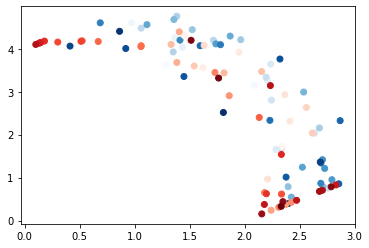

In [17]:
fig = plt.figure()
ax = fig.gca()

ax.scatter(alm_y[:,0], alm_y[:,1], c=color_1)
ax.scatter(my_opt.y[:50,0], my_opt.y[:50,1], c=color_2)

In [15]:
alm_y.shape

(50, 2)

In [16]:
my_opt.y.shape

(90, 2)